# Bend, Oregon Python automatic variable generation file for Circular Buffer

# Import the library

# Follow the below link to install Geopanda


#https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b

In [937]:
import time
start = time.time()
# First Run all these in command prompt cell to use geopanda
#conda create -n geo_env
#conda activate geo_env
#conda config --env --add channels conda-forge
#conda config --env --set channel_priority strict
#conda install python=3 geopandas

In [938]:
#conda activate geo_env


In [939]:
#python -m ipykernel install --user --name geo_env

In [940]:
import geopandas as gpd

In [941]:
import pandas as pd
from functools import reduce

In [942]:
import sys
'geopandas' in sys.modules

True

In [943]:
#!pip3 install matplotlib
import matplotlib.pyplot as plt

In [944]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import io
import pandas as pd
import networkx as nx
import osmnx as ox

# All inputs

# Inputr your Euclidean Buffer size or your GIS Customize buffer file Here

In [945]:
#buffer size in meter
size=1207.008 #in m, this input is also required for area conversation,1/10 mile==160.934m,1/4mile=402.336m, 0.5 mile=804.672, 3/4mile=1207.008m, 1 mile=1609.34,1.5 mile=2414.02, 2 mile=3218.69

In [946]:
# Import the emerging data
nf=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/all-aadbt-final-all.csv")
nf=nf[nf["region"]=="Bend"]
nf=nf[nf["year"]==2019]
nf.head()

site_id                  site_name sensor_type  year region  \
60  P001BEN              Colorado Ave.   permanent  2019   Bend   
61  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
62  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
63  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
64  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

    travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
60             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
61             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
62             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
63             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
64             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

     longitude comment  
60 -121.319863     NaN  
61 -121.308599     NaN  
62 -121.324270     NaN  
63 -121.314923     NaN  
64 -121.310496     NaN

In [947]:
c1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/sites_all_study_area.csv")
c1=c1[c1["region"]=="Bend"]
c1=c1[c1["in_2019"]==1]
c1=c1[['site_id','osm_id_sensor']]
c1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id  osm_id_sensor
430  P001BEN     48381206.0
431  P002BEN      5369877.0
432  P003BEN     49105950.0
433  P004BEN     46094523.0
434  P005BEN     46094520.0

In [948]:
# merge by site_id
nf1=pd.merge(nf,c1, right_on='site_id', left_on='site_id',how='inner')
nf1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor  
0 -121.319863     NaN     48381206.0  
1 -121.308599     NaN      5369877.0  
2 -121.324270     NaN     49105950.0  
3 -121.314923     NaN     46094523.0  
4 -121.310496     NaN     46094520.0

In [949]:
emerging_data=nf1.loc[:,['osm_id_sensor','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']]
emerging_data.columns=['osm_id','site_id','sensor_type','AADBT','stv_adb','stv_c_adb','stl_raw']
emerging_data.head(3)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0

# Input the Strava Annual Network shape file here

In [950]:
strava=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/Bend_strava_osm_buffer_3mi.shp")
print(strava.crs)
# Define the current EPSG
strava = strava.set_crs("EPSG:4326")
# Let's take a copy of our layer
strava_proj = strava.copy()

# Reproject the geometries by replacing the values with projected ones
strava_proj = strava_proj.to_crs(epsg=2839)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epsg:4326


# Input Bike share data here

In [951]:
bs1=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/Bend-bike-share-trip-od-all.csv")
bs1=bs1[bs1.start_year==2019]
bs1.head(5)

RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391  
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048  
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658  
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753  
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842

# Input OSM file here

In [952]:
# Input OSM land use shape file here
luse = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/landuse.shp")
# Define the current EPSG (normall for OSM this 3D EPSG code does not change)
lusec = luse.set_crs("EPSG:4326")


# Input OSM Natural shape file here
nature=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/natural.shp")
# Define the current EPSG
nature = nature.set_crs("EPSG:4326")

# Input OSM Point shape file here
pts=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/points.shp")
# Define the current EPSG
pts = pts.set_crs("EPSG:4326")

# Input the place of your study Area to calculate the intersection Density (city or county, Country)
#place="Oregon,USA"

# Input OSM road shape file here
road = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/roads.shp")
# Define the current EPSG
road = road.set_crs("EPSG:4326")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Import OSM Building shape file to get CBD (City Hall)

In [953]:
# Input OSM road shape file here
building = gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/buildings.shp")
print(building.crs)
# Define the current EPSG
building1 = building.set_crs("EPSG:4326")

epsg:4326


# Input NHGIS Block Group shape and CSV file here

In [954]:
# Input the block group shape file of your study area here
bg=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/OR_blck_grp_2017.shp")

# Input Race csv file here
race=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/race.csv")

# Input Age by Sex csv file here
gender=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/age by sex.csv")

# Input education csv file here
edu=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/education.csv")

# Import school enrollmemt 
scll=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/school Enrollment.csv")

# Input Median age csv file here
age=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_age.csv")

# Input Median House Hold income csv file here
income=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/median_hh_income.csv")

# Input House hold Type csv file here
hhdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/household_type.csv")

# Input Population csv file here
pdensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/population.csv")

# Input Employment csv file here
edensity=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/employment.csv")

# Means of Transportation data
bike_commute=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/Bike_commute_2019_blck_grp.csv")

# Insert LEHD Job Data, WAC file

In [955]:
# Input job csv file here
Number_job=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/or_wac_S000_JT00_2018.csv")
Number_job.head(4)
# Input the block group shape file of your study area here
bg_lehd=gpd.read_file("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Portland/Bike Fusion/tabblock2010_41_pophu.shp")


# Weather data needs to input three things
1. Chrome driver link (no need for kaggle as it is already set)
2. Dates you want to extract the data (format: yyyy-m, for example, 2019-4)
3. page of weather underground from where you want to extract the data

Please change the dates and page link only for other sttudy area at weather section which you will find before the Random forest variable selections.

WGS84 Latitude/Longitude: "EPSG:4326"

UTM Zones (North): "EPSG:32633"

UTM Zones (South): "EPSG:32733

# Input Study Area Boundary Shape file here

In [956]:
BA_all=gpd.read_file('http://web.pdx.edu/~jbroach/bike-data-fusion/study_area_boundaries.geojson')


In [957]:
BA_all

fid     region              comment  epsg_local  \
0    1    Boulder                 None        2772   
1    2     Eugene                 None        2839   
2    3       Bend                 None        2839   
3    4  Charlotte                 None        3358   
4    5     Dallas                 None        2845   
5    6   Portland  metro planning area        2838   

                                            geometry  
0  MULTIPOLYGON (((-105.64858 40.06198, -105.6480...  
1  MULTIPOLYGON (((-123.73473 43.94406, -123.7392...  
2  MULTIPOLYGON (((-121.40550 44.39315, -121.4025...  
3  MULTIPOLYGON (((-80.74046 35.37771, -80.73779 ...  
4  MULTIPOLYGON (((-96.52941 32.54528, -96.52964 ...  
5  MULTIPOLYGON (((-123.13045 45.47864, -123.1307...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

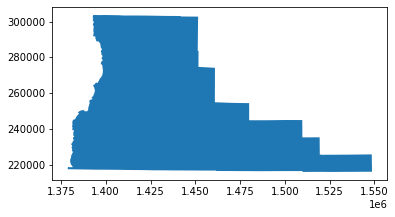

In [958]:
region = "Bend"
# select regional boundary and transform to local coords for buffering
local_poly = BA_all[BA_all['region'] == region]
local_srid = int(local_poly['epsg_local'])
local_poly = local_poly.to_crs(local_srid)
local_poly.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

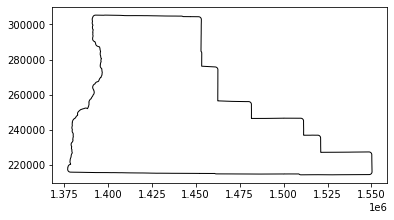

In [959]:
one_mile = 1609.34 # meters
pba = local_poly.buffer(one_mile)
pba.plot(color="none")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

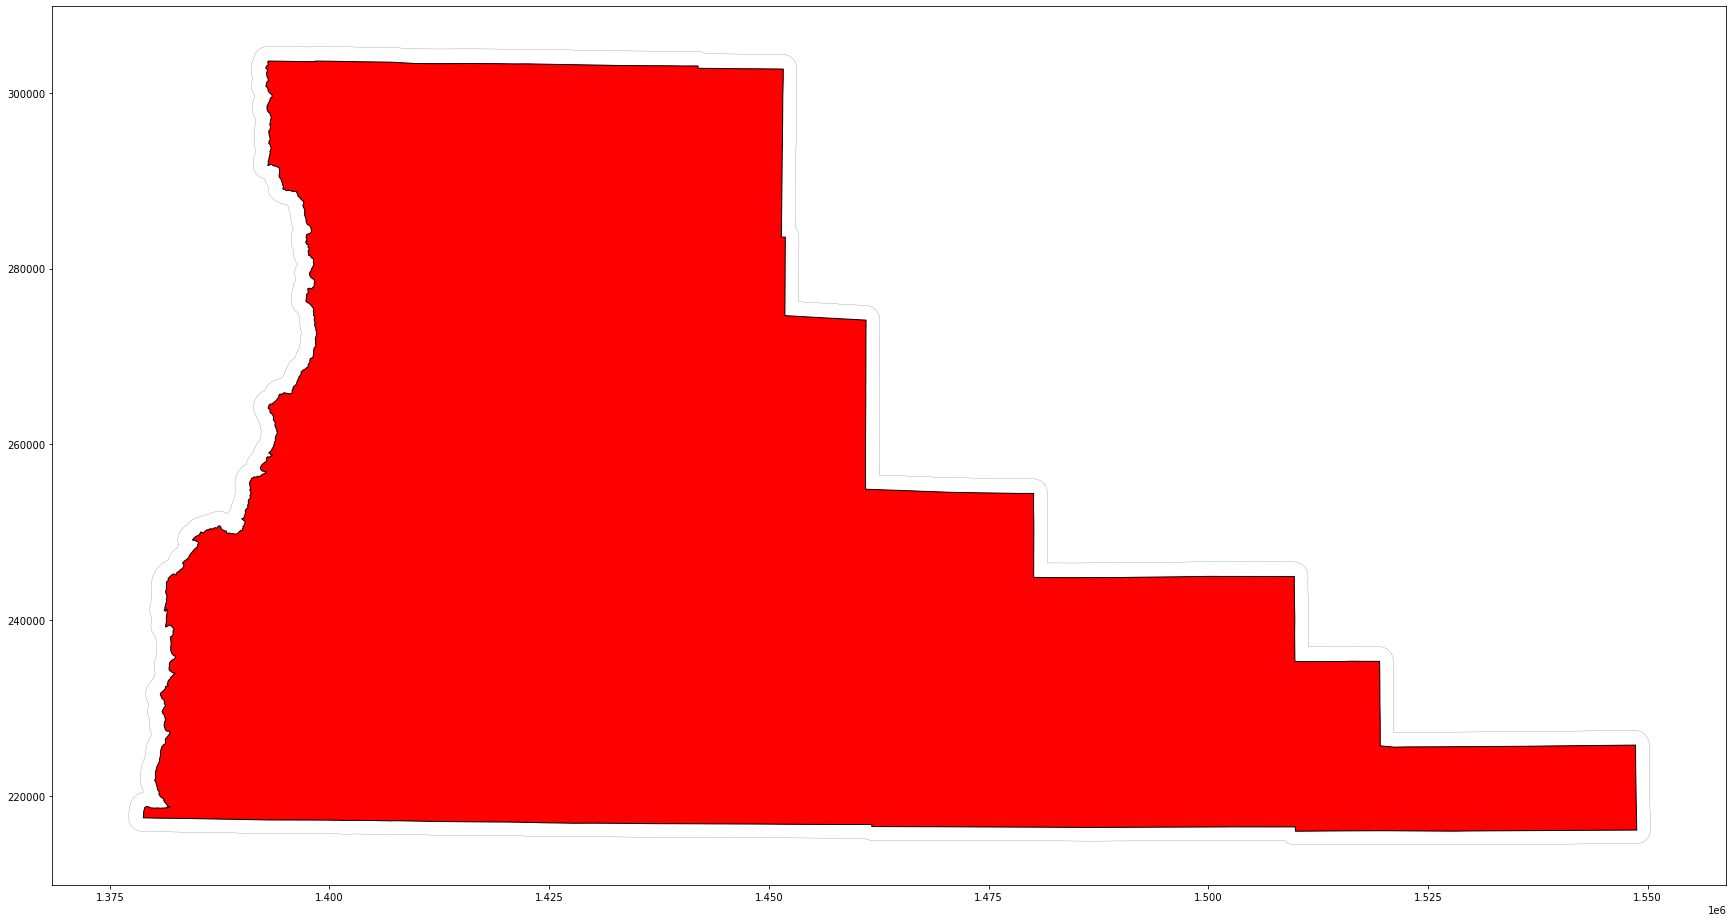

In [960]:
fig, ax = plt.subplots(figsize = (30,25)) 
local_poly.plot(ax=ax,color="red",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 0.15,ax=ax) #Use your second dataframe

# Read the Eco and short term location file as gpd to get geometry

In [961]:
df = gpd.GeoDataFrame(
    nf1, geometry=gpd.points_from_xy(nf1.longitude, nf1.latitude))
df.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                     geometry  
0 -121.319863     NaN     48381206.0  POINT (-121.31986 44.05029)  
1 -121.308599     NaN      5369877.0  POINT (-121.30860 44.05598)  
2 -121.324270     NaN     49105950.0  POINT (-121.32427 44.05658)  
3 -121.314923     NaN     46094523.0  POINT (-121.31492 44.06146)  
4 -121.310496     NaN     46094520.0  POINT (-121.31050 44.06415)

In [962]:
# set the co-ordinate system first
df = df.set_crs("EPSG:4211")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [963]:
print(df.crs)

EPSG:4211


In [964]:
# Let's take a copy of our layer
gdf0_proj = df.copy()

# Reproject the geometries by replacing the values with projected ones
eco_proj = gdf0_proj.to_crs(epsg=2839)
eco_proj.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)  
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)  
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)  
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)  
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)

In [965]:
# We can now plot our ``GeoDataFrame``.
#eco_proj.plot(eco_proj, color='red',figsize=(10,10))
#plt.show()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [966]:
ecoshort0=eco_proj
#ecoshort0=pd.concat([eco_proj,short_proj],axis=0)
ecoshort0.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)  
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)  
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)  
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)  
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)

In [967]:
#ecoshort0.reset_index(inplace=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [968]:
#ecoshort0[ecoshort0.index.duplicated()]

# Filter the location by Extended Study area Boundary

In [969]:
# Clip the data using GeoPandas clip
ecoshort = gpd.clip(ecoshort0, pba)
ecoshort.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)  
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)  
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)  
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)  
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)

In [970]:
count_station=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [971]:
ecoshort=ecoshort.drop_duplicates(subset='osm_id_sensor')
ecoshort.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)  
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)  
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)  
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)  
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

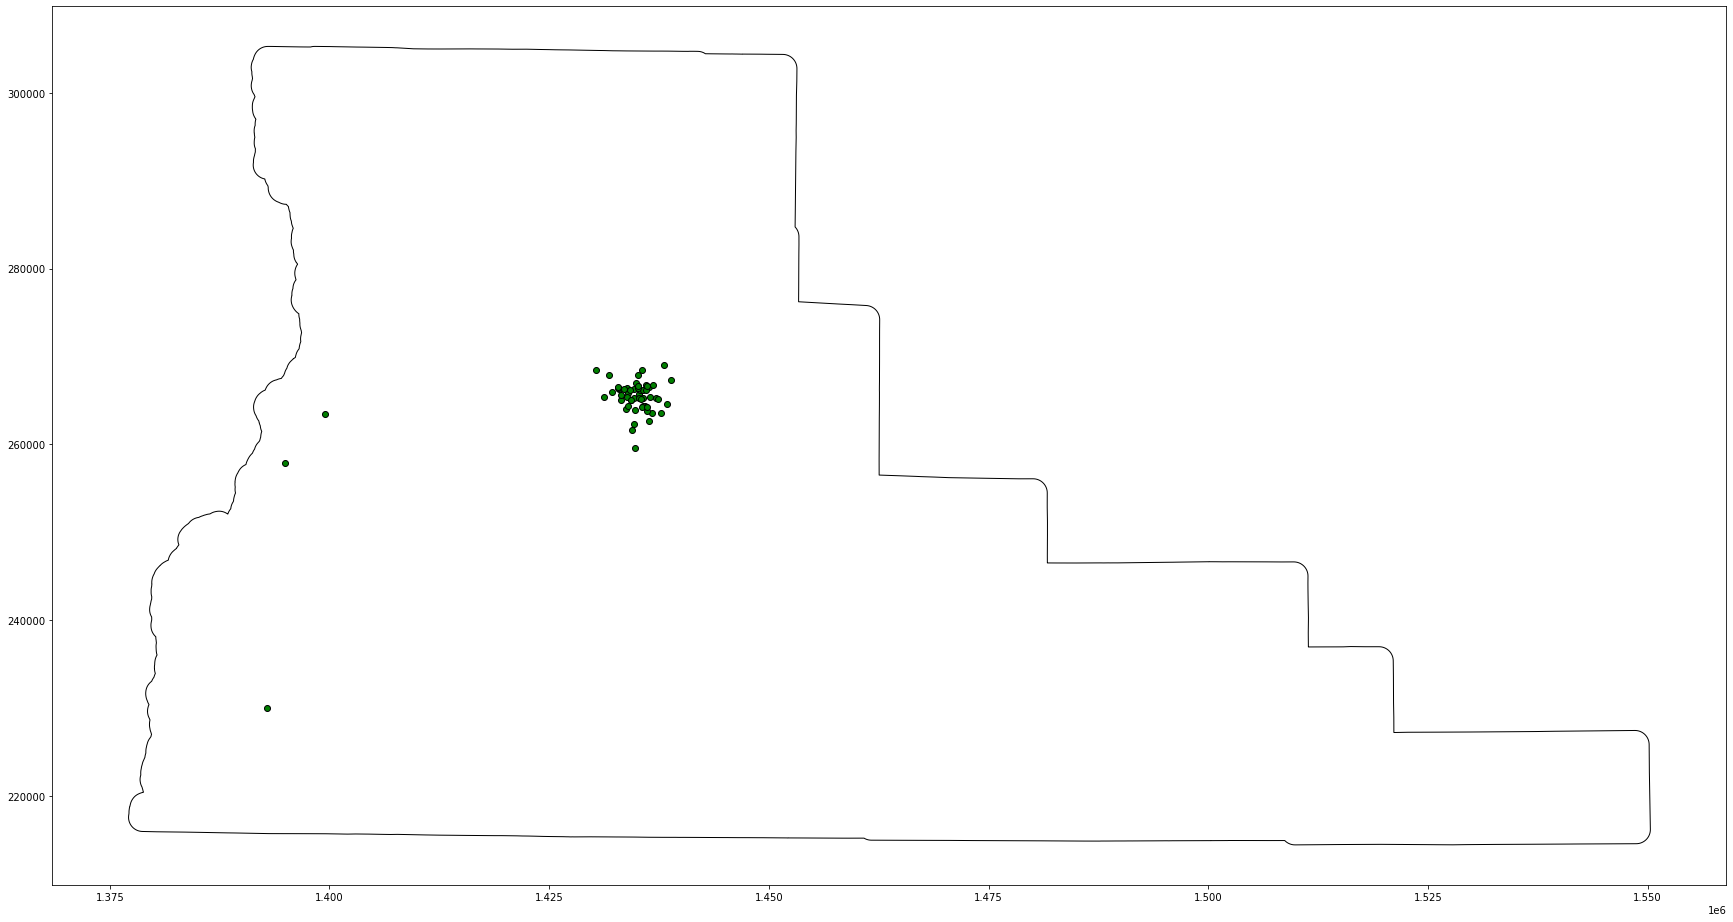

In [972]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
pba.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

# geopanda buffer function: https://geopandas.org/docs/user_guide/geometric_manipulations.html

In [973]:
# Buffer file
#gdf1=nf3


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [974]:
gdf1 = ecoshort.copy()
gdf1['geometry'] = gdf1['geometry'].buffer(size)
gdf1.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor  \
0 -121.319863     NaN     48381206.0   
1 -121.308599     NaN      5369877.0   
2 -121.324270     NaN     49105950.0   
3 -121.314923     NaN     46094523.0   
4 -121.310496     NaN     46094520.0   

                                            geometry  
0  POLYGON ((1435504.665 265113.372, 1435498.853 ...  
1  POLYGON ((1436413.459 265737.006, 1436407.647 ...  
2  POLYGON ((1435158.422 265816.071, 1435152.610 ...  
3  POLYGON ((1435912.638 266350.843, 1435906.826 ...  
4  POLYGON ((1436270.176 266646.066, 1436264.364 ...

In [975]:
#conda install -c conda-forge contextily #install in your geo_env using command prompt 

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#https://geopandas.org/gallery/plotting_basemap_background.html

In [976]:
import contextily as ctx

In [977]:
print(gdf1.crs)

epsg:2839


In [978]:
# Insert City Specific EPSG here to convert 3D to 2D map,for exaple, state plane system EPSG =2838 for Portland
# set the co-ordinate system first
gdfm = gdf1.set_crs("EPSG:2839") # provided by PSU
gdfm = gdfm.to_crs(epsg=3857) # This EPSG just for ploting

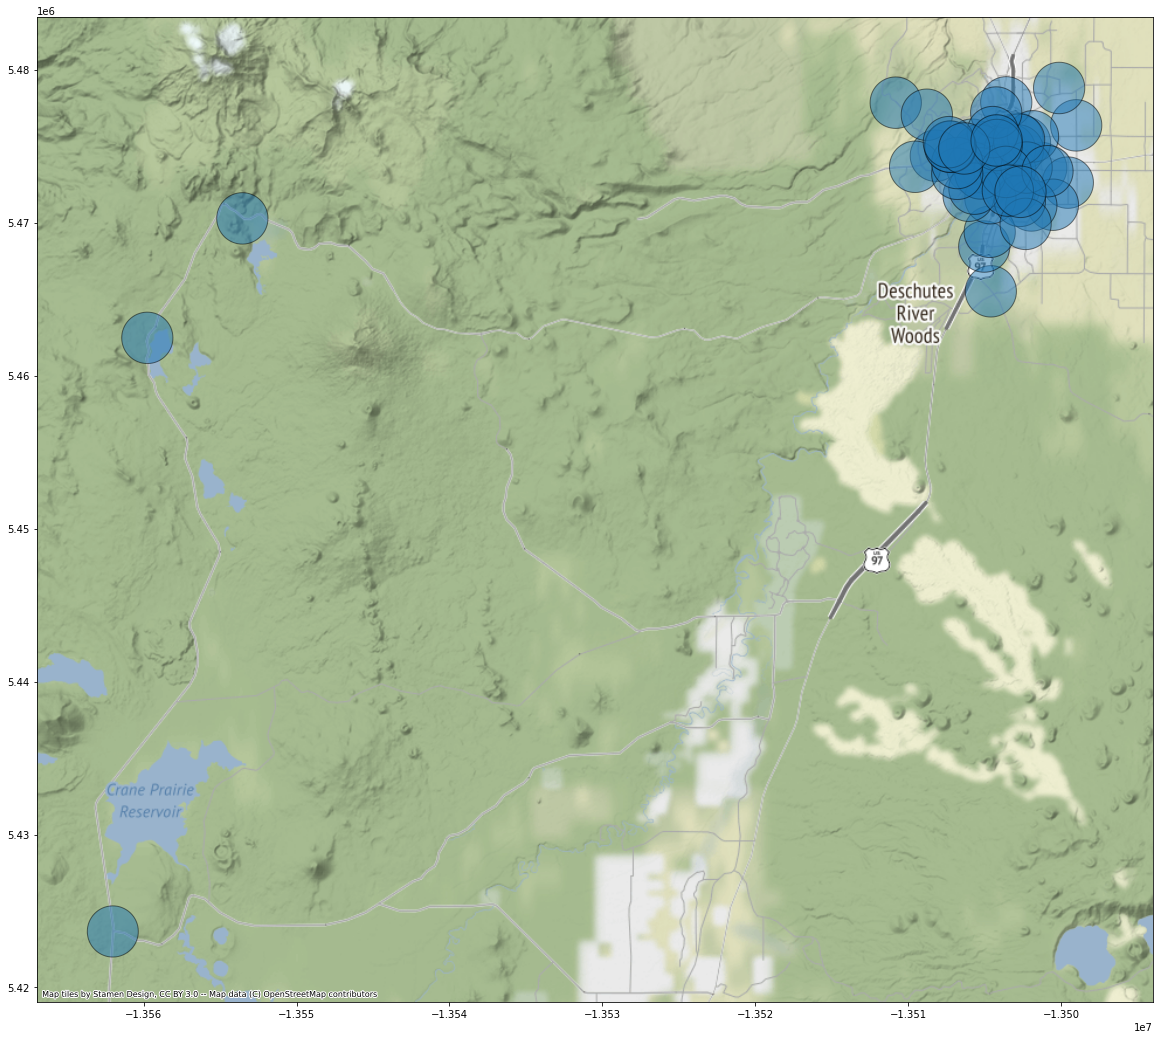

In [979]:
ax = gdfm.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# ploting code: http://darribas.org/gds15/content/labs/lab_03.html

# Calculate O, D and OD line

In [980]:
bs1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID       start_time  start_year  StartLatitude  \
0     22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3     23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4     23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6     24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9     24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   
...                        ...              ...         ...            ...   
9552  zYwXMR8vxouY8oLJJA4pY8Jv  10/12/2019 0:22        2019      44.042873   
9553  ZYYs6qwpwQazFq9wSBLZDqA9  10/10/2019 3:49        2019      44.060253   
9554  Zyz96YDv4cK7wZ8ifEGTvaEM    1/4/2019 4:04        2019      40.806627   
9555  zZ3veWeATE2KNqihXkGaKrZf  9/26/2019 22:06        2019      44.044313   
9559  ZZdoNWPrmTegP5GpMNaKPuiA   8/3/2019 23:29        2019      44.057572   

      StartLongitude         end_time  end_year  EndLatitude  EndLongitude  
0        -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391  
3        -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048  
4         -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658  
6        -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753  
9        -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842  
...              ...              ...       ...          ...           ...  
9552     -121.333600  10/12/2019 1:14      2019    44.042902   -121.332922  
9553     -121.313846  10/10/2019 3:58      2019    44.056564   -121.327529  
9554      -73.960200    1/4/2019 4:38      2019    40.806588    -73.960009  
9555     -121.323699  9/26/2019 22:22      2019    44.043014   -121.333681  
9559     -121.313893    8/4/2019 1:04      2019    44.043821   -121.315547  

[3574 rows x 9 columns]

In [981]:
bs1['StartLatitude'] = bs1['StartLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['StartLongitude'] = bs1['StartLongitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLatitude'] = bs1['EndLatitude'].apply(pd.to_numeric, errors='coerce')
bs1['EndLongitude'] = bs1['EndLongitude'].apply(pd.to_numeric, errors='coerce')
bs1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID       start_time  start_year  StartLatitude  \
0     22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3     23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4     23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6     24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9     24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   
...                        ...              ...         ...            ...   
9552  zYwXMR8vxouY8oLJJA4pY8Jv  10/12/2019 0:22        2019      44.042873   
9553  ZYYs6qwpwQazFq9wSBLZDqA9  10/10/2019 3:49        2019      44.060253   
9554  Zyz96YDv4cK7wZ8ifEGTvaEM    1/4/2019 4:04        2019      40.806627   
9555  zZ3veWeATE2KNqihXkGaKrZf  9/26/2019 22:06        2019      44.044313   
9559  ZZdoNWPrmTegP5GpMNaKPuiA   8/3/2019 23:29        2019      44.057572   

      StartLongitude         end_time  end_year  EndLatitude  EndLongitude  
0        -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391  
3        -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048  
4         -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658  
6        -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753  
9        -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842  
...              ...              ...       ...          ...           ...  
9552     -121.333600  10/12/2019 1:14      2019    44.042902   -121.332922  
9553     -121.313846  10/10/2019 3:58      2019    44.056564   -121.327529  
9554      -73.960200    1/4/2019 4:38      2019    40.806588    -73.960009  
9555     -121.323699  9/26/2019 22:22      2019    44.043014   -121.333681  
9559     -121.313893    8/4/2019 1:04      2019    44.043821   -121.315547  

[3574 rows x 9 columns]

In [982]:
bs3=bs1[bs1['StartLatitude'].notna()]
bs3.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3574, 9)

# BS Origin

In [983]:
# Origin
bso = gpd.GeoDataFrame(bs3, geometry=gpd.points_from_xy(bs3.StartLongitude, bs3.StartLatitude))
bso=bso.loc[:,['RouteID','StartLatitude','StartLongitude','geometry']]
bso.head(5)

RouteID  StartLatitude  StartLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4      44.058903     -121.316330   
3  23cFsQS8WTZxFd3Qnt94TAeE      44.050658     -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28      40.346980      -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6      44.043755     -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt      44.043712     -121.315762   

                      geometry  
0  POINT (-121.31633 44.05890)  
3  POINT (-121.30805 44.05066)  
4   POINT (-74.65566 40.34698)  
6  POINT (-121.31575 44.04375)  
9  POINT (-121.31576 44.04371)

In [984]:
# set the co-ordinate system first
bso1 = bso.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bso1_proj = bso1.to_crs(epsg=2839)
bso1_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  StartLatitude  StartLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4      44.058903     -121.316330   
3  23cFsQS8WTZxFd3Qnt94TAeE      44.050658     -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28      40.346980      -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6      44.043755     -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt      44.043712     -121.315762   

                         geometry  
0  POINT (1434590.111 266067.384)  
3  POINT (1435244.869 265144.926)  
4  POINT (5207327.931 894189.179)  
6  POINT (1434619.932 264383.859)  
9  POINT (1434619.180 264379.095)

In [985]:
# Clip the data using GeoPandas clip
bso1_clip = gpd.clip(bso1_proj, gdf1)
bso1_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  StartLatitude  StartLongitude  \
0   22C6HdCwWG3ngogK9YTNm3J4      44.058903     -121.316330   
3   23cFsQS8WTZxFd3Qnt94TAeE      44.050658     -121.308048   
6   24dpQgnrETLDH7CXzAsukAT6      44.043755     -121.315753   
9   24ZxPAvoAYseAKNbTQSHDLkt      44.043712     -121.315762   
10  25uvDxzxdMnc4Bove7RxyFwf      44.058618     -121.315907   

                          geometry  
0   POINT (1434590.111 266067.384)  
3   POINT (1435244.869 265144.926)  
6   POINT (1434619.932 264383.859)  
9   POINT (1434619.180 264379.095)  
10  POINT (1434623.655 266035.385)

In [986]:
 int_bso=gpd.overlay(gdf1, bso1_clip, how='intersection', make_valid=True, keep_geom_type=False)
 int_bso.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                   RouteID  StartLatitude  \
0 -121.319863     NaN     48381206.0  22C6HdCwWG3ngogK9YTNm3J4      44.058903   
1 -121.308599     NaN      5369877.0  22C6HdCwWG3ngogK9YTNm3J4      44.058903   
2 -121.324270     NaN     49105950.0  22C6HdCwWG3ngogK9YTNm3J4      44.058903   
3 -121.314923     NaN     46094523.0  22C6HdCwWG3ngogK9YTNm3J4      44.058903   
4 -121.310496     NaN     46094520.0  22C6HdCwWG3ngogK9YTNm3J4      44.058903   

   StartLongitude                        geometry  
0      -121.31633  POINT (1434590.111 266067.384)  
1      -121.31633  POINT (1434590.111 266067.384)  
2      -121.31633  POINT (1434590.111 266067.384)  
3      -121.31633  POINT (1434590.111 266067.384)  
4      -121.31633  POINT (1434590.111 266067.384)

In [987]:
#int_bso.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

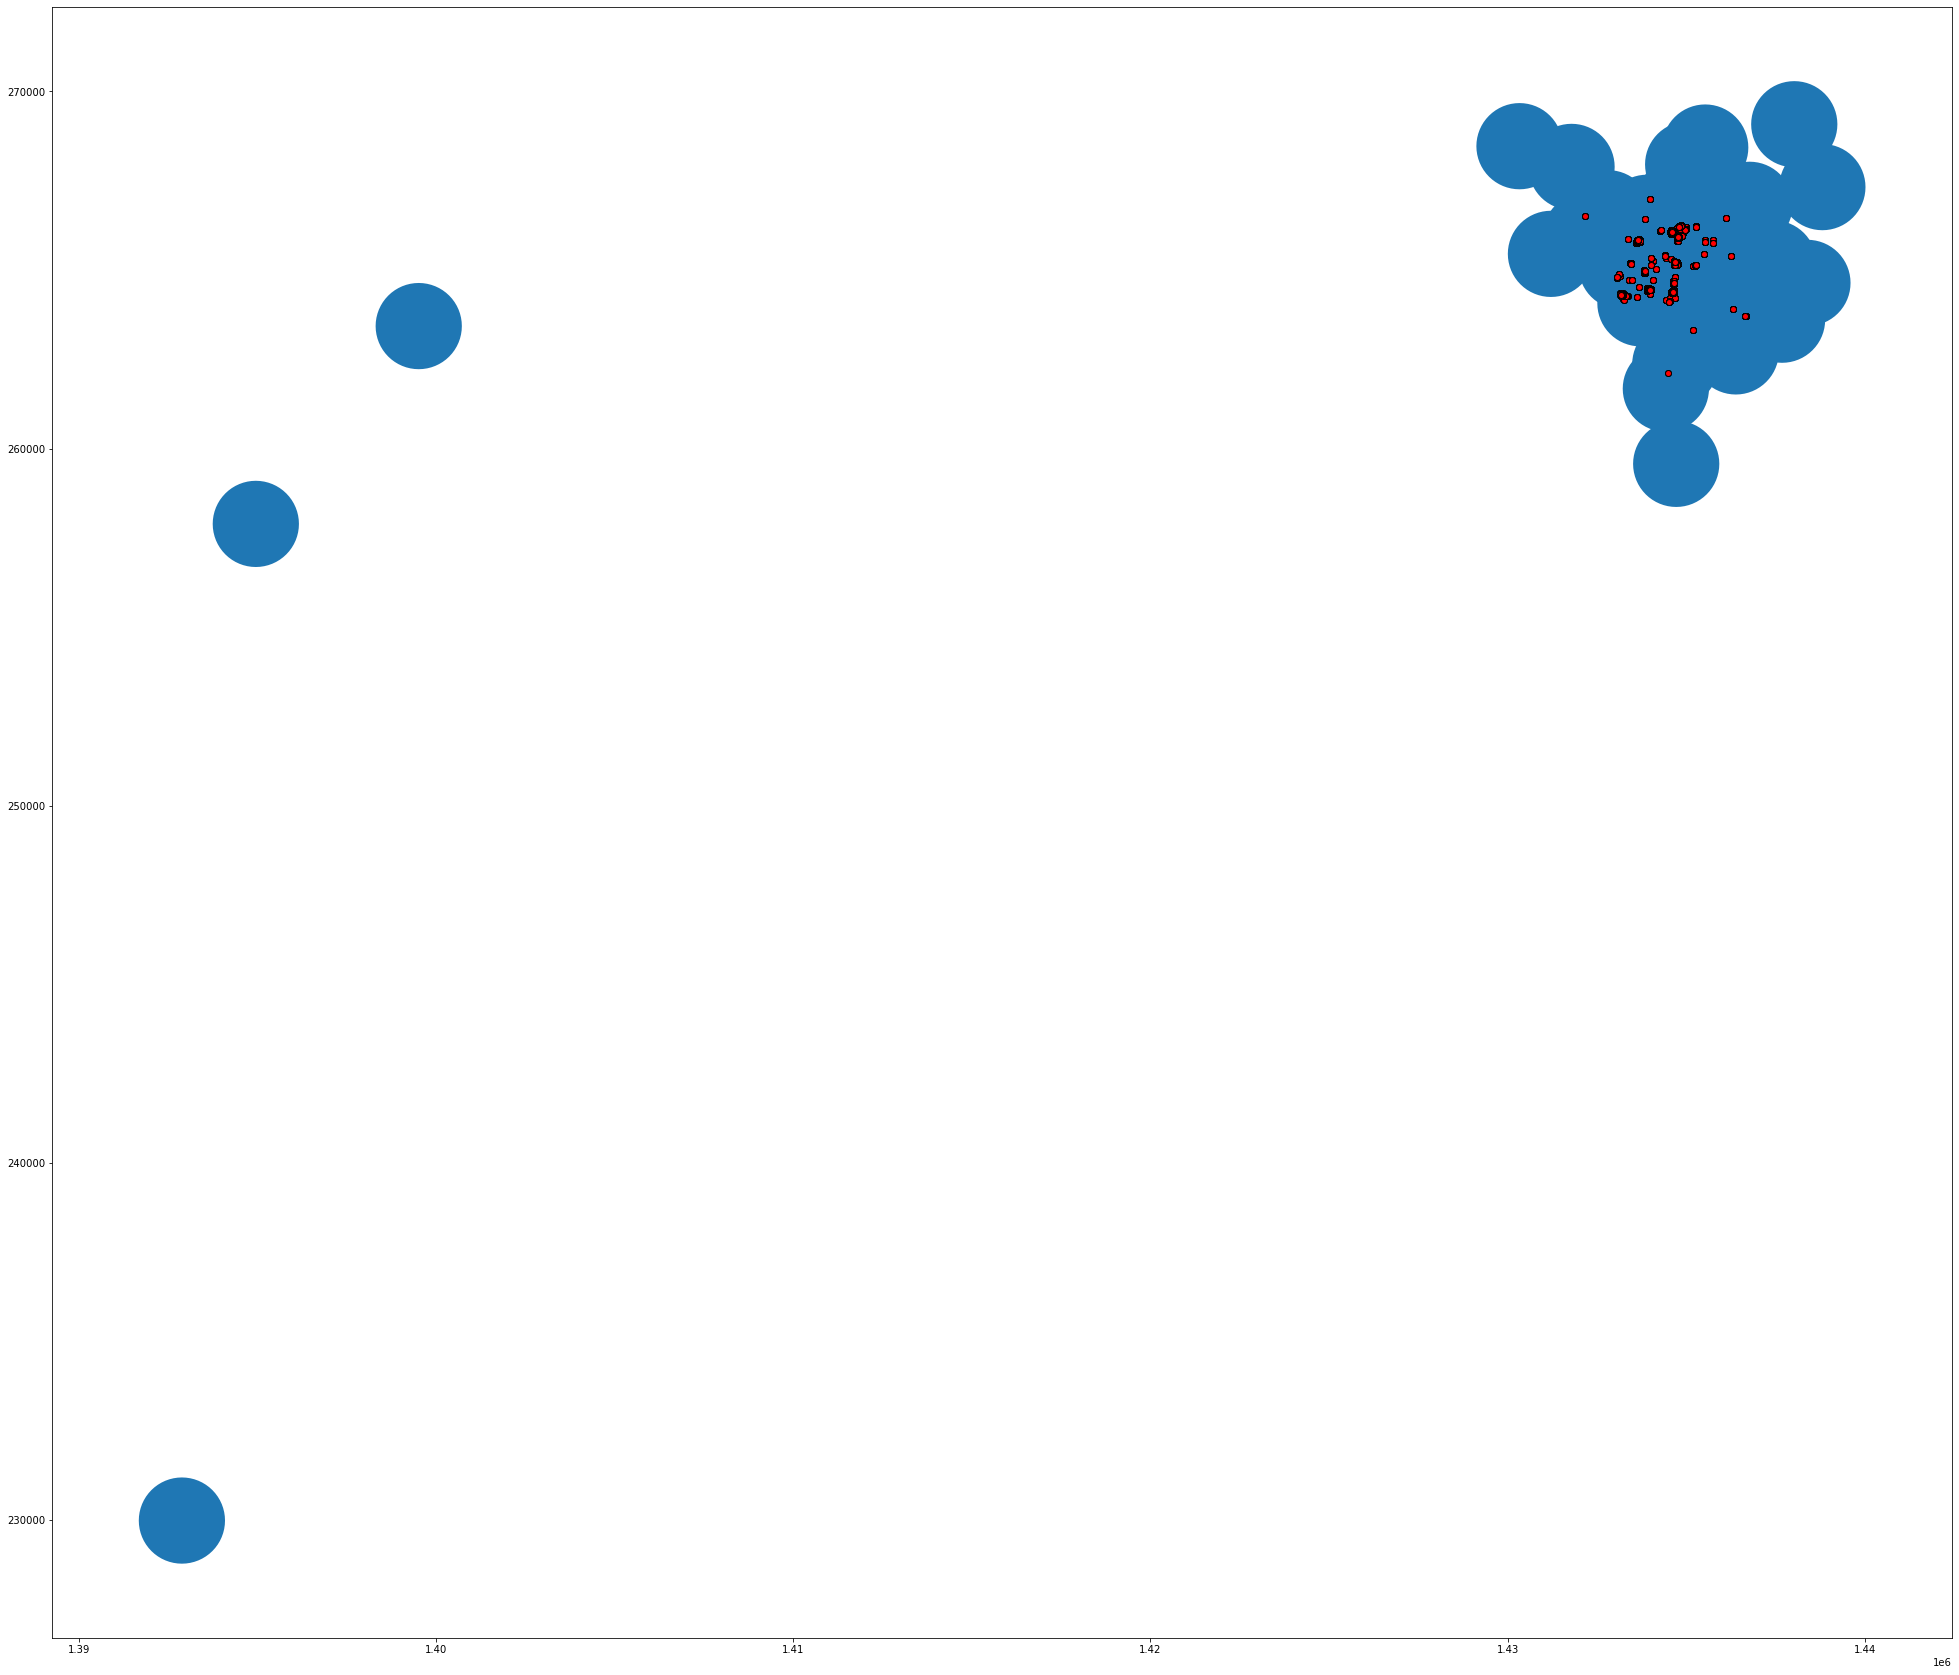

In [988]:
#int_bso.geometry.plot()
ax = gdf1.plot(figsize=(40, 30))
int_bso.geometry.plot(color="red",edgecolor='k',ax=ax)

In [989]:
output_origin=int_bso.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_origin.columns=["osm_id","Bike Share Origin"]
output_origin.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share Origin
0  5369733.0                715
1  5369877.0               1367
2  5371320.0                  5
3  5372140.0               1334
4  5372797.0                454

# BS destination

In [990]:
# Destination
bsd = gpd.GeoDataFrame(
    bs3, geometry=gpd.points_from_xy(bs3.EndLongitude, bs3.EndLatitude))
bsd=bsd.loc[:,['RouteID','EndLatitude','EndLongitude','geometry']]
bsd.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  EndLatitude  EndLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4    44.042999   -121.333391   
3  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28    40.346980    -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6    44.043755   -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt    44.043686   -121.315842   

                      geometry  
0  POINT (-121.33339 44.04300)  
3  POINT (-121.30805 44.05066)  
4   POINT (-74.65566 40.34698)  
6  POINT (-121.31575 44.04375)  
9  POINT (-121.31584 44.04369)

In [991]:
# set the co-ordinate system first
bsd1 = bsd.set_crs("EPSG:4211")
#Reproject the geometries by replacing the values with projected ones
bsd1_proj = bsd1.to_crs(epsg=2839)
bsd1_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  EndLatitude  EndLongitude  \
0  22C6HdCwWG3ngogK9YTNm3J4    44.042999   -121.333391   
3  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   -121.308048   
4  23F4zwMdrsW8coLHeZXaxr28    40.346980    -74.655658   
6  24dpQgnrETLDH7CXzAsukAT6    44.043755   -121.315753   
9  24ZxPAvoAYseAKNbTQSHDLkt    44.043686   -121.315842   

                         geometry  
0  POINT (1433205.559 264313.745)  
3  POINT (1435244.869 265144.926)  
4  POINT (5207327.931 894189.179)  
6  POINT (1434619.932 264383.859)  
9  POINT (1434612.740 264376.240)

In [992]:
# Clip the data using GeoPandas clip
bsd1_clip = gpd.clip(bsd1_proj, gdf1)
bsd1_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID  EndLatitude  EndLongitude  \
0   22C6HdCwWG3ngogK9YTNm3J4    44.042999   -121.333391   
3   23cFsQS8WTZxFd3Qnt94TAeE    44.050658   -121.308048   
6   24dpQgnrETLDH7CXzAsukAT6    44.043755   -121.315753   
9   24ZxPAvoAYseAKNbTQSHDLkt    44.043686   -121.315842   
10  25uvDxzxdMnc4Bove7RxyFwf    44.043788   -121.315751   

                          geometry  
0   POINT (1433205.559 264313.745)  
3   POINT (1435244.869 265144.926)  
6   POINT (1434619.932 264383.859)  
9   POINT (1434612.740 264376.240)  
10  POINT (1434620.144 264387.581)

In [993]:
int_bsd=gpd.overlay(gdf1, bsd1_clip, how='intersection', make_valid=True, keep_geom_type=False)
int_bsd.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                           site_name sensor_type  year region  \
0  P001BEN                       Colorado Ave.   permanent  2019   Bend   
1  P002BEN            Franklin Ave. Both Sides   permanent  2019   Bend   
2  S005BEN             Greenwood Undercrossing  short-term  2019   Bend   
3  S012BEN  WilsonAveEastof3rdBETWEEN4THAND5TH  short-term  2019   Bend   
4  S016BEN    Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524  6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625  6.958904   3.068493   2617.0  44.055983   
2             2.0   26.398787  3.821918   1.780822   2588.0  44.059955   
3             2.0   51.602827  2.780822   1.547945   2055.0  44.044249   
4             3.0   52.937398  1.726027   0.547945    920.0  44.052361   

    longitude comment  osm_id_sensor                   RouteID  EndLatitude  \
0 -121.319863     NaN     48381206.0  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   
1 -121.308599     NaN      5369877.0  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   
2 -121.307431     NaN      5372909.0  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   
3 -121.300039     NaN     48332546.0  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   
4 -121.315692     NaN     48381198.0  23cFsQS8WTZxFd3Qnt94TAeE    44.050658   

   EndLongitude                        geometry  
0   -121.308048  POINT (1435244.869 265144.926)  
1   -121.308048  POINT (1435244.869 265144.926)  
2   -121.308048  POINT (1435244.869 265144.926)  
3   -121.308048  POINT (1435244.869 265144.926)  
4   -121.308048  POINT (1435244.869 265144.926)

In [994]:
#int_bsd.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

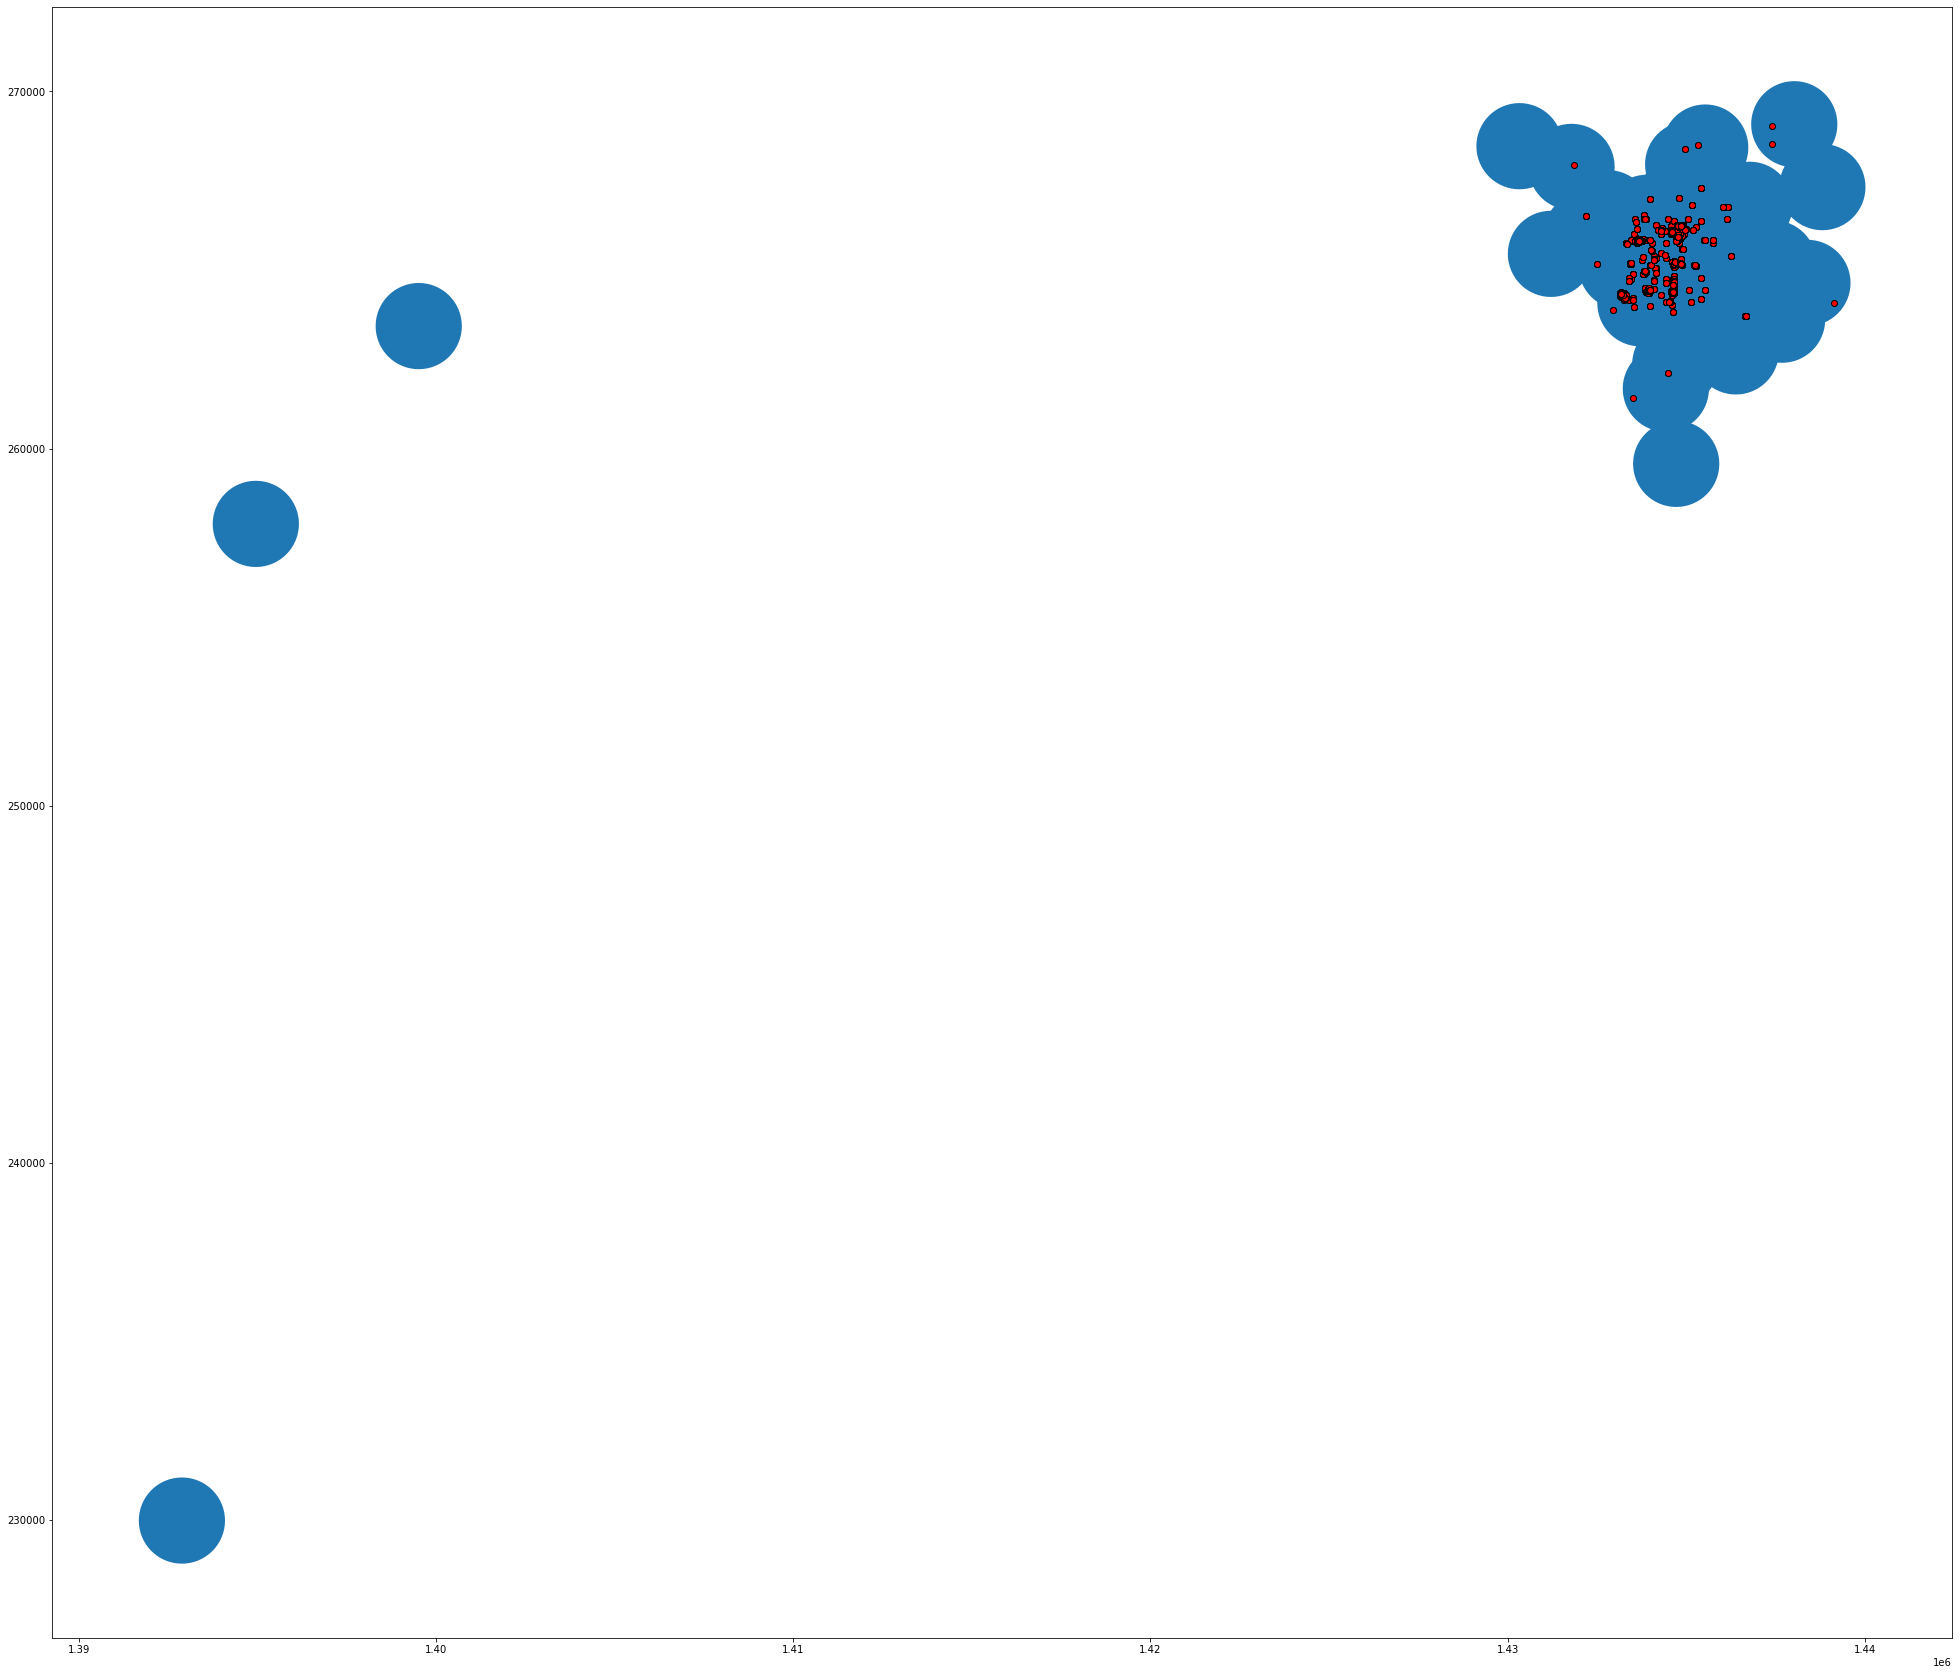

In [995]:
#int_bsd.geometry.plot()
#plotting    
ax = gdf1.plot(figsize=(40, 30))
int_bsd.geometry.plot(color="red",edgecolor='k',ax=ax)

In [996]:
output_destination=int_bsd.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_destination.columns=["osm_id","Bike Share Destination"]
output_destination.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share Destination
0  5369529.0                       1
1  5369733.0                     699
2  5369877.0                    1368
3  5371320.0                       5
4  5372140.0                    1310

# Bike Share OD line Crossing

In [997]:
#https://gis.stackexchange.com/questions/303615/creating-linestring-and-length-of-linestring-from-multiple-latlon-points-for-eac
import shapely.geometry as geom
bs_all_od=bs3.copy()
bs_all_od['geometry'] = bs_all_od.apply(lambda x: geom.LineString([(x['StartLongitude'], x['StartLatitude']) , (x['EndLongitude'], x['EndLatitude'])]), axis = 1)
bs_all_od.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391   
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048   
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658   
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753   
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842   

                                            geometry  
0  LINESTRING (-121.31633 44.0589028, -121.333390...  
3  LINESTRING (-121.3080479 44.0506585, -121.3080...  
4  LINESTRING (-74.65565839999999 40.3469795, -74...  
6  LINESTRING (-121.3157532 44.04375491, -121.315...  
9  LINESTRING (-121.315762 44.04371197, -121.3158...

In [998]:
# exclude the points outside of Portland
#bs_all_od1=bs_all_od[(bs_all_od.StartLongitude<=-120)&(bs_all_od.StartLongitude>=-122)]
##bs_all_od1=bs_all_od1[(bs_all_od1.EndLongitude<=-120)&(bs_all_od1.EndLongitude>=-122)]
#bs_all_od1=bs_all_od1[(bs_all_od1.StartLatitude>=44)&(bs_all_od1.StartLatitude<=46)]
#bs_all_od1=bs_all_od1[(bs_all_od1.EndLatitude>=45)&(bs_all_od1.EndLatitude<=46)]
#bs_all_od1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [999]:
#print(bs_all_od.crs)

In [1000]:
#print(bs_all_od.info())

In [1001]:
bs_all_od2 = gpd.GeoDataFrame(bs_all_od, geometry='geometry', crs={'init': 'epsg:4211'})
bs_all_od2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391   
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048   
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658   
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753   
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842   

                                            geometry  
0  LINESTRING (-121.31633 44.05890, -121.33339 44...  
3  LINESTRING (-121.30805 44.05066, -121.30805 44...  
4  LINESTRING (-74.65566 40.34698, -74.65566 40.3...  
6  LINESTRING (-121.31575 44.04375, -121.31575 44...  
9  LINESTRING (-121.31576 44.04371, -121.31584 44...

In [1002]:
#print(bs_all_od2.crs)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1003]:
#print(bs_all_od2.info())

In [1004]:
# set the co-ordinate system first
#bs_all_od2 = bs_all_od1.set_crs("EPSG:4211")

# Reproject the geometries by replacing the values with projected ones
bs_all_od2_proj = bs_all_od2.to_crs(epsg=2839)
bs_all_od2_proj.head(5)

RouteID       start_time  start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3  23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
4  23F4zwMdrsW8coLHeZXaxr28  7/22/2019 19:42        2019      40.346980   
6  24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9  24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   

   StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0     -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391   
3     -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048   
4      -74.655658  7/22/2019 19:42      2019    40.346980    -74.655658   
6     -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753   
9     -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842   

                                            geometry  
0  LINESTRING (1434590.111 266067.384, 1433205.55...  
3  LINESTRING (1435244.869 265144.926, 1435244.86...  
4  LINESTRING (5207327.931 894189.179, 5207327.93...  
6  LINESTRING (1434619.932 264383.859, 1434619.93...  
9  LINESTRING (1434619.180 264379.095, 1434612.74...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

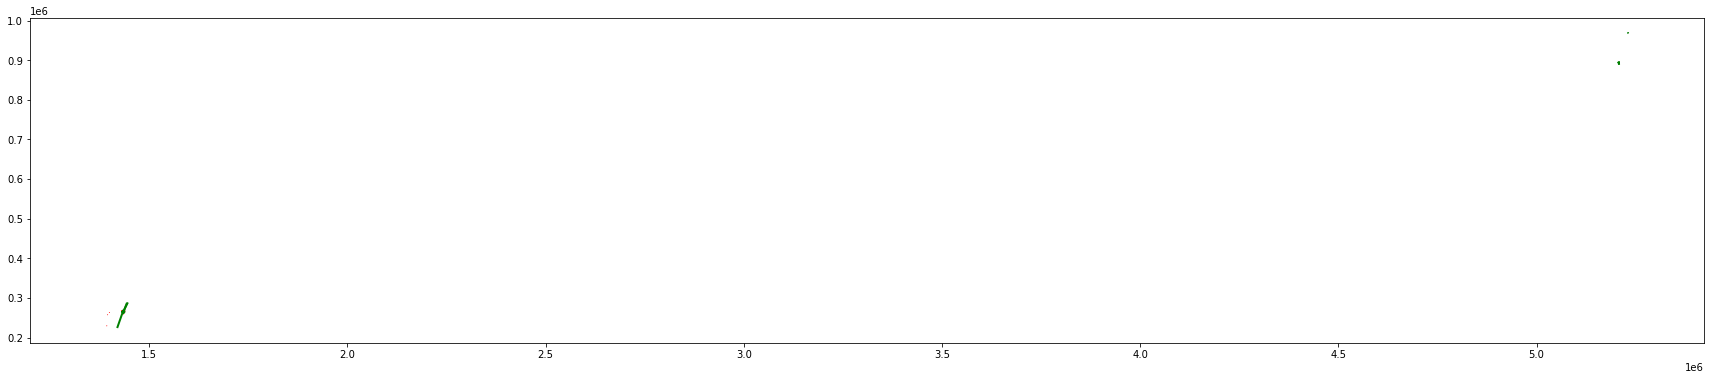

In [1005]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
bs_all_od2_proj.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1006]:
#spj = gpd.sjoin( bs_all_od2_proj,gdf1, how="inner", op='intersects')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1007]:
# Clip the data using GeoPandas clip
odc1_clip = gpd.clip(bs_all_od2_proj,gdf1)
odc1_clip.head(5)

RouteID       start_time  start_year  StartLatitude  \
0   22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03        2019      44.058903   
3   23cFsQS8WTZxFd3Qnt94TAeE  8/15/2019 23:12        2019      44.050658   
6   24dpQgnrETLDH7CXzAsukAT6   7/4/2019 21:21        2019      44.043755   
9   24ZxPAvoAYseAKNbTQSHDLkt   6/9/2019 17:56        2019      44.043712   
10  25uvDxzxdMnc4Bove7RxyFwf    1/2/2019 0:24        2019      44.058618   

    StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0      -121.316330  9/15/2019 21:21      2019    44.042999   -121.333391   
3      -121.308048  8/15/2019 23:12      2019    44.050658   -121.308048   
6      -121.315753   7/4/2019 21:21      2019    44.043755   -121.315753   
9      -121.315762   6/9/2019 18:26      2019    44.043686   -121.315842   
10     -121.315907    1/2/2019 1:50      2019    44.043788   -121.315751   

                                             geometry  
0   LINESTRING (1434590.111 266067.384, 1433205.55...  
3                                    LINESTRING EMPTY  
6                                    LINESTRING EMPTY  
9   LINESTRING (1434619.180 264379.095, 1434612.74...  
10  LINESTRING (1434623.655 266035.385, 1434620.14...

In [1008]:
int_odl=gpd.overlay(gdf1, odc1_clip, how='intersection', make_valid=True, keep_geom_type=False)
int_odl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...   
1             2.0  220.426625   6.958904   3.068493   2617.0  ...   
2             3.0  127.953968  13.726027   4.369863   3128.0  ...   
3             1.0  109.378321   7.027397   2.178082   1998.0  ...   
4             2.0   61.295238   5.260274   1.698630   1387.0  ...   

                    RouteID       start_time start_year  StartLatitude  \
0  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03       2019      44.058903   
1  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03       2019      44.058903   
2  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03       2019      44.058903   
3  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03       2019      44.058903   
4  22C6HdCwWG3ngogK9YTNm3J4  9/15/2019 21:03       2019      44.058903   

  StartLongitude         end_time  end_year  EndLatitude  EndLongitude  \
0     -121.31633  9/15/2019 21:21      2019    44.042999   -121.333391   
1     -121.31633  9/15/2019 21:21      2019    44.042999   -121.333391   
2     -121.31633  9/15/2019 21:21      2019    44.042999   -121.333391   
3     -121.31633  9/15/2019 21:21      2019    44.042999   -121.333391   
4     -121.31633  9/15/2019 21:21      2019    44.042999   -121.333391   

                                            geometry  
0  LINESTRING (1434590.111 266067.384, 1433300.54...  
1  LINESTRING (1434590.111 266067.384, 1434051.79...  
2  LINESTRING (1434590.111 266067.384, 1433506.47...  
3  LINESTRING (1434590.111 266067.384, 1434026.53...  
4  LINESTRING (1434590.111 266067.384, 1434305.58...  

[5 rows x 24 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

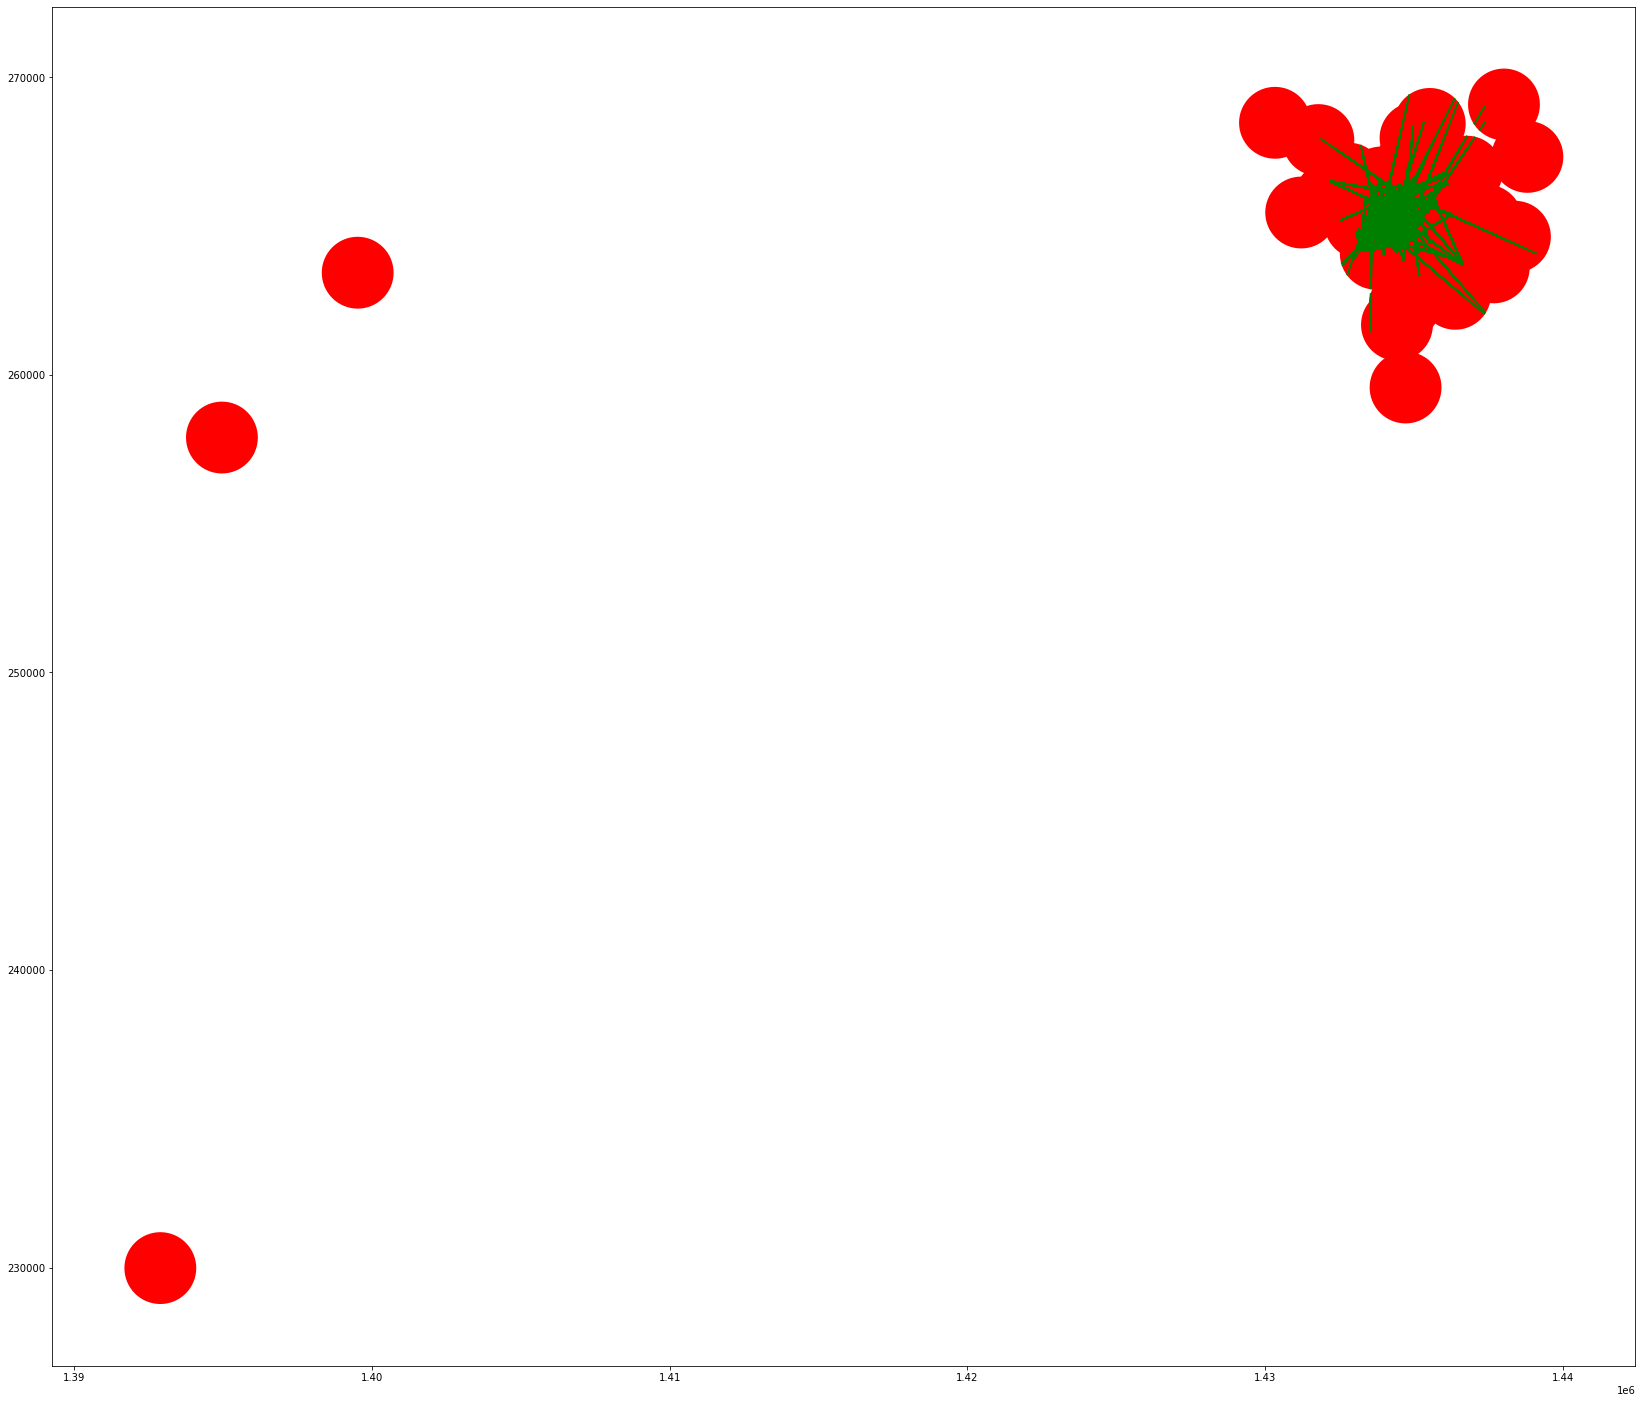

In [1009]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
int_odl.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1010]:
output_odl=int_odl.groupby(by=['osm_id_sensor'])['RouteID'].count().reset_index()
output_odl.columns=["osm_id","Bike Share Crossing"]
output_odl.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share Crossing
0  5369529.0                    1
1  5369733.0                  900
2  5369877.0                 1606
3  5371320.0                    8
4  5372140.0                 1555

# Calculate Bike share GPS route

In [1011]:
gps_bs=gpd.read_file('F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/Bend-bike-share-traces-all.shp(2)/Bend-bike-share-traces-all.shp')
gps_bs=gps_bs[gps_bs.year==2019]
gps_bs

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tripID    year           start_time  \
0     22C6HdCwWG3ngogK9YTNm3J4  2019.0  2019-09-15 21:03:07   
6     24ZxPAvoAYseAKNbTQSHDLkt  2019.0  2019-06-09 17:56:25   
7     25uvDxzxdMnc4Bove7RxyFwf  2019.0  2019-01-02 00:24:54   
10    27N2PNbQr5Gvm8inWeS8tCFs  2019.0  2019-08-16 02:49:05   
19    29RpvmMgeFstRky4RmePsZtK  2019.0  2019-05-09 20:54:08   
...                        ...     ...                  ...   
8862  zYwXMR8vxouY8oLJJA4pY8Jv  2019.0  2019-10-12 00:22:10   
8863  ZYYs6qwpwQazFq9wSBLZDqA9  2019.0  2019-10-10 03:49:06   
8864  Zyz96YDv4cK7wZ8ifEGTvaEM  2019.0  2019-01-04 04:04:43   
8865  zZ3veWeATE2KNqihXkGaKrZf  2019.0  2019-09-26 22:06:39   
8869  ZZdoNWPrmTegP5GpMNaKPuiA  2019.0  2019-08-03 23:29:07   

                                               geometry  
0     LINESTRING (-121.31633 44.05890, -121.31633 44...  
6     LINESTRING (-121.31576 44.04371, -121.31585 44...  
7     LINESTRING (-121.31591 44.05862, -121.31633 44...  
10    LINESTRING (-121.31635 44.05893, -121.31635 44...  
19    LINESTRING (-121.31400 44.05747, -121.31394 44...  
...                                                 ...  
8862  LINESTRING (-121.33360 44.04287, -121.33359 44...  
8863  LINESTRING (-121.31385 44.06025, -121.31385 44...  
8864  LINESTRING (-73.96020 40.80663, -73.96020 40.8...  
8865  LINESTRING (-121.32370 44.04431, -121.32370 44...  
8869  LINESTRING (-121.31389 44.05757, -121.31389 44...  

[3192 rows x 4 columns]

In [1012]:
bs_all_od_gps = gpd.GeoDataFrame(gps_bs, geometry='geometry', crs={'init': 'epsg:4211'})
# Reproject the geometries by replacing the values with projected ones
bs_all_od_gps_proj = bs_all_od_gps.to_crs(epsg=2839)
bs_all_od_gps_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


tripID    year           start_time  \
0   22C6HdCwWG3ngogK9YTNm3J4  2019.0  2019-09-15 21:03:07   
6   24ZxPAvoAYseAKNbTQSHDLkt  2019.0  2019-06-09 17:56:25   
7   25uvDxzxdMnc4Bove7RxyFwf  2019.0  2019-01-02 00:24:54   
10  27N2PNbQr5Gvm8inWeS8tCFs  2019.0  2019-08-16 02:49:05   
19  29RpvmMgeFstRky4RmePsZtK  2019.0  2019-05-09 20:54:08   

                                             geometry  
0   LINESTRING (1434591.218 266066.755, 1434591.21...  
6   LINESTRING (1434620.289 264378.467, 1434613.33...  
7   LINESTRING (1434624.764 266034.756, 1434590.96...  
10  LINESTRING (1434589.327 266069.851, 1434589.32...  
19  LINESTRING (1434776.585 265905.488, 1434781.39...

In [1013]:
# Clip the data using GeoPandas clip
odc1_clip_gps = gpd.clip(bs_all_od_gps_proj,gdf1)
odc1_clip_gps.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tripID    year           start_time  \
0   22C6HdCwWG3ngogK9YTNm3J4  2019.0  2019-09-15 21:03:07   
6   24ZxPAvoAYseAKNbTQSHDLkt  2019.0  2019-06-09 17:56:25   
7   25uvDxzxdMnc4Bove7RxyFwf  2019.0  2019-01-02 00:24:54   
10  27N2PNbQr5Gvm8inWeS8tCFs  2019.0  2019-08-16 02:49:05   
19  29RpvmMgeFstRky4RmePsZtK  2019.0  2019-05-09 20:54:08   

                                             geometry  
0   MULTILINESTRING ((1434591.218 266066.755, 1434...  
6   MULTILINESTRING ((1434620.289 264378.467, 1434...  
7   LINESTRING (1434624.764 266034.756, 1434590.96...  
10  LINESTRING (1434589.327 266069.851, 1434589.00...  
19  MULTILINESTRING ((1434776.585 265905.488, 1434...

In [1014]:
int_odl_gps=gpd.overlay(gdf1, odc1_clip_gps, how='intersection', make_valid=True, keep_geom_type=False)
int_odl_gps.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year_1 region  \
0  P001BEN              Colorado Ave.   permanent    2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent    2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent    2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent    2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent    2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                    tripID  year_2  \
0 -121.319863     NaN     48381206.0  22C6HdCwWG3ngogK9YTNm3J4  2019.0   
1 -121.308599     NaN      5369877.0  22C6HdCwWG3ngogK9YTNm3J4  2019.0   
2 -121.324270     NaN     49105950.0  22C6HdCwWG3ngogK9YTNm3J4  2019.0   
3 -121.314923     NaN     46094523.0  22C6HdCwWG3ngogK9YTNm3J4  2019.0   
4 -121.310496     NaN     46094520.0  22C6HdCwWG3ngogK9YTNm3J4  2019.0   

            start_time                                           geometry  
0  2019-09-15 21:03:07  MULTILINESTRING ((1434591.218 266066.755, 1434...  
1  2019-09-15 21:03:07  MULTILINESTRING ((1434591.218 266066.755, 1434...  
2  2019-09-15 21:03:07  MULTILINESTRING ((1434591.218 266066.755, 1434...  
3  2019-09-15 21:03:07  MULTILINESTRING ((1434591.218 266066.755, 1434...  
4  2019-09-15 21:03:07  MULTILINESTRING ((1434591.218 266066.755, 1434...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

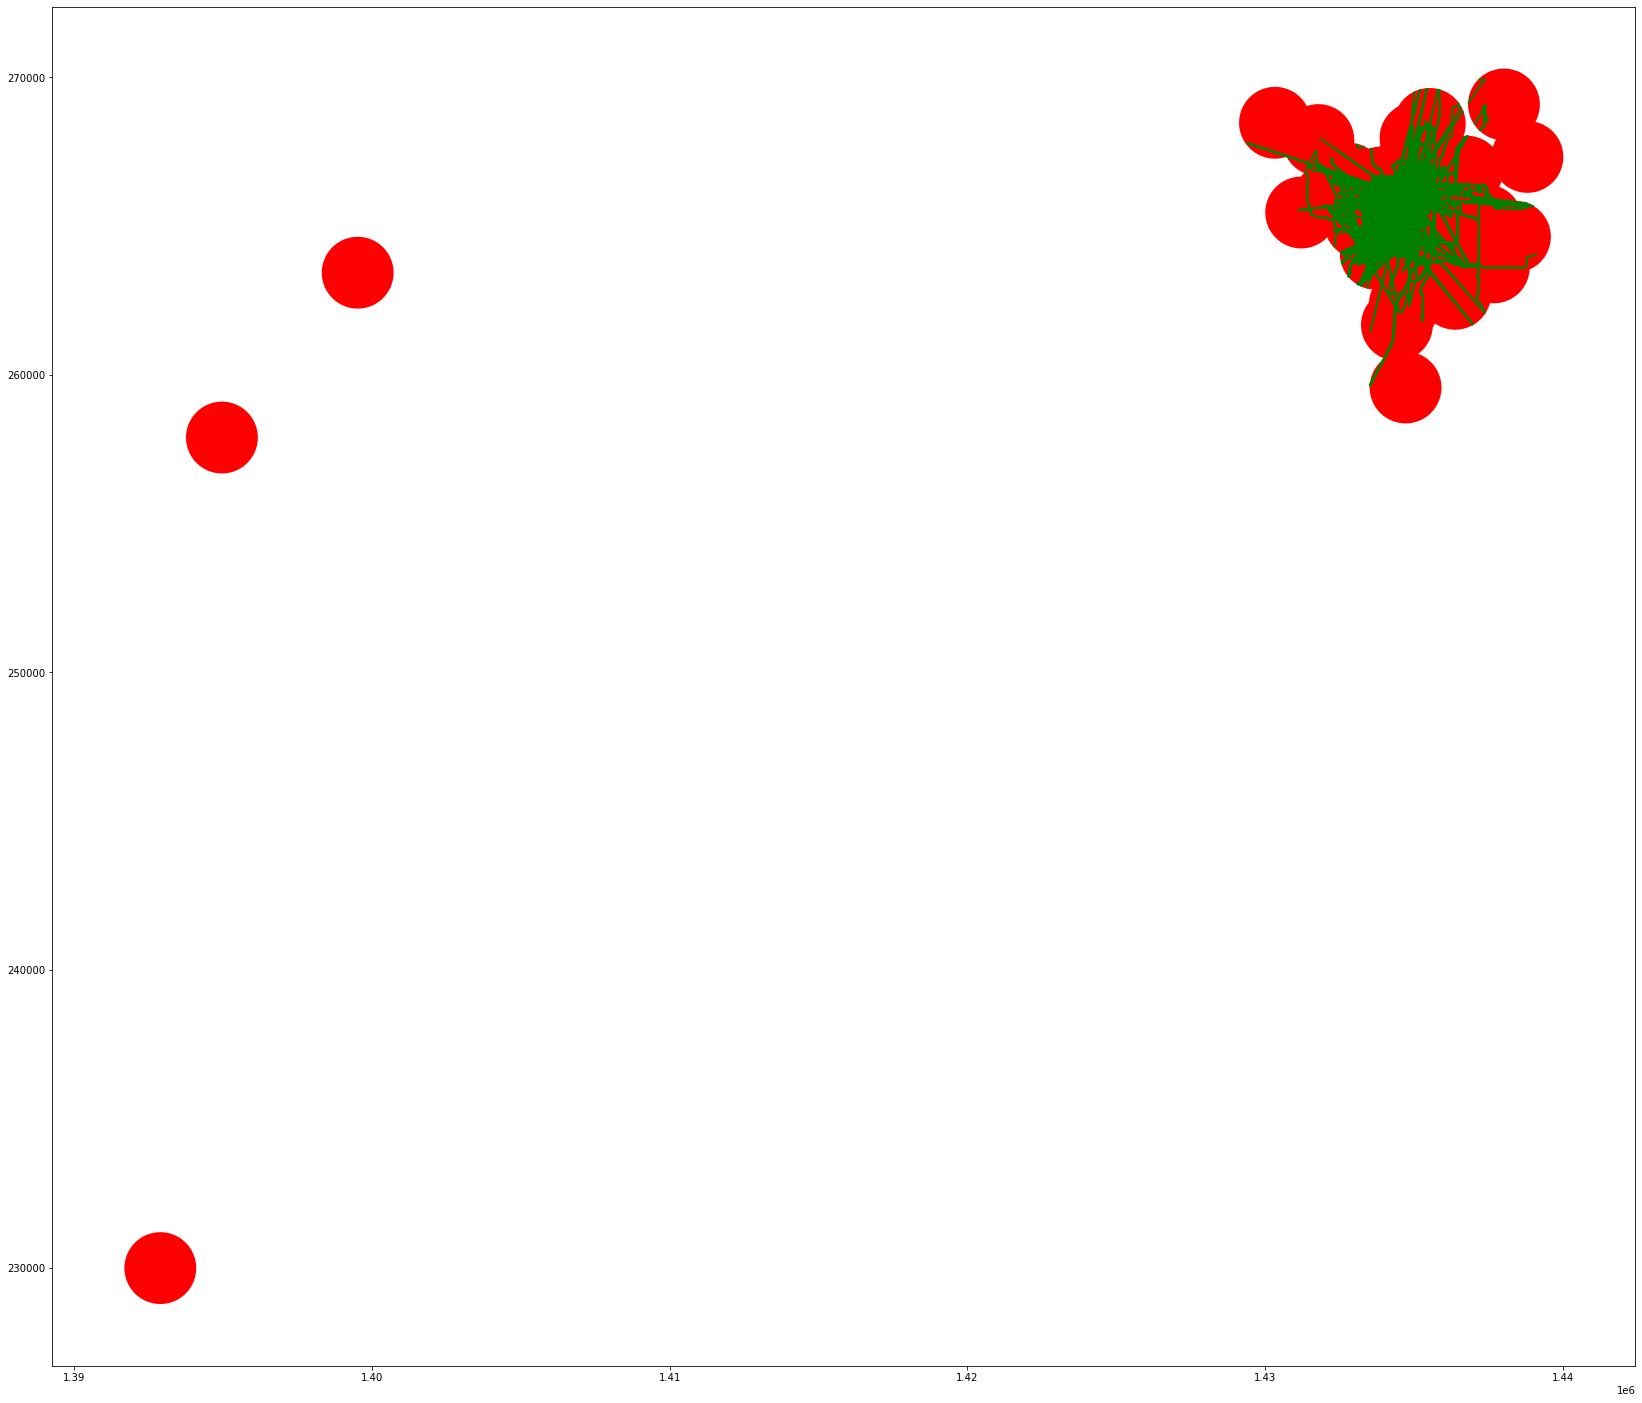

In [1015]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
int_odl_gps.geometry.plot(color="green",edgecolor='k',linewidth = 2,ax=ax)

In [1016]:
output_odl_gps=int_odl_gps.groupby(by=['osm_id_sensor'])['tripID'].count().reset_index()
output_odl_gps.columns=["osm_id","Bike Share route"]
output_odl_gps.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bike Share route
0  5369529.0                 5
1  5369733.0              1106
2  5369877.0              1891
3  5371320.0                12
4  5372140.0              1639

# Now import land use shape file

In [1017]:
#luse = gpd.read_file("../input/osm-data/landuse.shp")
luse.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                   name         type  \
0   5280431                   None       quarry   
1   5492216          Crescent Lake  residential   
2  30010727    Brown Road Property        grass   
3  30266634                   None       retail   
4  30267489  McNary Field Heliport     military   

                                            geometry  
0  POLYGON ((-121.95901 44.96990, -121.95834 44.9...  
1  POLYGON ((-121.92823 43.49807, -121.92638 43.4...  
2  POLYGON ((-122.96808 44.95760, -122.96807 44.9...  
3  POLYGON ((-122.97490 44.91162, -122.97453 44.9...  
4  POLYGON ((-123.00129 44.91634, -123.00139 44.9...

# Define and then Convert the co-ordinate system

In [1018]:
# set the co-ordinate system first
#lusec = luse.set_crs("EPSG:4326")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1019]:
# Let's take a copy of our layer
luse_proj = lusec.copy()

# Reproject the geometries by replacing the values with projected ones
luse_proj = luse_proj.to_crs(epsg=2839)
luse_proj.head(5)

osm_id                   name         type  \
0   5280431                   None       quarry   
1   5492216          Crescent Lake  residential   
2  30010727    Brown Road Property        grass   
3  30266634                   None       retail   
4  30267489  McNary Field Heliport     military   

                                            geometry  
0  POLYGON ((1384863.563 368001.131, 1384916.198 ...  
1  POLYGON ((1384502.788 204423.129, 1384649.913 ...  
2  POLYGON ((1305210.479 368501.172, 1305213.793 ...  
3  POLYGON ((1304521.449 363407.656, 1304553.132 ...  
4  POLYGON ((1302453.177 363994.477, 1302444.708 ...

# Visualize

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

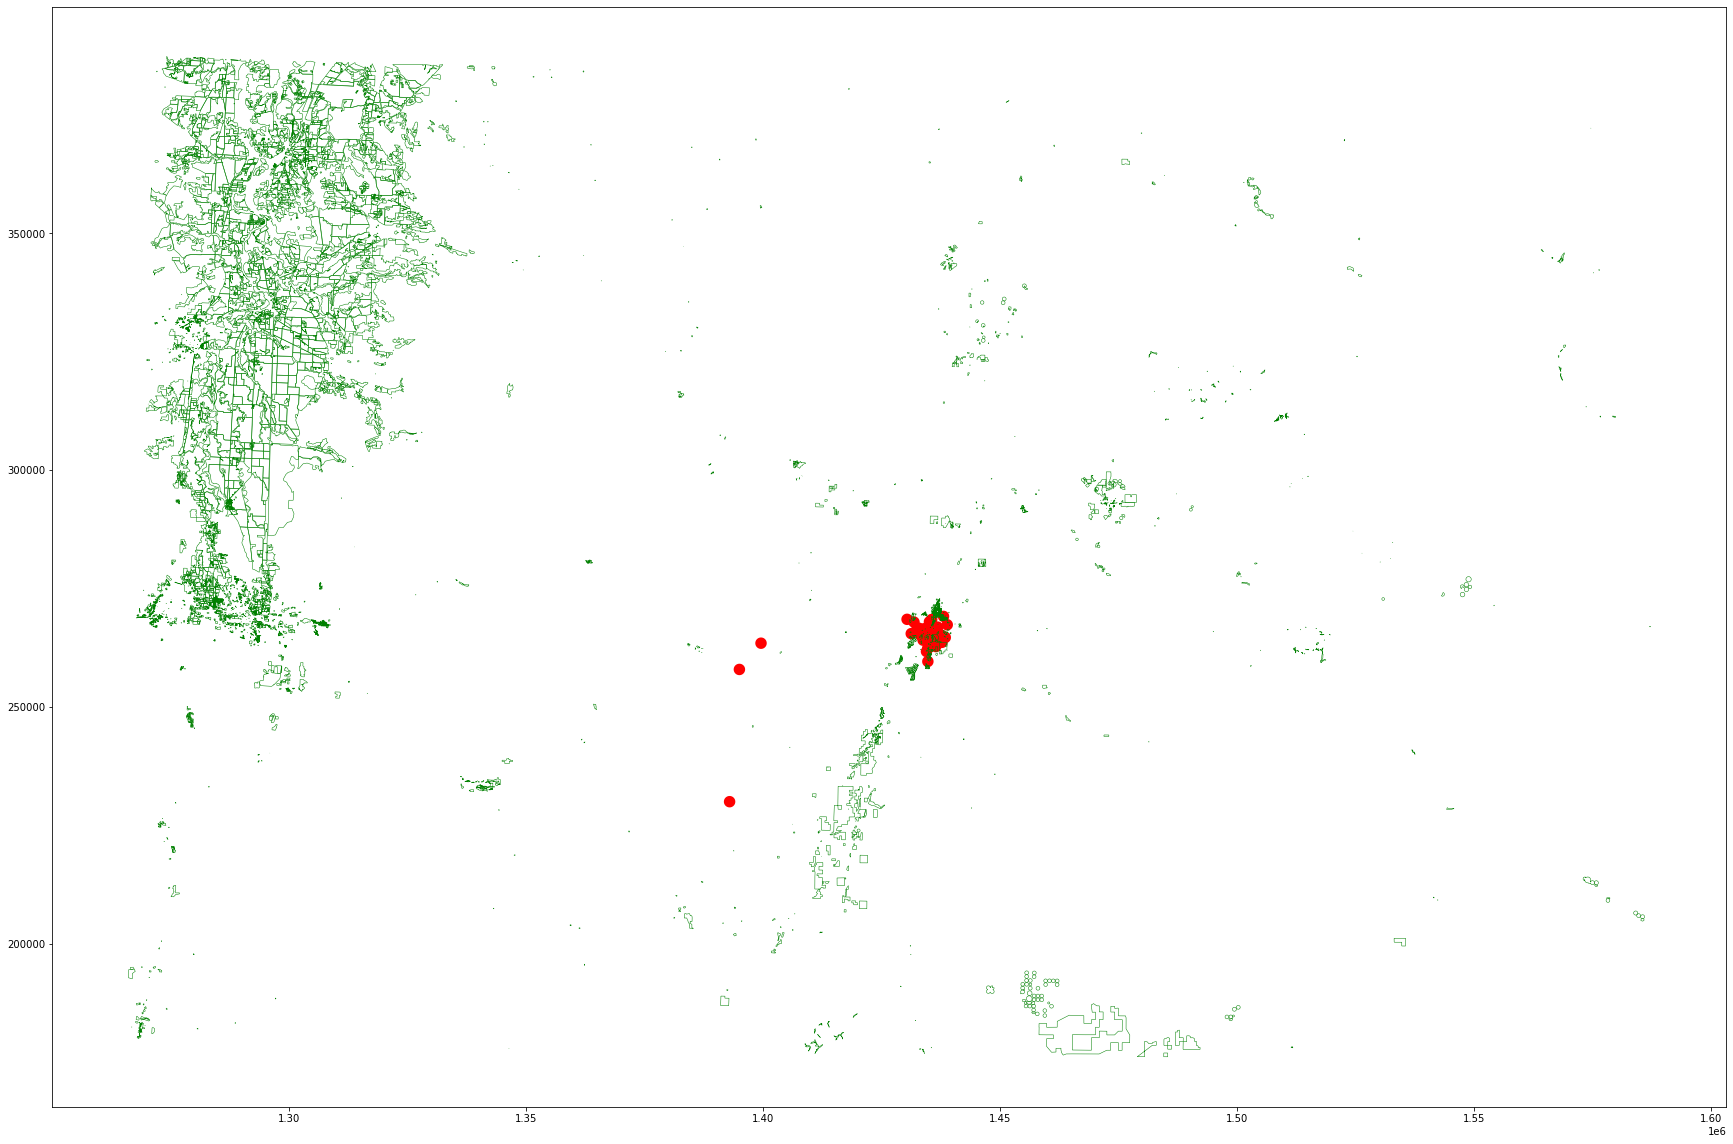

In [1020]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
luse_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# Now clip landuse with buffer

In [1021]:
import os 
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1022]:
#!pip install Rtree
#!pip install pygeos
#!pip install ujson
#!pip install wheel

In [1023]:
#luse_proj.exterior.type

In [1024]:
#gdf1.exterior.type

In [1025]:
#luse_proj.exterior.is_valid

In [1026]:
#gdf1.exterior.is_valid

In [1027]:
# Avoid this error- TopologyException: Input geom 0 is invalid: Self-intersection at 2307899.6553931381 208383.49467431975. Do the followings
luse_proj["geometry2"]=luse_proj.geometry.buffer(0)
# Now drop geometry column and rename geometry 2 equal to geometry again
luse_proj=luse_proj.drop(["geometry"],axis=1)
luse_proj.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
luse_proj.head(5)

osm_id                   name         type  \
0   5280431                   None       quarry   
1   5492216          Crescent Lake  residential   
2  30010727    Brown Road Property        grass   
3  30266634                   None       retail   
4  30267489  McNary Field Heliport     military   

                                            geometry  
0  POLYGON ((1384863.563 368001.131, 1384854.017 ...  
1  POLYGON ((1384502.788 204423.129, 1384649.913 ...  
2  POLYGON ((1305210.479 368501.172, 1305004.835 ...  
3  POLYGON ((1304521.449 363407.656, 1304372.154 ...  
4  POLYGON ((1302453.177 363994.477, 1302529.000 ...

In [1028]:
# Clip the data using GeoPandas clip
buffer_clip = gpd.clip(luse_proj, gdf1)
buffer_clip.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                        name         type  \
183   142063243           Old Mill District       retail   
213   181560708                        None  residential   
443   276799896               Park Services   commercial   
502   315771308  USFS Scott Street Compound   industrial   
1481  430396222                  Troy Field        grass   

                                               geometry  
183   POLYGON ((1434657.851 264874.287, 1434665.824 ...  
213   POLYGON ((1439206.898 266384.500, 1439209.114 ...  
443   POLYGON ((1433140.021 264799.907, 1433065.005 ...  
502   POLYGON ((1435396.191 265069.499, 1435407.899 ...  
1481  POLYGON ((1434738.094 265773.478, 1434690.687 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


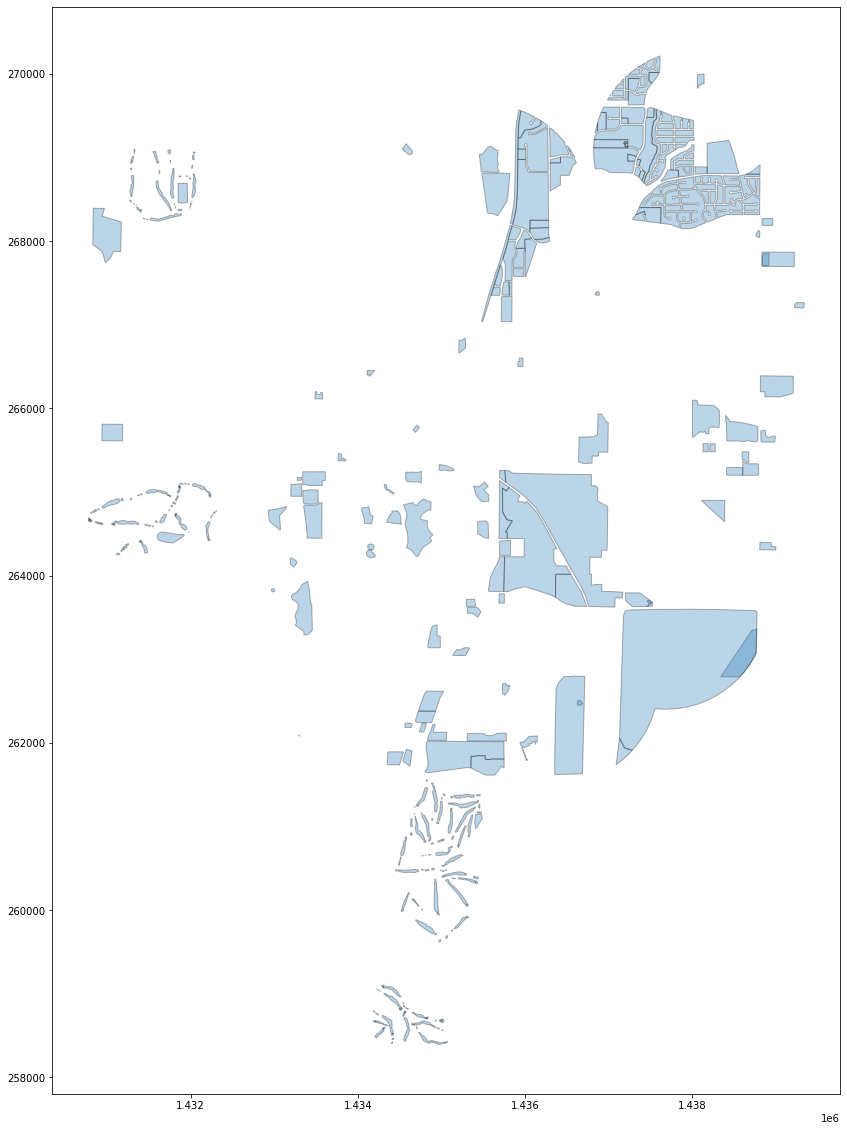

In [1029]:
ax = buffer_clip.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect the clipped area with Buffer ID

In [1030]:
 intdata=gpd.overlay(gdf1, buffer_clip, how='intersection', make_valid=True, keep_geom_type=False)
 intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                           site_name sensor_type  year region  \
0  P001BEN                       Colorado Ave.   permanent  2019   Bend   
1  P002BEN            Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN           Galveston Ave. Both Sides   permanent  2019   Bend   
3  S012BEN  WilsonAveEastof3rdBETWEEN4THAND5TH  short-term  2019   Bend   
4  S016BEN    Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             2.0   51.602827   2.780822   1.547945   2055.0  44.044249   
4             3.0   52.937398   1.726027   0.547945    920.0  44.052361   

    longitude comment  osm_id_sensor     osm_id               name    type  \
0 -121.319863     NaN     48381206.0  142063243  Old Mill District  retail   
1 -121.308599     NaN      5369877.0  142063243  Old Mill District  retail   
2 -121.324270     NaN     49105950.0  142063243  Old Mill District  retail   
3 -121.300039     NaN     48332546.0  142063243  Old Mill District  retail   
4 -121.315692     NaN     48381198.0  142063243  Old Mill District  retail   

                                            geometry  
0  POLYGON ((1434665.824 264858.586, 1434680.779 ...  
1  POLYGON ((1434744.550 264621.876, 1434637.472 ...  
2  POLYGON ((1434621.991 264812.480, 1434570.770 ...  
3  POLYGON ((1434678.689 264308.281, 1434672.877 ...  
4  POLYGON ((1434665.824 264858.586, 1434680.779 ...

In [1031]:
intdata["Area"]=intdata["geometry"].area*10.76 # in ft2
intdata.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                           site_name sensor_type  year region  \
0  P001BEN                       Colorado Ave.   permanent  2019   Bend   
1  P002BEN            Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN           Galveston Ave. Both Sides   permanent  2019   Bend   
3  S012BEN  WilsonAveEastof3rdBETWEEN4THAND5TH  short-term  2019   Bend   
4  S016BEN    Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             2.0   51.602827   2.780822   1.547945   2055.0  44.044249   
4             3.0   52.937398   1.726027   0.547945    920.0  44.052361   

    longitude comment  osm_id_sensor     osm_id               name    type  \
0 -121.319863     NaN     48381206.0  142063243  Old Mill District  retail   
1 -121.308599     NaN      5369877.0  142063243  Old Mill District  retail   
2 -121.324270     NaN     49105950.0  142063243  Old Mill District  retail   
3 -121.300039     NaN     48332546.0  142063243  Old Mill District  retail   
4 -121.315692     NaN     48381198.0  142063243  Old Mill District  retail   

                                            geometry          Area  
0  POLYGON ((1434665.824 264858.586, 1434680.779 ...  1.605203e+06  
1  POLYGON ((1434744.550 264621.876, 1434637.472 ...  6.196369e+05  
2  POLYGON ((1434621.991 264812.480, 1434570.770 ...  6.207701e+04  
3  POLYGON ((1434678.689 264308.281, 1434672.877 ...  9.156987e+05  
4  POLYGON ((1434665.824 264858.586, 1434680.779 ...  1.605203e+06

#https://geopandas.org/docs/user_guide/set_operations.html

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

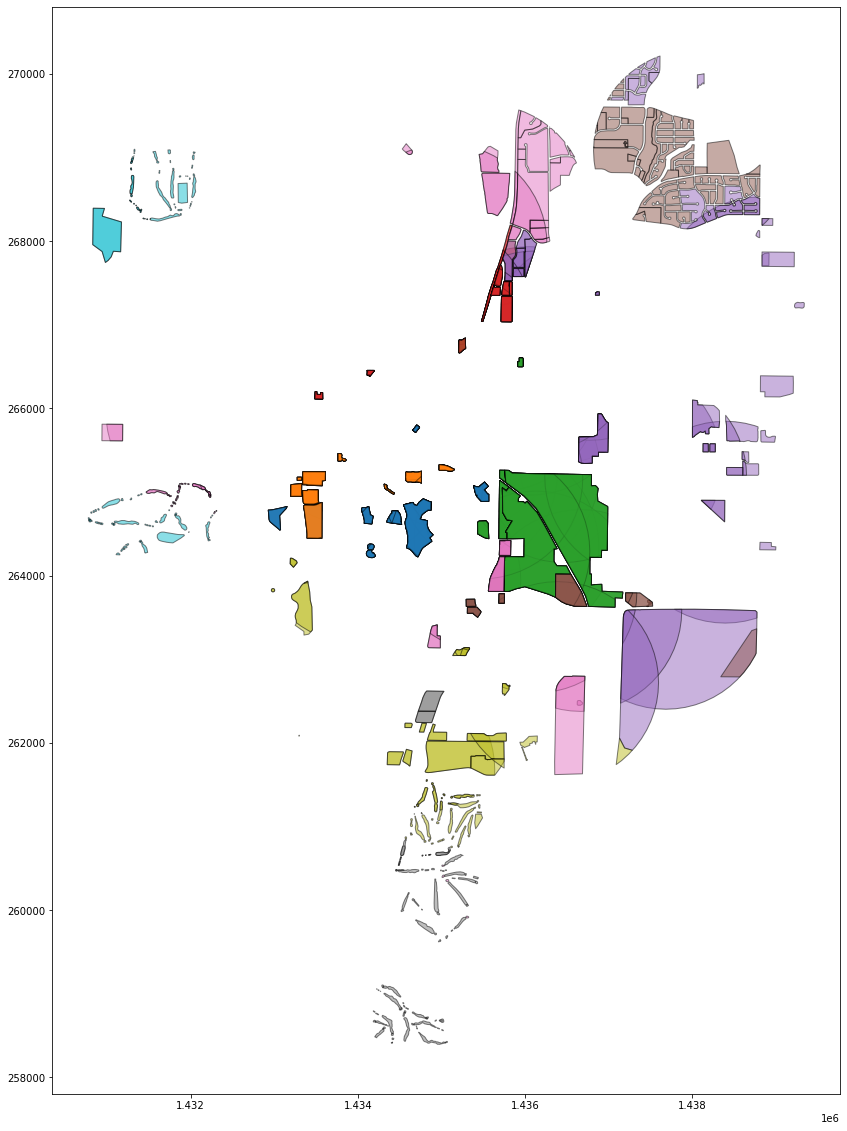

In [1032]:
intdata.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

# Aggregate data by ID

#https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

In [1033]:
output_landuse=intdata.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_landuse.columns=['osm_id','type','Area']
output_landuse.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id        type          Area
0  5369529.0       grass  8.342428e+05
1  5369529.0      quarry  1.632338e+06
2  5369733.0     garages  8.277633e+04
3  5369733.0       grass  1.233644e+05
4  5369733.0  industrial  7.598936e+06

In [1034]:
# Calculate commercial area
commercial  = intdata[intdata['type'].str.contains('commercial')]
output_commercial = commercial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_commercial.columns=['osm_id','Commercial Area ']
output_commercial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Commercial Area 
0  5372140.0      19812.870230
1  5375454.0     321006.601905
2  5376261.0     201465.984743
3  5376418.0        276.651623
4  5377057.0     184469.722894

In [1035]:
gdf1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor  \
0 -121.319863     NaN     48381206.0   
1 -121.308599     NaN      5369877.0   
2 -121.324270     NaN     49105950.0   
3 -121.314923     NaN     46094523.0   
4 -121.310496     NaN     46094520.0   

                                            geometry  
0  POLYGON ((1435504.665 265113.372, 1435498.853 ...  
1  POLYGON ((1436413.459 265737.006, 1436407.647 ...  
2  POLYGON ((1435158.422 265816.071, 1435152.610 ...  
3  POLYGON ((1435912.638 266350.843, 1435906.826 ...  
4  POLYGON ((1436270.176 266646.066, 1436264.364 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

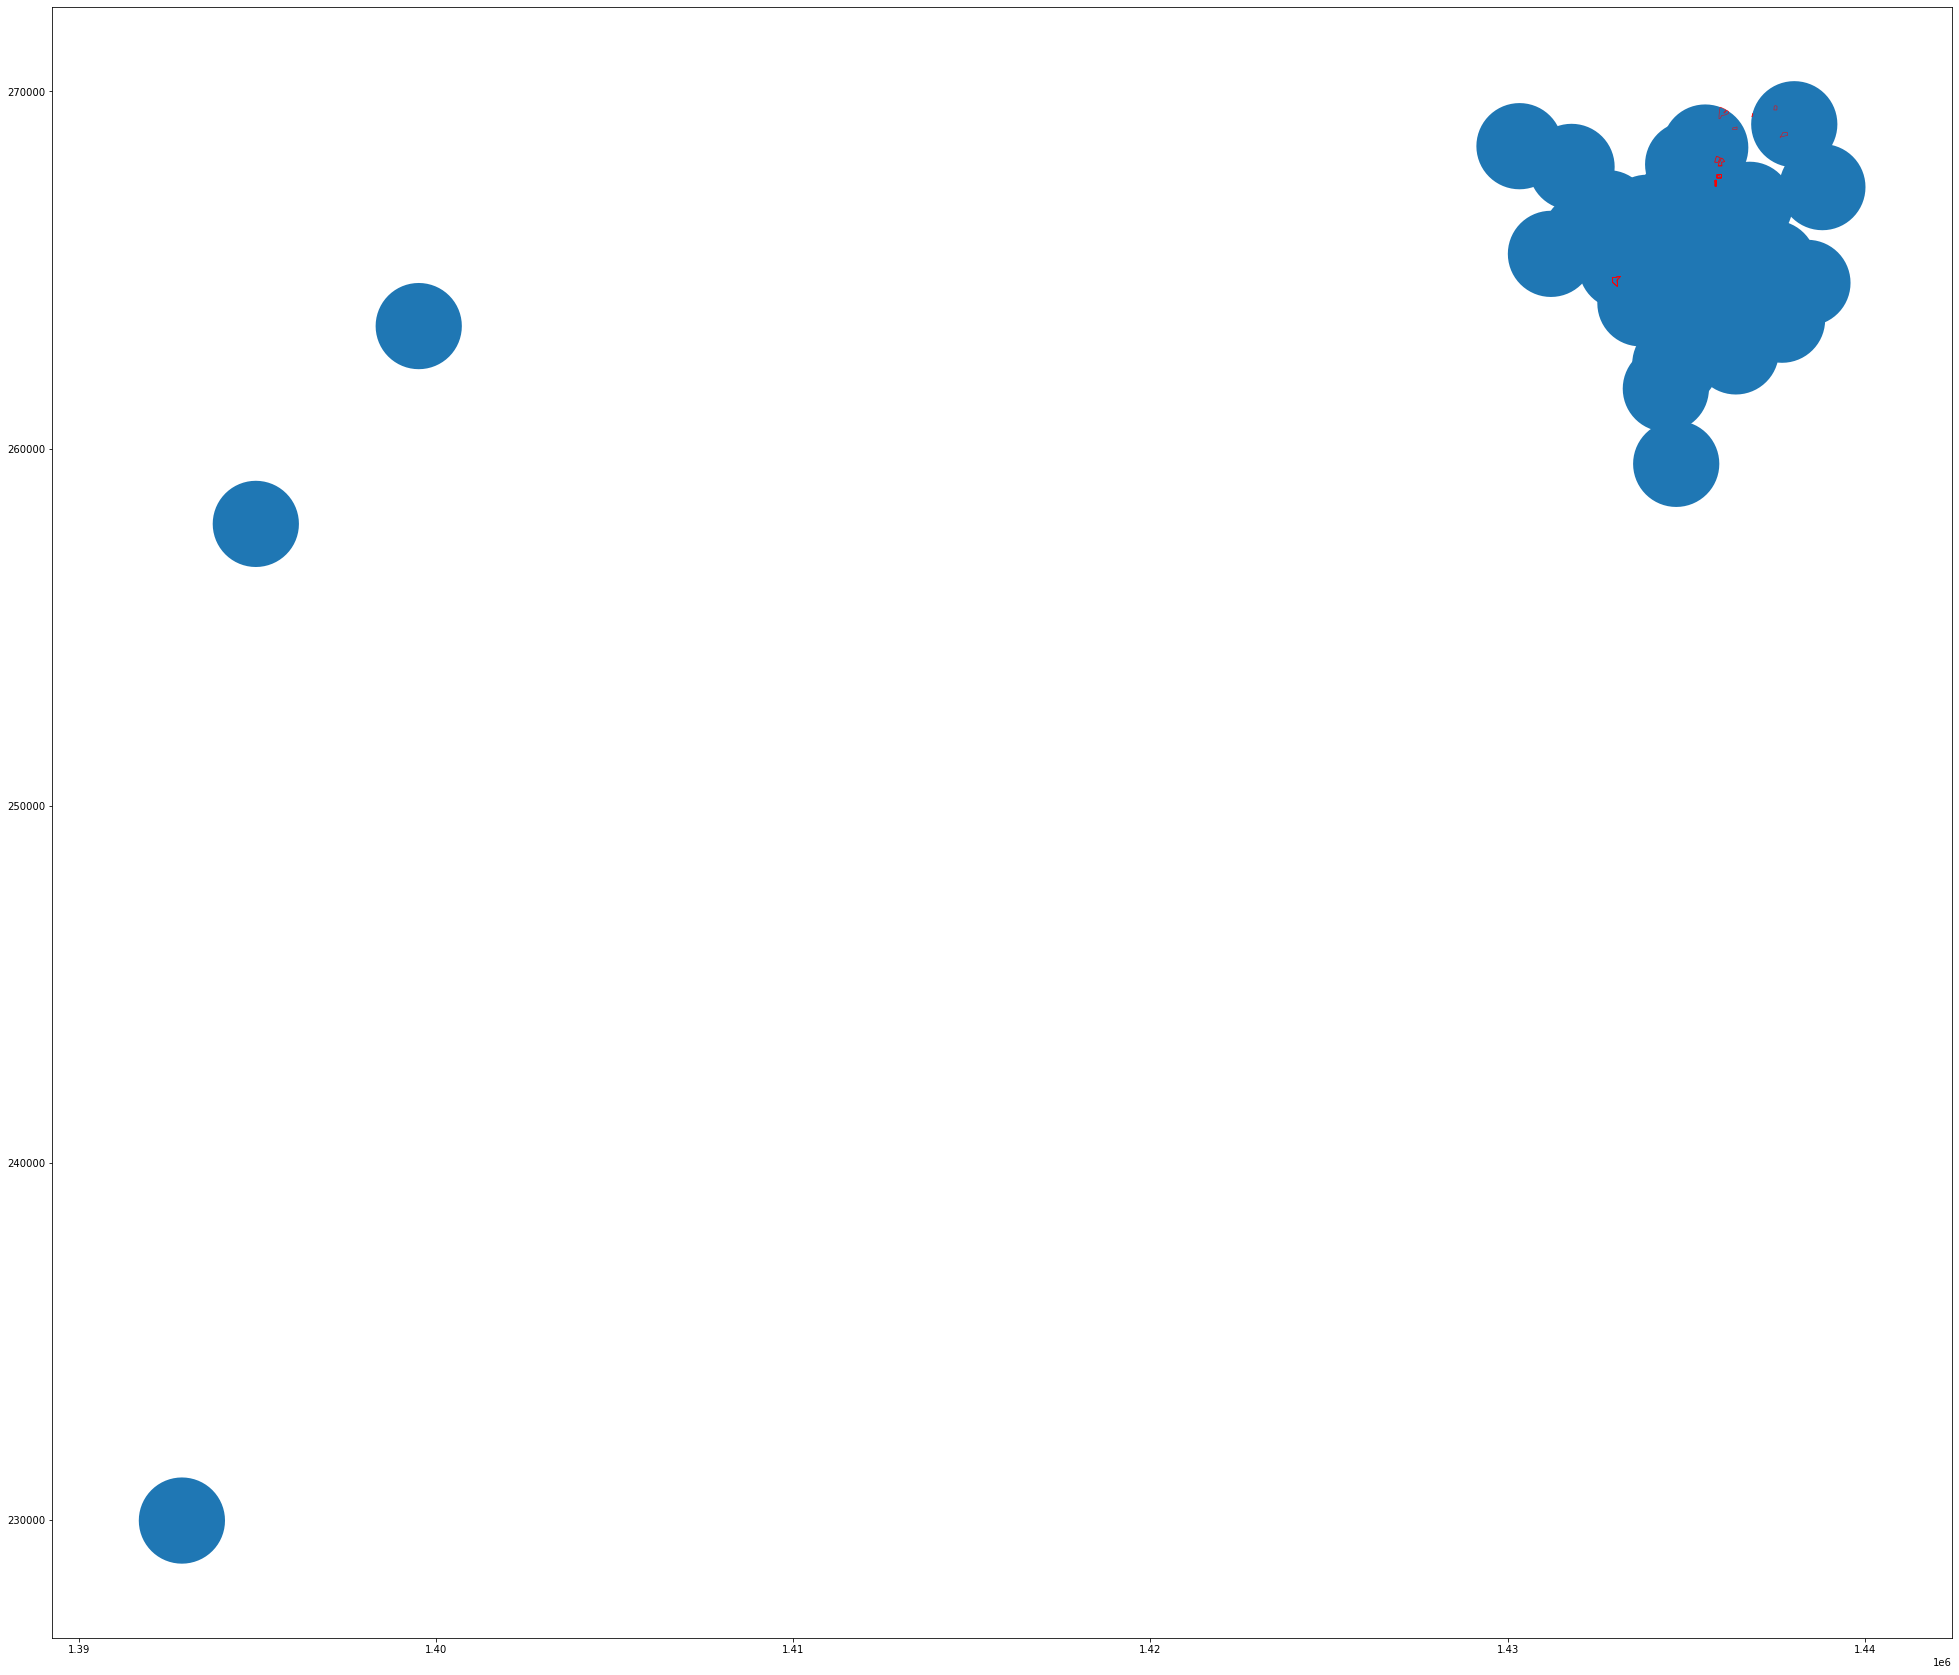

In [1036]:
#plotting    
ax = gdf1.plot(figsize=(40, 30))
commercial.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1037]:
# Calculate inductrial area
industrial  = intdata[intdata['type'].str.contains('industrial')]
output_industrial = industrial  .groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_industrial.columns=['osm_id','Industrial Area ']
output_industrial.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Industrial Area 
0  5369733.0      7.598936e+06
1  5369877.0      1.568200e+06
2  5371320.0      1.572170e+06
3  5372140.0      9.144924e+05
4  5372797.0      6.555875e+06

In [1038]:
# Calculate residential area
residential  = intdata[intdata['type'].str.contains('residential')]
output_residential = residential.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_residential.columns=['osm_id','Residential_Area ']
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Area 
0  5369733.0       6.122523e+06
1  5369877.0       7.049577e+05
2  5371320.0       1.187984e+07
3  5372140.0       2.762592e+04
4  5372768.0       2.046783e+06

In [1039]:
residential.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                           site_name sensor_type  year region  \
248  P002BEN            Franklin Ave. Both Sides   permanent  2019   Bend   
249  S002BEN          15thbetweenBearCreek&Hwy20  short-term  2019   Bend   
250  S012BEN  WilsonAveEastof3rdBETWEEN4THAND5TH  short-term  2019   Bend   
251  S016BEN    Colorado between Staats and Bond  short-term  2019   Bend   
252  S017BEN    3rdStRailOverpassSouthofBurnside  short-term  2019   Bend   

     travel_pattern       AADBT   stv_adb  stv_c_adb  stl_raw   latitude  \
248             2.0  220.426625  6.958904   3.068493   2617.0  44.055983   
249             2.0   32.120288  2.657534   0.794521    820.0  44.052510   
250             2.0   51.602827  2.780822   1.547945   2055.0  44.044249   
251             3.0   52.937398  1.726027   0.547945    920.0  44.052361   
252             2.0  100.823272  0.986301   0.534247   3898.0  44.051749   

      longitude                                            comment  \
248 -121.308599                                                NaN   
249 -121.284333  15th is divided here; unclear if covers NB (81...   
250 -121.300039                                                NaN   
251 -121.315692                                                NaN   
252 -121.302536                                                NaN   

     osm_id_sensor     osm_id  name         type  \
248      5369877.0  767945534  None  residential   
249     47346890.0  767945534  None  residential   
250     48332546.0  767945534  None  residential   
251     48381198.0  767945534  None  residential   
252      5372797.0  767945534  None  residential   

                                              geometry          Area  
248  POLYGON ((1435972.169 264803.977, 1435877.029 ...  7.049577e+05  
249  POLYGON ((1436293.683 264479.107, 1436214.136 ...  1.576033e+05  
250  POLYGON ((1435990.994 264443.608, 1435787.172 ...  5.935675e+06  
251  POLYGON ((1435789.201 264989.698, 1435749.297 ...  7.727413e+04  
252  POLYGON ((1436256.683 264197.330, 1436149.606 ...  3.729767e+06

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

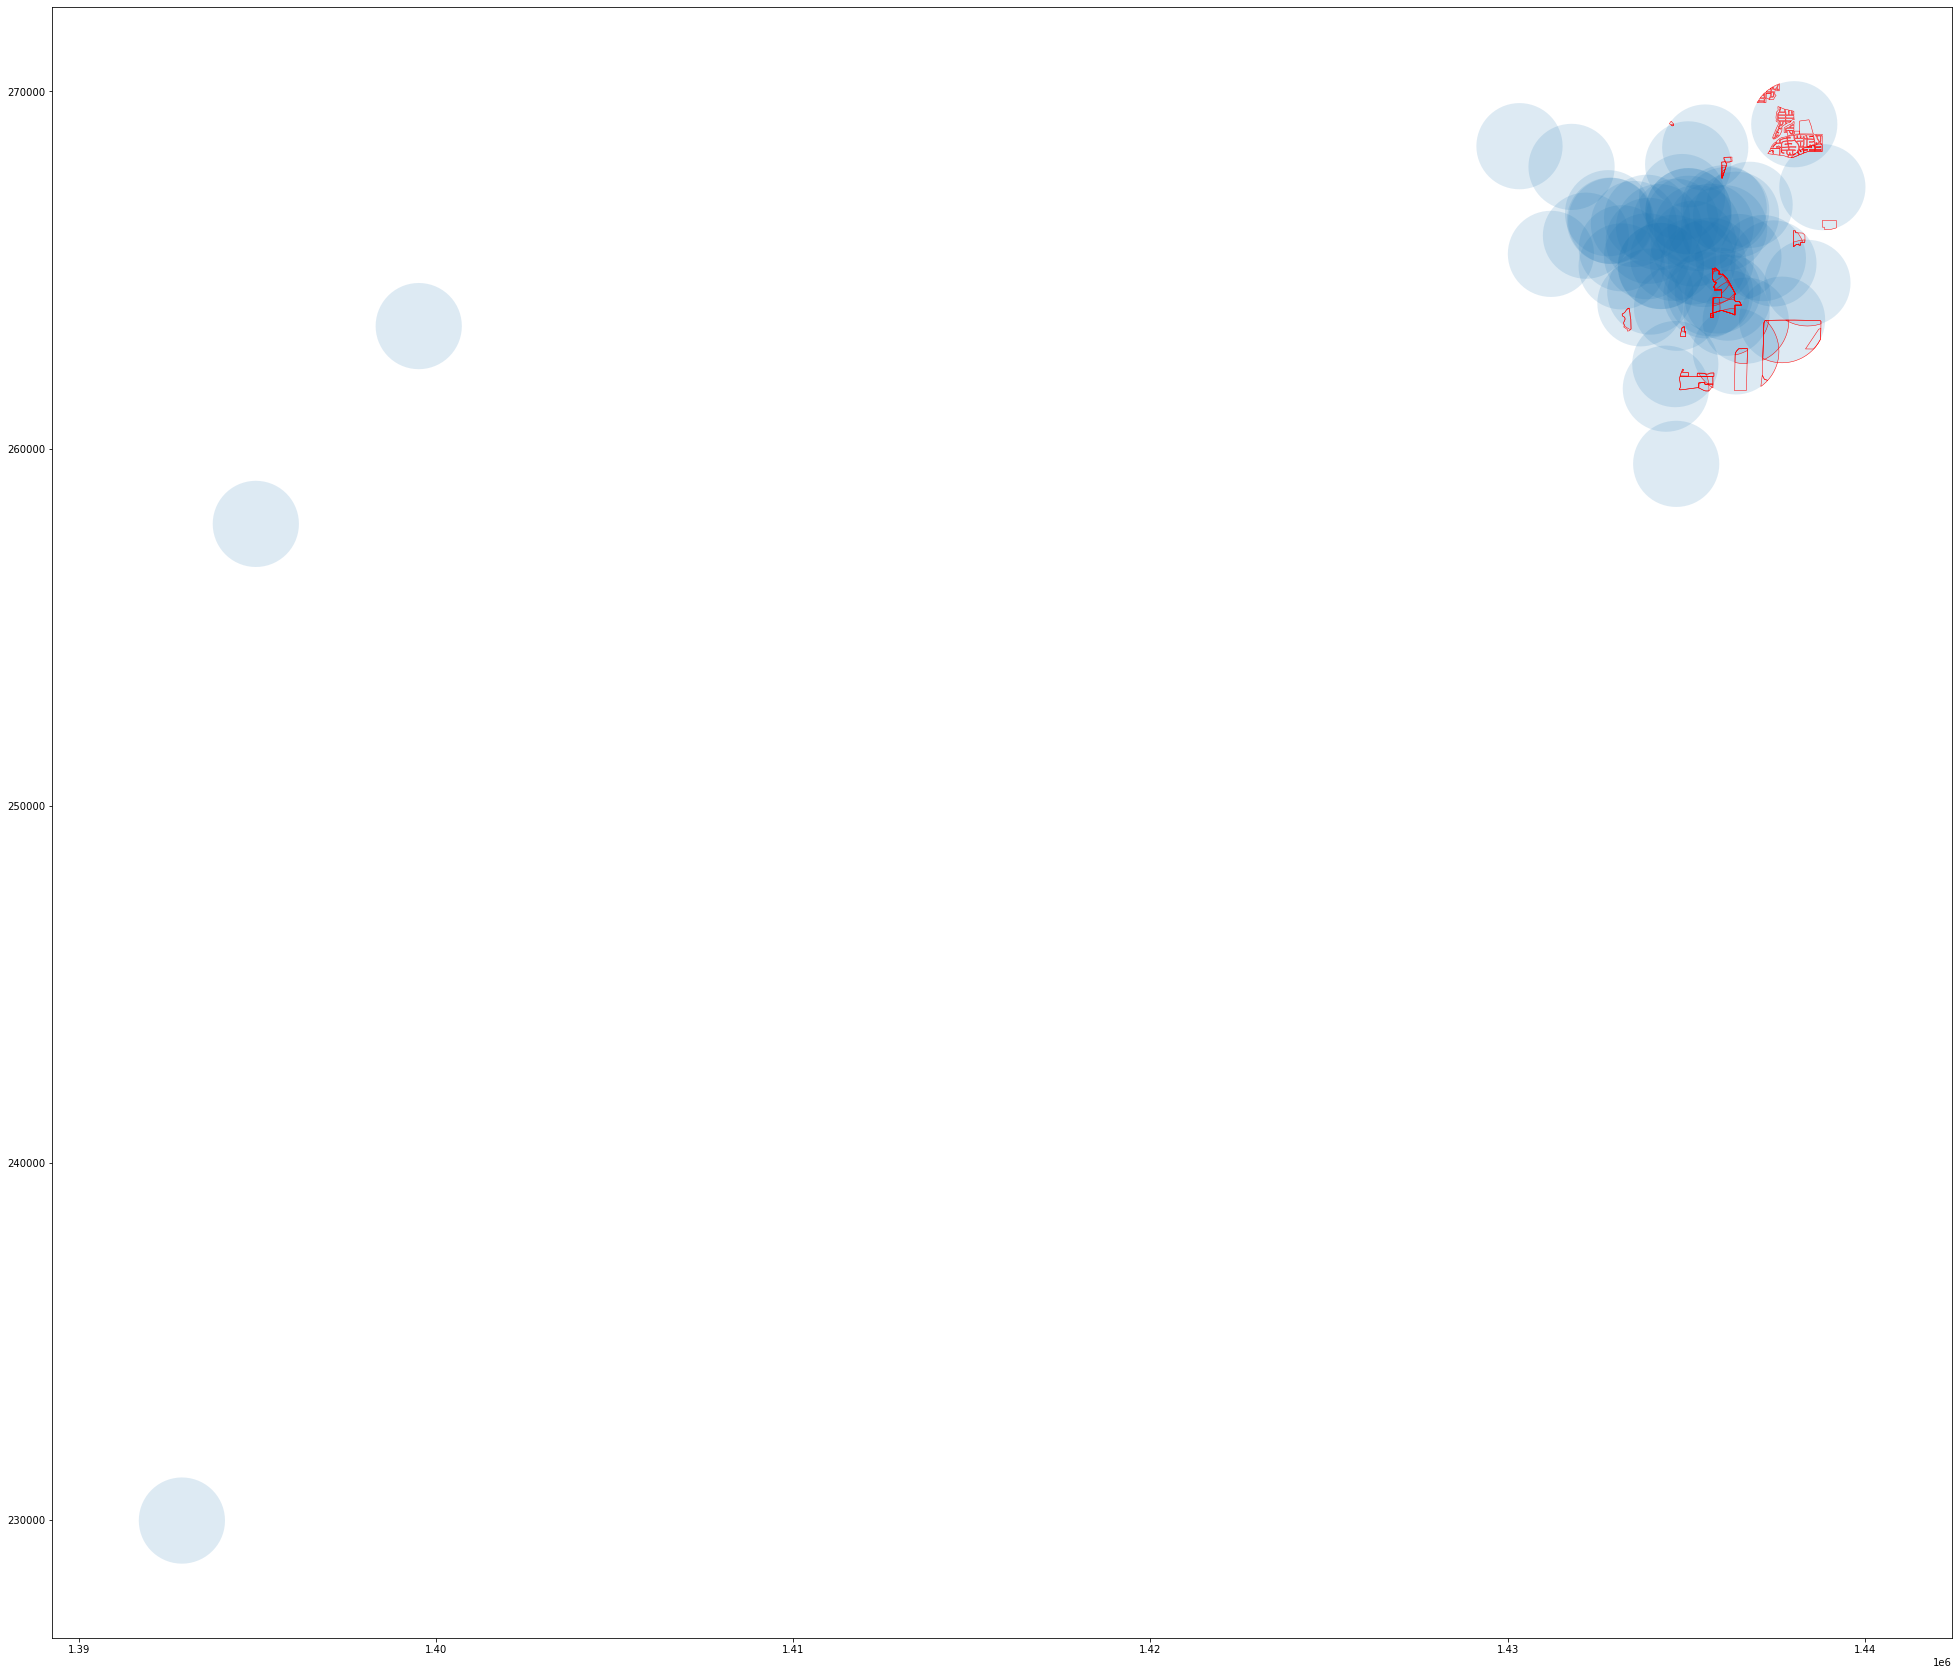

In [1040]:
#plotting    
ax = gdf1.plot(figsize=(40, 30),alpha=0.15)
residential.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 0.5,ax=ax)

In [1041]:
# Calculate retail area
retail  = intdata[intdata['type'].str.contains('retail')]
output_retail = retail.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_retail.columns=['osm_id','Retail Area']
output_retail.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Retail Area
0  5369733.0  3.351013e+06
1  5369877.0  1.219945e+06
2  5371320.0  7.139684e+04
3  5372140.0  7.247416e+05
4  5372797.0  2.143134e+06

In [1042]:
# Calculate grass area
grass  = intdata[intdata['type'].str.contains('grass')]
output_grass = grass.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_grass.columns=['osm_id','Grass Area']
output_grass.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Grass Area
0  5369529.0  834242.825420
1  5369733.0  123364.417026
2  5369877.0  125087.564898
3  5371320.0  298851.140255
4  5372140.0   94092.349821

In [1043]:
output_grass.index

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RangeIndex(start=0, stop=46, step=1)

# Use the Natural Shape file to calculate the Park, water and green spaces

In [1044]:
#nature=gpd.read_file("../input/osm-data/natural.shp")
nature.head(5)

osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((-121.30684 44.07593, -121.30712 44.0...  
1  POLYGON ((-123.11511 44.06993, -123.11502 44.0...  
2  POLYGON ((-123.11552 44.07244, -123.11557 44.0...  
3  POLYGON ((-123.11880 44.08418, -123.11888 44.0...  
4  POLYGON ((-122.96766 44.99005, -122.96836 44.9...

In [1045]:
# set the co-ordinate system first
# nature = nature.set_crs("EPSG:4326")
# Let's take a copy of our layer
nature_proj = nature.copy()

# Reproject the geometries by replacing the values with projected ones
nature_proj = nature_proj.to_crs(epsg=2839)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290536.901 ...  
2  POLYGON ((1290505.755 270524.092, 1290500.193 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305294.417 ...

In [1046]:
#nature_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

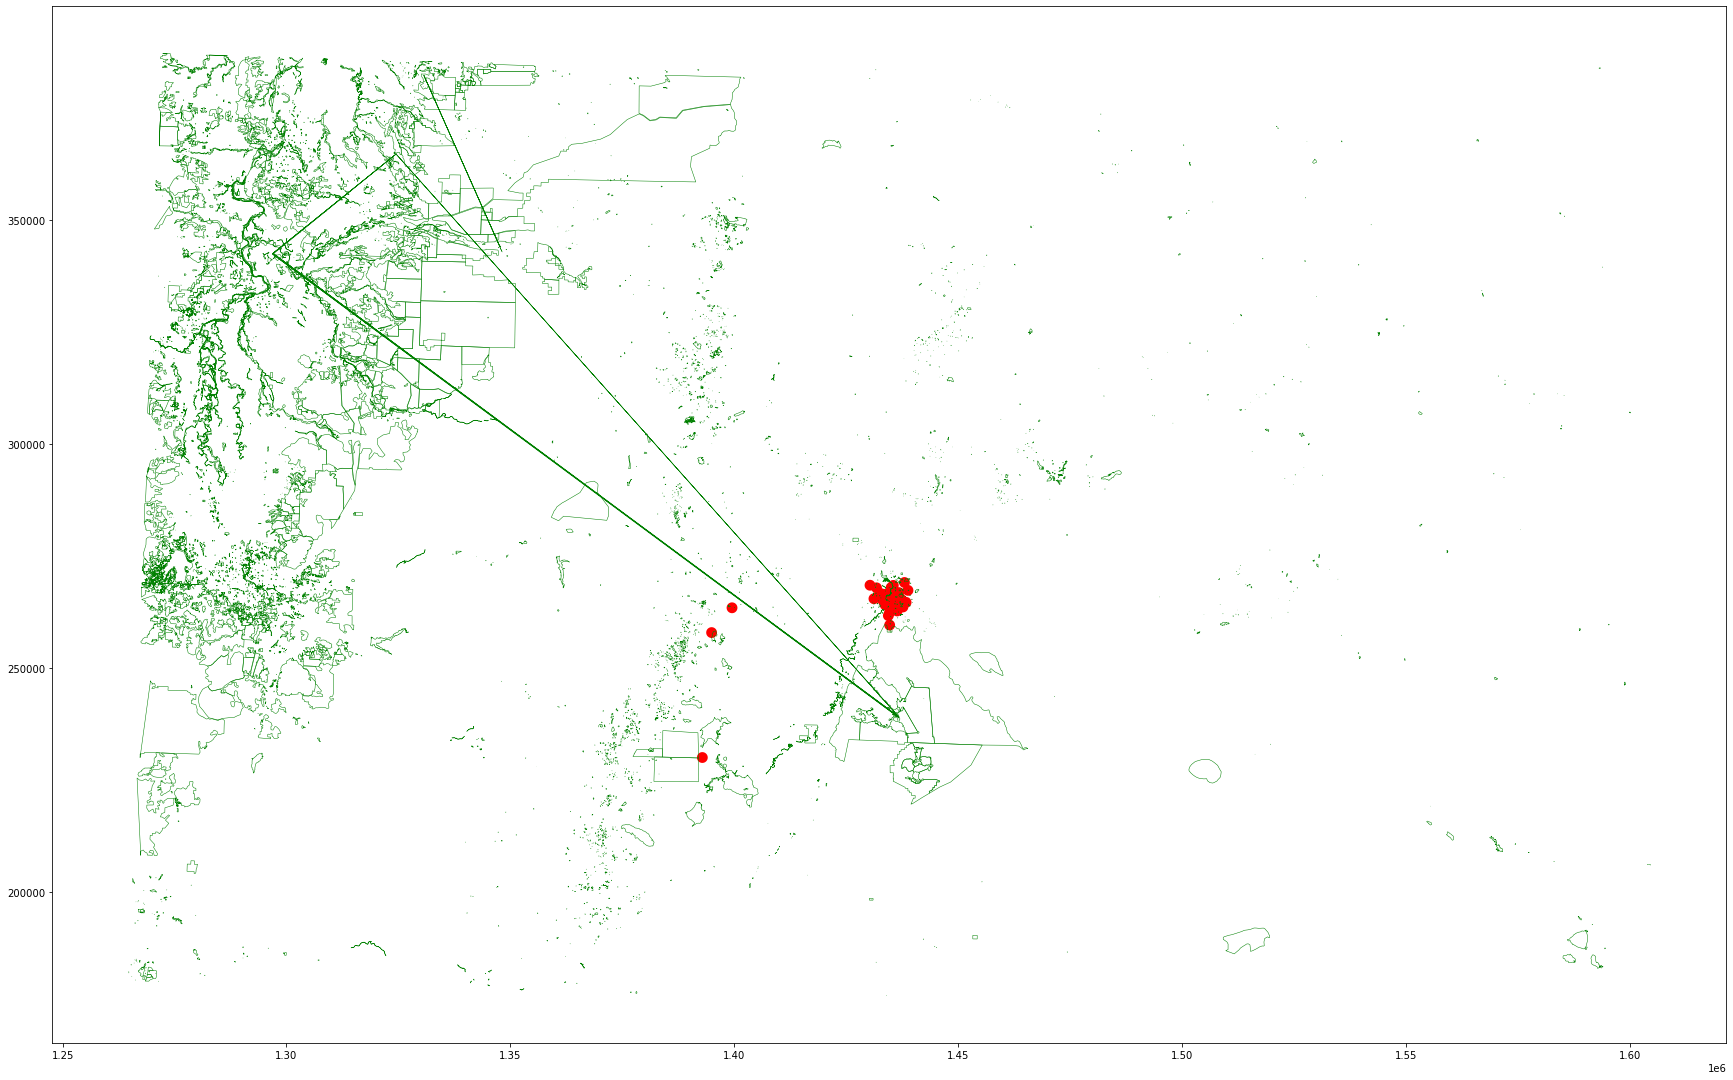

In [1047]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
nature_proj.geometry.boundary.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

# There is some invalid polygon in the shape file that need to pass through zero geom to correct it

In [1048]:
nature_proj["geometry2"]=nature_proj.geometry.buffer(0)
nature_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  \
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...   
1  POLYGON ((1290529.862 270244.069, 1290536.901 ...   
2  POLYGON ((1290505.755 270524.092, 1290500.193 ...   
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...   
4  POLYGON ((1305349.877 372106.996, 1305294.417 ...   

                                           geometry2  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [1049]:
# Now drop geometry column and rename geometry 2 equal to geometry again
nature_proj1=nature_proj.drop(["geometry"],axis=1)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                           geometry2  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [1050]:
nature_proj1.rename({'geometry2': 'geometry'}, axis=1, inplace=True)
nature_proj1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [1051]:
# Clip the data using GeoPandas clip
buffer_clip_nature = gpd.clip(nature_proj1, gdf1)
buffer_clip_nature.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                    name   type  \
0      24445541                    None  water   
117    47878719         Deschutes River  water   
129    70802945                Elk Lake  water   
371   142063140             Mirror Pond  water   
372   142063146         Deschutes River  water   
754   216988540  Pilot Butte State Park   park   
941   239283496                    None  water   
972   240342933                    None  water   
1398  270528029                    None  water   
1433  276799853           Al Moody Park   park   

                                               geometry  
0     POLYGON ((1435347.324 267954.624, 1435349.221 ...  
117   POLYGON ((1435410.833 267933.677, 1435420.175 ...  
129   POLYGON ((1394959.985 256698.708, 1394950.318 ...  
371   POLYGON ((1434627.145 266288.990, 1434637.430 ...  
372   POLYGON ((1434873.783 267022.932, 1434886.188 ...  
754   POLYGON ((1437201.321 266398.137, 1437608.463 ...  
941   POLYGON ((1433124.434 263022.848, 1433132.322 ...  
972   POLYGON ((1438756.641 269688.122, 1438760.064 ...  
1398  POLYGON ((1435241.508 268838.326, 1435229.575 ...  
1433  POLYGON ((1437525.654 267596.087, 1437608.793 ...

In [1052]:
inter_nature=gpd.overlay(gdf1, buffer_clip_nature, how='intersection', make_valid=True, keep_geom_type=False)
inter_nature.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor     osm_id         name   type  \
0 -121.319863     NaN     48381206.0  142063140  Mirror Pond  water   
1 -121.308599     NaN      5369877.0  142063140  Mirror Pond  water   
2 -121.324270     NaN     49105950.0  142063140  Mirror Pond  water   
3 -121.314923     NaN     46094523.0  142063140  Mirror Pond  water   
4 -121.310496     NaN     46094520.0  142063140  Mirror Pond  water   

                                            geometry  
0  POLYGON ((1434648.033 266268.407, 1434721.310 ...  
1  POLYGON ((1434022.636 265972.482, 1434051.417 ...  
2  POLYGON ((1434637.430 266308.403, 1434640.914 ...  
3  POLYGON ((1434637.430 266308.403, 1434640.914 ...  
4  POLYGON ((1434059.578 265975.488, 1433998.935 ...

In [1053]:
inter_nature["Area"]=inter_nature["geometry"].area*10.76 # in ft2
inter_nature.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor     osm_id         name   type  \
0 -121.319863     NaN     48381206.0  142063140  Mirror Pond  water   
1 -121.308599     NaN      5369877.0  142063140  Mirror Pond  water   
2 -121.324270     NaN     49105950.0  142063140  Mirror Pond  water   
3 -121.314923     NaN     46094523.0  142063140  Mirror Pond  water   
4 -121.310496     NaN     46094520.0  142063140  Mirror Pond  water   

                                            geometry          Area  
0  POLYGON ((1434648.033 266268.407, 1434721.310 ...  1.016599e+06  
1  POLYGON ((1434022.636 265972.482, 1434051.417 ...  8.806092e+05  
2  POLYGON ((1434637.430 266308.403, 1434640.914 ...  1.169210e+06  
3  POLYGON ((1434637.430 266308.403, 1434640.914 ...  1.169210e+06  
4  POLYGON ((1434059.578 265975.488, 1433998.935 ...  8.816296e+05

In [1054]:
#inter_nature.plot(figsize=(20, 20),alpha=0.5, edgecolor='k', cmap='tab10')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1055]:
output_nature=inter_nature.groupby(by=['osm_id_sensor','type'])['Area'].sum().reset_index()
output_nature.head()

osm_id_sensor   type          Area
0      5369529.0   park  2.297952e+05
1      5369529.0  water  1.605029e+05
2      5369733.0   park  8.402346e+05
3      5369733.0  water  1.400660e+04
4      5369877.0   park  2.170510e+06

In [1056]:
# Calculate park area
park  = inter_nature[inter_nature['type'].str.contains('park')]
output_park = park.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_park.columns=['osm_id',"Park Area"]
output_park.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Park Area
0  5369529.0  2.297952e+05
1  5369733.0  8.402346e+05
2  5369877.0  2.170510e+06
3  5371320.0  6.355634e+05
4  5372140.0  1.962233e+06

In [1057]:
# Calculate water area
water  = inter_nature[inter_nature['type'].str.contains('water')]
output_water= water.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_water.columns=['osm_id',"Water Area"]
output_water.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id    Water Area
0  5369529.0  1.605029e+05
1  5369733.0  1.400660e+04
2  5369877.0  1.313966e+06
3  5371320.0  4.656640e+04
4  5372140.0  8.745415e+05

In [1058]:
# Calculate forest area
forest  = inter_nature[inter_nature['type'].str.contains('forest')]
output_forest= forest.groupby(by=['osm_id_sensor'])['Area'].sum().reset_index()
output_forest.columns=['osm_id',"Forest Area"]
output_forest.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   Forest Area
0   5372611.0  4.590970e+06
1   5376261.0  9.722861e+04
2   5377057.0  4.278091e+04
3  47636835.0  7.773288e+05
4  48332549.0  1.132280e+04

# Use the Point Shape file to calculate the Bicycle parking, Bus/Train stops, Intersection Density, School/College/University

In [1059]:
#pts=gpd.read_file("../input/osm-data/points.shp")
pts.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp            name            type  \
0  34704797      None   Potamus Point       viewpoint   
1  35395767      None            None         parking   
2  36172933      None            None  level_crossing   
3  36177686      None  South Junction        junction   
4  36178950      None            None  turning_circle   

                      geometry  
0  POINT (-119.22804 45.01644)  
1  POINT (-120.86394 43.52037)  
2  POINT (-121.07508 44.85428)  
3  POINT (-121.07505 44.85513)  
4  POINT (-121.35164 44.98097)

In [1060]:
# set the co-ordinate system first
#pts = pts.set_crs("EPSG:4326")
# Let's take a copy of our layer
pts_proj = pts.copy()

# Reproject the geometries by replacing the values with projected ones
pts_proj = pts_proj.to_crs(epsg=2839)
pts_proj.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp            name            type  \
0  34704797      None   Potamus Point       viewpoint   
1  35395767      None            None         parking   
2  36172933      None            None  level_crossing   
3  36177686      None  South Junction        junction   
4  36178950      None            None  turning_circle   

                         geometry  
0  POINT (1600300.449 372934.141)  
1  POINT (1470579.071 205978.691)  
2  POINT (1454528.255 354301.624)  
3  POINT (1454531.127 354395.096)  
4  POINT (1432804.205 368570.488)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

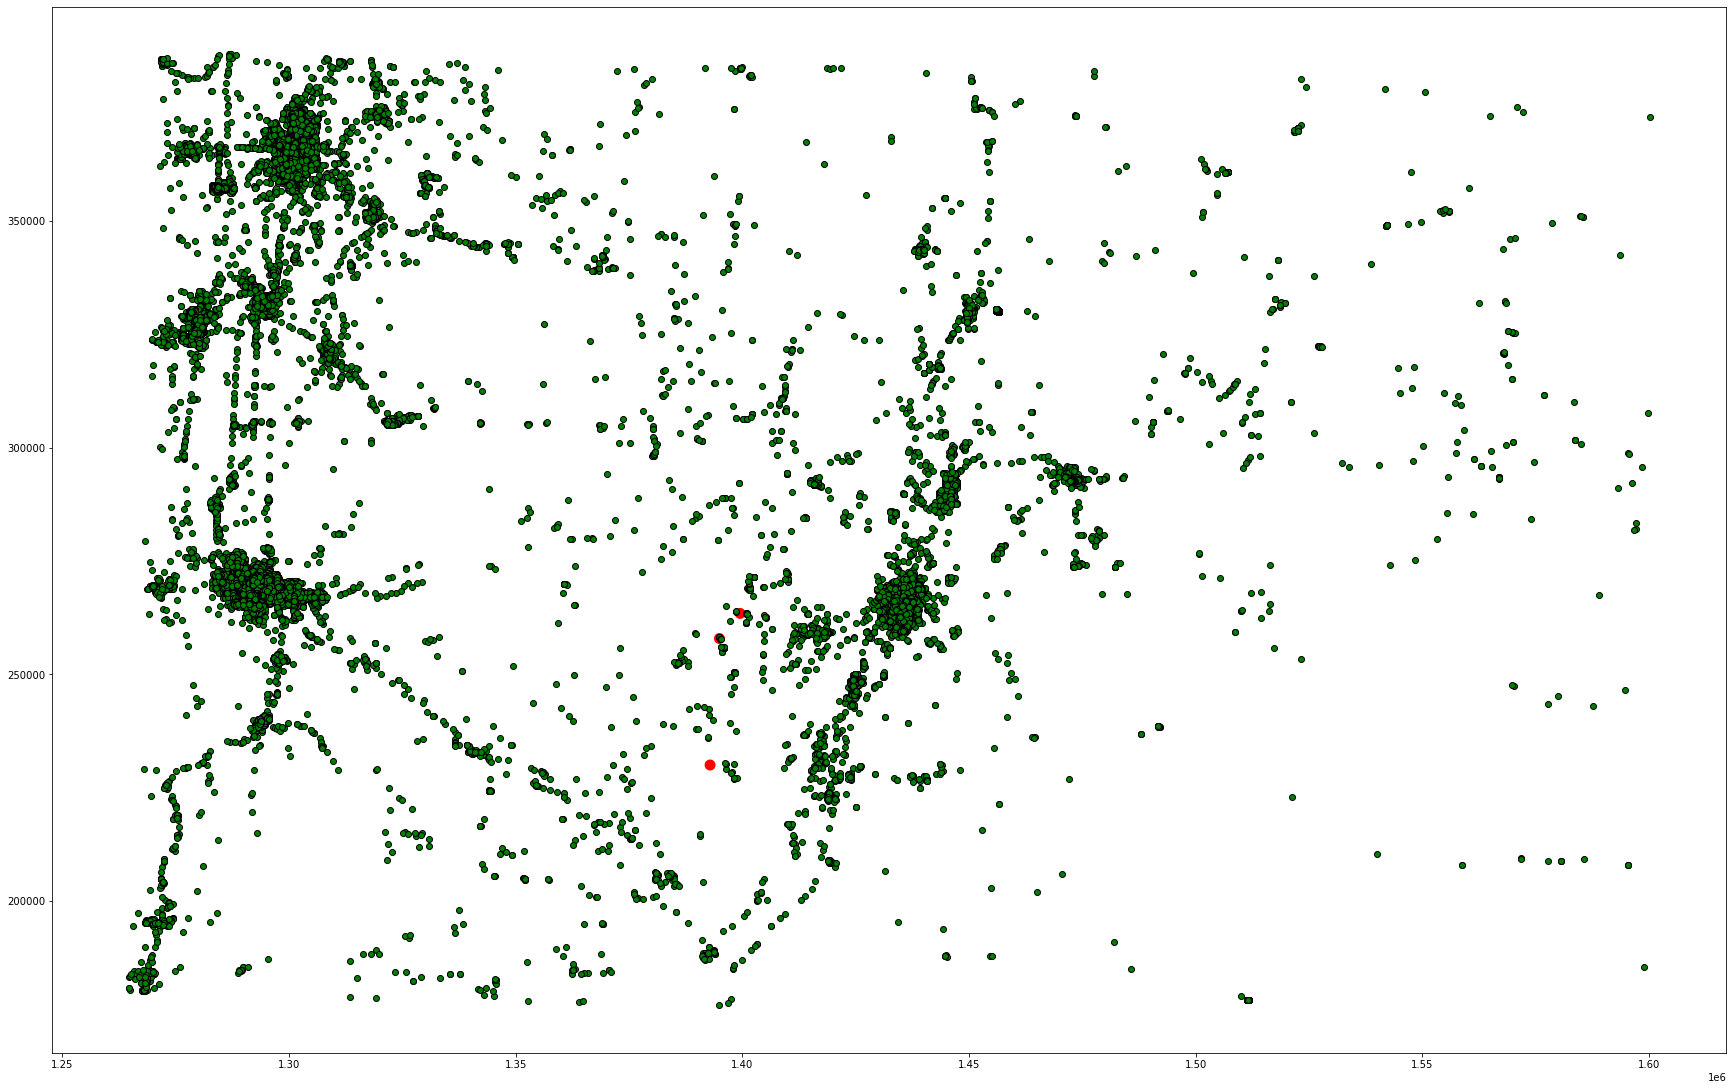

In [1061]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
pts_proj.plot(color="green",edgecolor='k',ax=ax) #Use your second dataframe

In [1062]:
# Clip the data using GeoPandas clip
buffer_clip_pts = gpd.clip(pts_proj, gdf1)
buffer_clip_pts.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id timestamp  name            type                        geometry
485  38178173      None  None  turning_circle  POINT (1433576.437 261006.867)
487  38195291      None  None  turning_circle  POINT (1434993.949 263621.929)
489  38203390      None  None  turning_circle  POINT (1437584.880 268462.856)
490  38204742      None  None    turning_loop  POINT (1434389.430 262835.242)
498  38222528      None  None  turning_circle  POINT (1436950.630 262922.729)

In [1063]:
#ax = buffer_clip_pts.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1064]:
inter_pts=gpd.overlay(gdf1, buffer_clip_pts, how='intersection', make_valid=True, keep_geom_type=False)
inter_pts.head(5)

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor    osm_id timestamp  name  \
0 -121.319863     NaN     48381206.0  38258172      None  None   
1 -121.308599     NaN      5369877.0  38258172      None  None   
2 -121.324270     NaN     49105950.0  38258172      None  None   
3 -121.314923     NaN     46094523.0  38258172      None  None   
4 -121.310496     NaN     46094520.0  38258172      None  None   

              type                        geometry  
0  traffic_signals  POINT (1434682.950 265974.109)  
1  traffic_signals  POINT (1434682.950 265974.109)  
2  traffic_signals  POINT (1434682.950 265974.109)  
3  traffic_signals  POINT (1434682.950 265974.109)  
4  traffic_signals  POINT (1434682.950 265974.109)

# Calculate the bicycle parking

In [1065]:
#k1 = df.loc[(df.Product == p_id) & (df.Time >= start_time) & (df.Time < end_time), ['Time', 'Product']]
b_parking = inter_pts[inter_pts['type'].str.contains('bicycle_parking')]
b_parking.head(5)


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
1355  P001BEN              Colorado Ave.   permanent  2019   Bend   
1356  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
1357  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
1358  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
1359  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

      travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
1355             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1356             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
1357             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
1358             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
1359             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

       longitude comment  osm_id_sensor     osm_id timestamp  name  \
1355 -121.319863     NaN     48381206.0  380648495      None  None   
1356 -121.308599     NaN      5369877.0  380648495      None  None   
1357 -121.324270     NaN     49105950.0  380648495      None  None   
1358 -121.314923     NaN     46094523.0  380648495      None  None   
1359 -121.310496     NaN     46094520.0  380648495      None  None   

                 type                        geometry  
1355  bicycle_parking  POINT (1434784.790 266082.861)  
1356  bicycle_parking  POINT (1434784.790 266082.861)  
1357  bicycle_parking  POINT (1434784.790 266082.861)  
1358  bicycle_parking  POINT (1434784.790 266082.861)  
1359  bicycle_parking  POINT (1434784.790 266082.861)

In [1066]:
output_bparking=b_parking.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bparking.columns=["osm_id","Bicycle Parking"]
output_bparking.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bicycle Parking
0  5369529.0                1
1  5369877.0               11
2  5372140.0               10
3  5372909.0               10
4  5373510.0                8

# Calculate bus stops

In [1067]:
transit_stops= inter_pts[inter_pts['type'].str.contains('bus_stop')]
transit_stops.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
248  P001BEN              Colorado Ave.   permanent  2019   Bend   
249  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
250  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
251  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
252  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

     travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
248             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
249             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
250             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
251             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
252             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

      longitude comment  osm_id_sensor     osm_id timestamp  name      type  \
248 -121.319863     NaN     48381206.0  477913163      None  None  bus_stop   
249 -121.308599     NaN      5369877.0  477913163      None  None  bus_stop   
250 -121.324270     NaN     49105950.0  477913163      None  None  bus_stop   
251 -121.314923     NaN     46094523.0  477913163      None  None  bus_stop   
252 -121.310496     NaN     46094520.0  477913163      None  None  bus_stop   

                           geometry  
248  POINT (1434590.619 266043.726)  
249  POINT (1434590.619 266043.726)  
250  POINT (1434590.619 266043.726)  
251  POINT (1434590.619 266043.726)  
252  POINT (1434590.619 266043.726)

In [1068]:
output_bstop=transit_stops.groupby(by=['osm_id_sensor'])['type'].count().reset_index()
output_bstop.columns=["osm_id","Bus Stops"]
output_bstop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Bus Stops
0  5369877.0          2
1  5372140.0          4
2  5372797.0          1
3  5372909.0          3
4  5373510.0          1

# Calculate school/college/university

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


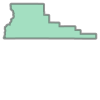

In [1069]:
polygon = pba.to_crs(4326).iloc[0]
polygon

In [1070]:
# Import school
tags = {'amenity': 'school'}
scl = ox.geometries_from_polygon(polygon, tags)
#scl[['amenity', 'name', 'geometry']]

In [1071]:
# set the co-ordinate system first
scl = scl.set_crs("EPSG:4326")
# Let's take a copy of our layer
scl_proj = scl.copy()

# Reproject the geometries by replacing the values with projected ones
scl_proj =scl_proj.to_crs(epsg=2839)
scl_proj.head(5)
scl_proj['geometry']=scl_proj['geometry'].centroid
buffer_clip_scl = gpd.clip(scl_proj, gdf1)
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
output_school=inter_scl.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_school.columns=["osm_id","School"]
output_school.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  School
0  5369733.0       2
1  5369877.0       4
2  5371320.0       2
3  5372140.0       3
4  5372768.0       3

# Closest distance to school

In [1072]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1073]:
ecoshort['min_dist_to_school'] = ecoshort.geometry.apply(min_distance_ppoly, args=(scl_proj,))*3.28084
output_school_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_school"]]
output_school_distance.columns=["osm_id","min_dist_to_school"]
output_school_distance.head()

osm_id  min_dist_to_school
0  48381206.0         1836.231483
1   5369877.0         1839.981365
2  49105950.0         1671.767045
3  46094523.0         2062.855533
4  46094520.0         2917.732762

In [1074]:
# Import college
tags = {'amenity': 'college'}
coll = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
coll = coll.set_crs("EPSG:4326")
# Let's take a copy of our layer
coll_proj = coll.copy()

# Reproject the geometries by replacing the values with projected ones
coll_proj =coll_proj.to_crs(epsg=2839)
coll_proj['geometry']=coll_proj['geometry'].centroid
buffer_clip_coll = gpd.clip(coll_proj, gdf1)
inter_coll=gpd.overlay(gdf1, buffer_clip_coll, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1075]:
output_college=inter_coll.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_college.columns=["osm_id","college"]
output_college.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  college
0    5369529.0        1
1  135232314.0        1

# Closest distance to college

In [1076]:
ecoshort['min_dist_to_college'] = ecoshort.geometry.apply(min_distance_ppoly, args=(coll_proj,))*3.28084
output_college_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_college"]]
output_college_distance.columns=["osm_id","min_dist_to_college"]
output_college_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_college
0  48381206.0         10520.590150
1   5369877.0         11794.261428
2  49105950.0          8150.297244
3  46094523.0          9487.250630
4  46094520.0         10342.951024

In [1077]:
# Import college
tags = {'amenity': 'university'}
uni = ox.geometries_from_polygon(polygon, tags)
# set the co-ordinate system first
uni = uni.set_crs("EPSG:4326")
# Let's take a copy of our layer
uni_proj = uni.copy()

# Reproject the geometries by replacing the values with projected ones
uni_proj =uni_proj.to_crs(epsg=2839)
uni_proj['geometry']=uni_proj['geometry'].centroid
buffer_clip_uni = gpd.clip(uni_proj, gdf1)
inter_uni=gpd.overlay(gdf1, buffer_clip_uni, how='intersection', make_valid=True, keep_geom_type=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1078]:
output_university=inter_uni.groupby(by=['osm_id_sensor'])['geometry'].count().reset_index()
output_university.loc[output_university['geometry'] > 0, 'geometry'] = 1
output_university.loc[output_university['geometry'] ==0, 'geometry'] = 0
output_university.columns=["osm_id","University"]
output_university.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  University
0    5375454.0           1
1   48332549.0           1
2   48381198.0           1
3   48381206.0           1
4  142063142.0           1

# Closest distance to university

In [1079]:
ecoshort['min_dist_to_university'] = ecoshort.geometry.apply(min_distance_ppoly, args=(uni_proj,))*3.28084
output_university_distance=ecoshort.loc[:,["osm_id_sensor","min_dist_to_university"]]
output_university_distance.columns=["osm_id","min_dist_to_university"]
output_university_distance.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  min_dist_to_university
0  48381206.0             2387.326197
1   5369877.0             5773.809117
2  49105950.0             4506.877508
3  46094523.0             6656.861545
4  46094520.0             8005.030293

# Calculate OSM_node_ density

In [1080]:
# lets bring the road shape file node to calculate the intersection density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


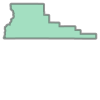

In [1081]:
# convert to unprojected polygon for osmnx data pull
polygon = pba.to_crs(4326).iloc[0]
polygon

In [1082]:
#!pip install networkx
#!pip install osmnx
import networkx as nx
import osmnx as ox
ox.config(log_file=True,log_console=True,use_cache=True)
#place="Portland,USA"
#Construct the street network
G=ox.graph_from_polygon(polygon,network_type="drive",simplify=False)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(G,node_color='yellow',edge_color='blue')

In [1083]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head(5)

y           x  street_count  ref highway  \
osmid                                                        
38177652  43.713255 -121.795495             2  NaN     NaN   
38177653  43.715197 -121.795568             2  NaN     NaN   
38177656  43.716527 -121.795625             2  NaN     NaN   
38177660  43.717124 -121.795647             2  NaN     NaN   
38177665  43.723374 -121.795905             2  NaN     NaN   

                             geometry  
osmid                                  
38177652  POINT (-121.79549 43.71325)  
38177653  POINT (-121.79557 43.71520)  
38177656  POINT (-121.79563 43.71653)  
38177660  POINT (-121.79565 43.71712)  
38177665  POINT (-121.79591 43.72337)

In [1084]:
print(nodes.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1085]:
# set the co-ordinate system first
node = nodes.set_crs("EPSG:4326")
# Let's take a copy of our layer
node_proj = node.copy()

# Reproject the geometries by replacing the values with projected ones
node_proj = node_proj.to_crs(epsg=2839)
node_proj.head(5)

y           x  street_count  ref highway  \
osmid                                                        
38177652  43.713255 -121.795495             2  NaN     NaN   
38177653  43.715197 -121.795568             2  NaN     NaN   
38177656  43.716527 -121.795625             2  NaN     NaN   
38177660  43.717124 -121.795647             2  NaN     NaN   
38177665  43.723374 -121.795905             2  NaN     NaN   

                                geometry  
osmid                                     
38177652  POINT (1395605.758 228151.446)  
38177653  POINT (1395603.223 228367.323)  
38177656  POINT (1395600.875 228515.129)  
38177660  POINT (1395600.104 228581.453)  
38177665  POINT (1395590.061 229276.090)

In [1086]:
# Clip the data using GeoPandas clip
buffer_clip_node = gpd.clip(node_proj, gdf1)
buffer_clip_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


y           x  street_count  ref highway  \
osmid                                                        
38198880  43.981380 -121.809118             3  NaN     NaN   
38198973  43.980951 -121.807946             2  NaN     NaN   
38198976  43.980676 -121.807189             2  NaN     NaN   
38198979  43.980326 -121.806538             3  NaN     NaN   
38198982  43.980410 -121.805904             2  NaN     NaN   

                                geometry  
osmid                                     
38198880  POINT (1394973.677 257954.992)  
38198973  POINT (1395066.921 257905.962)  
38198976  POINT (1395127.212 257874.461)  
38198979  POINT (1395178.862 257834.717)  
38198982  POINT (1395229.845 257843.290)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


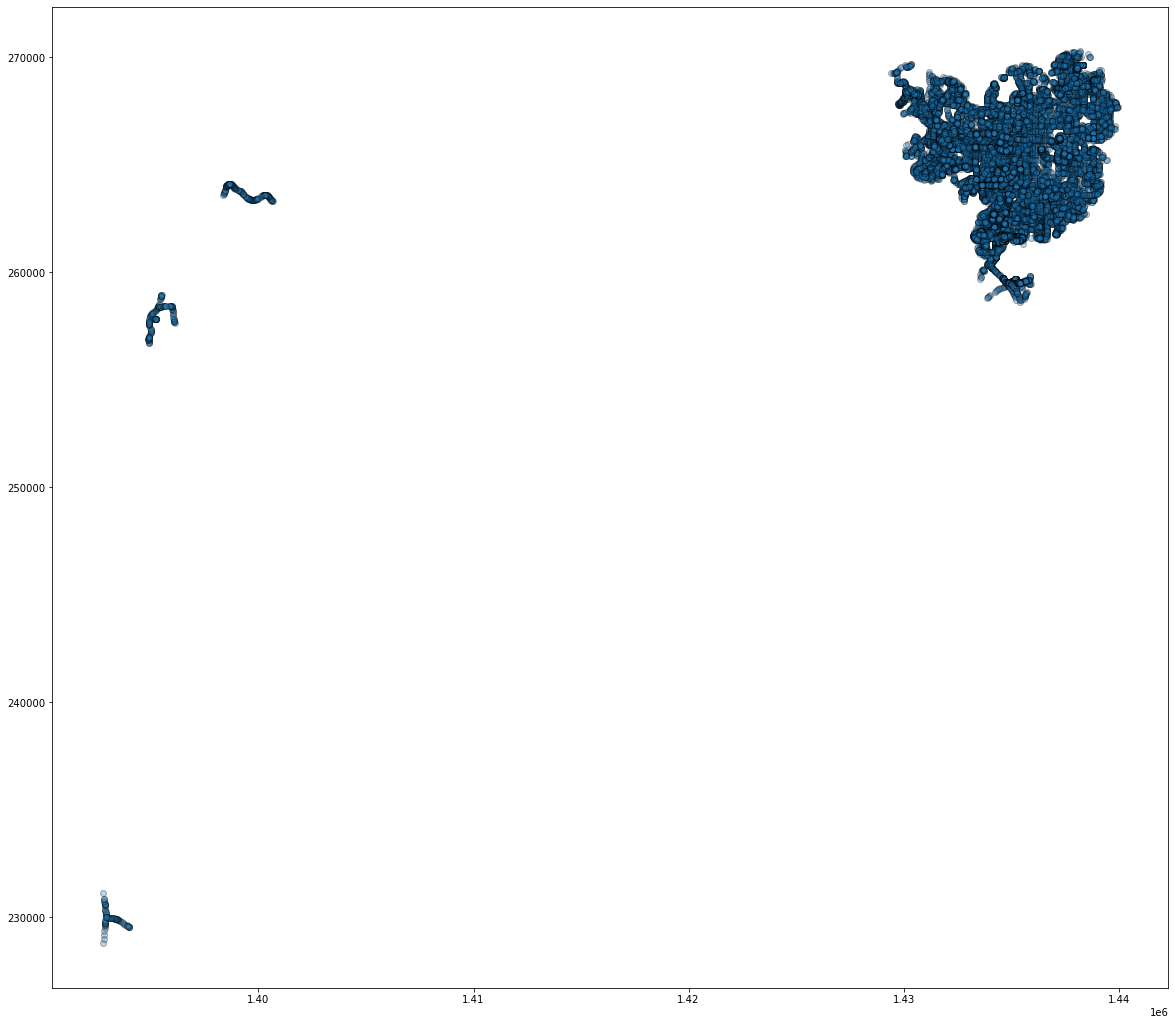

In [1087]:
ax = buffer_clip_node.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1088]:
 inter_node=gpd.overlay(gdf1, buffer_clip_node, how='intersection', make_valid=True, keep_geom_type=False)
 inter_node.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
2  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
3  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
4  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   

   year region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  2019   Bend             2.0   46.209524   6.561644   2.616438   3189.0   
1  2019   Bend             3.0   12.072595   5.178082   1.123288   2909.0   
2  2019   Bend             3.0  130.236548  16.890411   3.219178   1049.0   
3  2019   Bend             3.0  185.863877   5.671233   2.315068    769.0   
4  2019   Bend             3.0   34.690606   3.849315   1.178082   2218.0   

    latitude   longitude                 comment  osm_id_sensor          y  \
0  44.050292 -121.319863                     NaN     48381206.0  44.039806   
1  44.039807 -121.314176  also other side 732753    438346301.0  44.039806   
2  44.040826 -121.326954  also other side 367302     48332549.0  44.039806   
3  44.050261 -121.319990                     NaN    432213408.0  44.039806   
4  44.043816 -121.323557                     NaN    239383101.0  44.039806   

            x  street_count  ref highway                        geometry  
0 -121.322113             3  NaN     NaN  POINT (1434107.056 263949.456)  
1 -121.322113             3  NaN     NaN  POINT (1434107.056 263949.456)  
2 -121.322113             3  NaN     NaN  POINT (1434107.056 263949.456)  
3 -121.322113             3  NaN     NaN  POINT (1434107.056 263949.456)  
4 -121.322113             3  NaN     NaN  POINT (1434107.056 263949.456)

Intersection density per mile2

In [1089]:
output_intersection_density= inter_node.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_density.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor
5369529.0     621.908805
5369733.0     913.340137
5369877.0    1005.579569
5371320.0     756.023806
5372140.0     808.085326
Name: geometry, dtype: float64

In [1090]:
output_intersection_density1=output_intersection_density.reset_index()
output_intersection_density1.columns=["osm_id","OSM_node_Density"]
output_intersection_density1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  OSM_node_Density
0  5369529.0        621.908805
1  5369733.0        913.340137
2  5369877.0       1005.579569
3  5371320.0        756.023806
4  5372140.0        808.085326

# Calculate the intersection density

In [1091]:
custom_filter = ox.downloader._get_osm_filter("drive")
custom_filter += '["highway"!~"motor"]'  # filter out freeways
Ga = ox.graph_from_polygon(polygon, custom_filter=custom_filter, simplify=True)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1092]:
nodesa, edgesa = ox.graph_to_gdfs(Ga)
# set the co-ordinate system first
nodea = nodesa.set_crs("EPSG:4326")
# Let's take a copy of our layer
nodea_proj = nodea.copy()

In [1093]:
# Reproject the geometries by replacing the values with projected ones
nodea_proj = nodea_proj.to_crs(epsg=2839)
buffer_clip_nodea = gpd.clip(nodea_proj, gdf1)
inter_nodea=gpd.overlay(gdf1, buffer_clip_nodea, how='intersection', make_valid=True, keep_geom_type=False)
outputa_intersection_density= inter_nodea.groupby(by=['osm_id_sensor'])['geometry'].count()/(3.1416*size*size*3.861e-07)
output_intersection_densitya=outputa_intersection_density.reset_index()
output_intersection_densitya.columns=["osm_id","Intersection_Density"]
output_intersection_densitya.head()

osm_id  Intersection_Density
0  5369529.0            105.820697
1  5369733.0            177.122344
2  5369877.0            210.509623
3  5371320.0            185.610635
4  5372140.0            199.191901

# Calculate the Number of Lanes

In [1094]:
edges.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref       highway  oneway   length  \
u        v          key                                                      
38177652 38177653   0    364437102  NF 4280  unclassified   False  216.076   
         3684843695 0    364437102  NF 4280  unclassified   False   55.844   
38177653 38177656   0    364437102  NF 4280  unclassified   False  147.951   
         38177652   0    364437102  NF 4280  unclassified   False  216.076   
38177656 38177660   0    364437102  NF 4280  unclassified   False   66.385   

                        lanes name maxspeed access bridge junction  \
u        v          key                                              
38177652 38177653   0     NaN  NaN      NaN    NaN    NaN      NaN   
         3684843695 0     NaN  NaN      NaN    NaN    NaN      NaN   
38177653 38177656   0     NaN  NaN      NaN    NaN    NaN      NaN   
         38177652   0     NaN  NaN      NaN    NaN    NaN      NaN   
38177656 38177660   0     NaN  NaN      NaN    NaN    NaN      NaN   

                                                                  geometry  
u        v          key                                                     
38177652 38177653   0    LINESTRING (-121.79549 43.71325, -121.79557 43...  
         3684843695 0    LINESTRING (-121.79549 43.71325, -121.79549 43...  
38177653 38177656   0    LINESTRING (-121.79557 43.71520, -121.79563 43...  
         38177652   0    LINESTRING (-121.79557 43.71520, -121.79549 43...  
38177656 38177660   0    LINESTRING (-121.79563 43.71653, -121.79565 43...

In [1095]:
print(edges.crs)

epsg:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1096]:
# set the co-ordinate system first
edge = edges.set_crs("EPSG:4326")
# Let's take a copy of our layer
edge_proj = edge.copy()

# Reproject the geometries by replacing the values with projected ones
edge_proj = edge_proj.to_crs(epsg=2839)
edge_proj.head(5)

osmid      ref       highway  oneway   length  \
u        v          key                                                      
38177652 38177653   0    364437102  NF 4280  unclassified   False  216.076   
         3684843695 0    364437102  NF 4280  unclassified   False   55.844   
38177653 38177656   0    364437102  NF 4280  unclassified   False  147.951   
         38177652   0    364437102  NF 4280  unclassified   False  216.076   
38177656 38177660   0    364437102  NF 4280  unclassified   False   66.385   

                        lanes name maxspeed access bridge junction  \
u        v          key                                              
38177652 38177653   0     NaN  NaN      NaN    NaN    NaN      NaN   
         3684843695 0     NaN  NaN      NaN    NaN    NaN      NaN   
38177653 38177656   0     NaN  NaN      NaN    NaN    NaN      NaN   
         38177652   0     NaN  NaN      NaN    NaN    NaN      NaN   
38177656 38177660   0     NaN  NaN      NaN    NaN    NaN      NaN   

                                                                  geometry  
u        v          key                                                     
38177652 38177653   0    LINESTRING (1395605.758 228151.446, 1395603.22...  
         3684843695 0    LINESTRING (1395605.758 228151.446, 1395605.29...  
38177653 38177656   0    LINESTRING (1395603.223 228367.323, 1395600.87...  
         38177652   0    LINESTRING (1395603.223 228367.323, 1395605.75...  
38177656 38177660   0    LINESTRING (1395600.875 228515.129, 1395600.10...

In [1097]:
# Consider rows without NAN
edge_clean = edge_proj[edge_proj['lanes'].notna()]
edge_clean2 = edge_clean [edge_clean.lanes!=0]
edge_clean2.head(10)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid            ref    highway  oneway   length  \
u        v          key                                                         
38177687 3613756423 0      5372611          CR 46  secondary   False  267.559   
         3611713412 0      5373561          CR 46  secondary   False   27.866   
38180740 3703749385 0    366396675          CR 42  secondary   False   39.356   
         3703749334 0    366396675          CR 42  secondary   False   90.140   
38192055 38521074   0    191142677          US 97    primary   False  148.785   
         3615916719 0    191142677          US 97    primary   False  487.133   
         38229437   0    371946997            NaN   tertiary   False  262.018   
38198880 3626007572 0      5372610  OR 372; CR 46  secondary   False   16.625   
         38511805   0      5372610  OR 372; CR 46  secondary   False   34.091   
38200441 38482658   0      5370610            NaN   tertiary   False   21.017   

                        lanes                           name maxspeed access  \
u        v          key                                                        
38177687 3613756423 0       2          Cascade Lakes Highway      NaN    NaN   
         3611713412 0       2          Cascade Lakes Highway      NaN    NaN   
38180740 3703749385 0       2            South Century Drive      NaN    NaN   
         3703749334 0       2            South Century Drive      NaN    NaN   
38192055 38521074   0       2  The Dalles-California Highway      NaN    NaN   
         3615916719 0       2  The Dalles-California Highway      NaN    NaN   
         38229437   0       2                     6th Street      NaN    NaN   
38198880 3626007572 0       2          Cascade Lakes Highway      NaN    NaN   
         38511805   0       2          Cascade Lakes Highway      NaN    NaN   
38200441 38482658   0       2              Finley Butte Road      NaN    NaN   

                        bridge junction  \
u        v          key                   
38177687 3613756423 0      NaN      NaN   
         3611713412 0      NaN      NaN   
38180740 3703749385 0      NaN      NaN   
         3703749334 0      NaN      NaN   
38192055 38521074   0      NaN      NaN   
         3615916719 0      NaN      NaN   
         38229437   0      NaN      NaN   
38198880 3626007572 0      NaN      NaN   
         38511805   0      NaN      NaN   
38200441 38482658   0      NaN      NaN   

                                                                  geometry  
u        v          key                                                     
38177687 3613756423 0    LINESTRING (1392779.394 225260.612, 1392753.49...  
         3611713412 0    LINESTRING (1392779.394 225260.612, 1392782.10...  
38180740 3703749385 0    LINESTRING (1417956.165 238825.068, 1417992.14...  
         3703749334 0    LINESTRING (1417956.165 238825.068, 1417873.74...  
38192055 38521074   0    LINESTRING (1418755.038 222569.092, 1418831.79...  
         3615916719 0    LINESTRING (1418755.038 222569.092, 1418503.03...  
         38229437   0    LINESTRING (1418755.038 222569.092, 1418531.15...  
38198880 3626007572 0    LINESTRING (1394973.677 257954.992, 1394978.97...  
         38511805   0    LINESTRING (1394973.677 257954.992, 1394963.32...  
38200441 38482658   0    LINESTRING (1419124.536 222733.439, 1419103.46...

In [1098]:
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'lanes']

ecoshort['lanes'] = ecoshort.geometry.apply(nearest_linestring, df_lines=edge_clean2)
ecoshort
ecoshort_lane=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1099]:
ecoshort_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  \
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)   
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)   
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)   
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)   
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)   

   min_dist_to_school  min_dist_to_college  min_dist_to_university lanes  
0         1836.231483         10520.590150             2387.326197     2  
1         1839.981365         11794.261428             5773.809117     2  
2         1671.767045          8150.297244             4506.877508     1  
3         2062.855533          9487.250630             6656.861545     2  
4         2917.732762         10342.951024             8005.030293     2

In [1100]:
output_lane=ecoshort_lane.loc[:,['osm_id_sensor','lanes']]
output_lane.columns=['osm_id','lanes']
output_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id lanes
0  48381206.0     2
1   5369877.0     2
2  49105950.0     1
3  46094523.0     2
4  46094520.0     2

# Calculate the cycleway-left, cycleway-right and cycleway from OSM bike Network within the buffer

In [1101]:
# This is osmnx's default OSM tag set for links
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction']


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1102]:
### Modify run params here ###
extra_way_tags = ['cycleway', 'cycleway:left', 'cycleway:right']  # add'l OSM tags to keep

In [1103]:
# Can add any OSM tag--will be populated if available
useful_tags = ox.settings.useful_tags_way + extra_way_tags
ox.config(use_cache=True, log_console=True, useful_tags_way=useful_tags)
print(ox.settings.useful_tags_way)

['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed', 'service', 'access', 'area', 'landuse', 'width', 'est_width', 'junction', 'cycleway', 'cycleway:left', 'cycleway:right']


In [1104]:
Gc=ox.graph_from_polygon(polygon, network_type='bike',simplify=False)
#G = gpd.clip(G, pba)
#G_projected=ox.project_graph(G)
#fig, ax = ox.plot_graph(Gc,node_color='yellow',edge_color='blue')

In [1105]:
nodesc, edgesc = ox.graph_to_gdfs(Gc)
edgesc.head(5)

osmid      ref  \
u        v          key                       
38177601 3684843106 0    364437092   NF 700   
         38569752   0    364437092   NF 700   
38177619 38508401   0      5372278   NF 140   
         3684843205 0      5372278   NF 140   
38177652 38177653   0    364437102  NF 4280   

                                                              name  \
u        v          key                                              
38177601 3684843106 0    National Forest Development Road 4280-700   
         38569752   0    National Forest Development Road 4280-700   
38177619 38508401   0    National Forest Development Road 4280-140   
         3684843205 0    National Forest Development Road 4280-140   
38177652 38177653   0                                          NaN   

                              highway  oneway   length lanes maxspeed bridge  \
u        v          key                                                        
38177601 3684843106 0           track   False  139.110   NaN      NaN    NaN   
         38569752   0           track   False  158.341   NaN      NaN    NaN   
38177619 38508401   0           track   False   49.645   NaN      NaN    NaN   
         3684843205 0           track   False  118.563   NaN      NaN    NaN   
38177652 38177653   0    unclassified   False  216.076   NaN      NaN    NaN   

                        service access cycleway width tunnel junction  \
u        v          key                                                 
38177601 3684843106 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38569752   0       NaN    NaN      NaN   NaN    NaN      NaN   
38177619 38508401   0       NaN    NaN      NaN   NaN    NaN      NaN   
         3684843205 0       NaN    NaN      NaN   NaN    NaN      NaN   
38177652 38177653   0       NaN    NaN      NaN   NaN    NaN      NaN   

                        cycleway:right cycleway:left area  \
u        v          key                                     
38177601 3684843106 0              NaN           NaN  NaN   
         38569752   0              NaN           NaN  NaN   
38177619 38508401   0              NaN           NaN  NaN   
         3684843205 0              NaN           NaN  NaN   
38177652 38177653   0              NaN           NaN  NaN   

                                                                  geometry  
u        v          key                                                     
38177601 3684843106 0    LINESTRING (-121.80278 43.70505, -121.80418 43...  
         38569752   0    LINESTRING (-121.80278 43.70505, -121.80121 43...  
38177619 38508401   0    LINESTRING (-121.79997 43.70652, -121.79996 43...  
         3684843205 0    LINESTRING (-121.79997 43.70652, -121.79999 43...  
38177652 38177653   0    LINESTRING (-121.79549 43.71325, -121.79557 43...

In [1106]:
# set the co-ordinate system first
edgesc = edgesc.set_crs("EPSG:4326")
# Let's take a copy of our layer
cycleway_proj = edgesc.copy()

# Reproject the geometries by replacing the values with projected ones
cycleway_proj = cycleway_proj.to_crs(epsg=2839)
cycleway_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid      ref  \
u        v          key                       
38177601 3684843106 0    364437092   NF 700   
         38569752   0    364437092   NF 700   
38177619 38508401   0      5372278   NF 140   
         3684843205 0      5372278   NF 140   
38177652 38177653   0    364437102  NF 4280   

                                                              name  \
u        v          key                                              
38177601 3684843106 0    National Forest Development Road 4280-700   
         38569752   0    National Forest Development Road 4280-700   
38177619 38508401   0    National Forest Development Road 4280-140   
         3684843205 0    National Forest Development Road 4280-140   
38177652 38177653   0                                          NaN   

                              highway  oneway   length lanes maxspeed bridge  \
u        v          key                                                        
38177601 3684843106 0           track   False  139.110   NaN      NaN    NaN   
         38569752   0           track   False  158.341   NaN      NaN    NaN   
38177619 38508401   0           track   False   49.645   NaN      NaN    NaN   
         3684843205 0           track   False  118.563   NaN      NaN    NaN   
38177652 38177653   0    unclassified   False  216.076   NaN      NaN    NaN   

                        service access cycleway width tunnel junction  \
u        v          key                                                 
38177601 3684843106 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38569752   0       NaN    NaN      NaN   NaN    NaN      NaN   
38177619 38508401   0       NaN    NaN      NaN   NaN    NaN      NaN   
         3684843205 0       NaN    NaN      NaN   NaN    NaN      NaN   
38177652 38177653   0       NaN    NaN      NaN   NaN    NaN      NaN   

                        cycleway:right cycleway:left area  \
u        v          key                                     
38177601 3684843106 0              NaN           NaN  NaN   
         38569752   0              NaN           NaN  NaN   
38177619 38508401   0              NaN           NaN  NaN   
         3684843205 0              NaN           NaN  NaN   
38177652 38177653   0              NaN           NaN  NaN   

                                                                  geometry  
u        v          key                                                     
38177601 3684843106 0    LINESTRING (1395004.850 227249.618, 1394892.65...  
         38569752   0    LINESTRING (1395004.850 227249.618, 1395129.70...  
38177619 38508401   0    LINESTRING (1395233.285 227409.205, 1395233.88...  
         3684843205 0    LINESTRING (1395233.285 227409.205, 1395233.84...  
38177652 38177653   0    LINESTRING (1395605.758 228151.446, 1395603.22...

In [1107]:
# Clip the data using GeoPandas clip
buffer_clip_cycleway = gpd.clip(cycleway_proj, gdf1)
buffer_clip_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid            ref  \
u        v          key                           
38198880 2159777163 0    5348016         NF 471   
         38198973   0    5348043            NaN   
         3626007572 0    5372610  OR 372; CR 46   
         38511805   0    5372610  OR 372; CR 46   
38198883 2477883021 0    5348016         NF 471   

                                                              name  \
u        v          key                                              
38198880 2159777163 0    National Forest Development Road 4600-471   
         38198973   0                               Elk Lake Lodge   
         3626007572 0                        Cascade Lakes Highway   
         38511805   0                        Cascade Lakes Highway   
38198883 2477883021 0    National Forest Development Road 4600-471   

                              highway  oneway   length lanes maxspeed bridge  \
u        v          key                                                        
38198880 2159777163 0         service   False   44.558   NaN      NaN    NaN   
         38198973   0    unclassified   False  105.136   NaN      NaN    NaN   
         3626007572 0       secondary   False   16.625     2      NaN    NaN   
         38511805   0       secondary   False   34.091     2      NaN    NaN   
38198883 2477883021 0         service   False   20.772   NaN      NaN    NaN   

                        service access cycleway width tunnel junction  \
u        v          key                                                 
38198880 2159777163 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38198973   0       NaN    NaN      NaN   NaN    NaN      NaN   
         3626007572 0       NaN    NaN      NaN   NaN    NaN      NaN   
         38511805   0       NaN    NaN      NaN   NaN    NaN      NaN   
38198883 2477883021 0       NaN    NaN      NaN   NaN    NaN      NaN   

                        cycleway:right cycleway:left area  \
u        v          key                                     
38198880 2159777163 0              NaN           NaN  NaN   
         38198973   0              NaN           NaN  NaN   
         3626007572 0              NaN           NaN  NaN   
         38511805   0              NaN           NaN  NaN   
38198883 2477883021 0              NaN           NaN  NaN   

                                                                  geometry  
u        v          key                                                     
38198880 2159777163 0    LINESTRING (1394973.677 257954.992, 1394931.21...  
         38198973   0    LINESTRING (1394973.677 257954.992, 1395066.92...  
         3626007572 0    LINESTRING (1394973.677 257954.992, 1394978.97...  
         38511805   0    LINESTRING (1394973.677 257954.992, 1394963.32...  
38198883 2477883021 0    LINESTRING (1394913.401 258010.419, 1394913.61...

In [1108]:
 inter_cycleway=gpd.overlay(gdf1, buffer_clip_cycleway, how='intersection', make_valid=True, keep_geom_type=False)
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
2  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
3  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
4  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   

   year region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  2019   Bend             2.0   46.209524   6.561644   2.616438   3189.0   
1  2019   Bend             3.0   12.072595   5.178082   1.123288   2909.0   
2  2019   Bend             3.0  130.236548  16.890411   3.219178   1049.0   
3  2019   Bend             3.0  185.863877   5.671233   2.315068    769.0   
4  2019   Bend             3.0   34.690606   3.849315   1.178082   2218.0   

   ...  service  access cycleway  width  tunnel junction cycleway:right  \
0  ...      NaN     NaN      NaN    NaN     NaN      NaN            NaN   
1  ...      NaN     NaN      NaN    NaN     NaN      NaN            NaN   
2  ...      NaN     NaN      NaN    NaN     NaN      NaN            NaN   
3  ...      NaN     NaN      NaN    NaN     NaN      NaN            NaN   
4  ...      NaN     NaN      NaN    NaN     NaN      NaN            NaN   

  cycleway:left  area                                           geometry  
0           NaN   NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  
1           NaN   NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  
2           NaN   NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  
3           NaN   NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  
4           NaN   NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  

[5 rows x 33 columns]

In [1109]:
 inter_cycleway["Length"]= inter_cycleway["geometry"].length*3.28084 # in ft
 inter_cycleway.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
2  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
3  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
4  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   

   year region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  2019   Bend             2.0   46.209524   6.561644   2.616438   3189.0   
1  2019   Bend             3.0   12.072595   5.178082   1.123288   2909.0   
2  2019   Bend             3.0  130.236548  16.890411   3.219178   1049.0   
3  2019   Bend             3.0  185.863877   5.671233   2.315068    769.0   
4  2019   Bend             3.0   34.690606   3.849315   1.178082   2218.0   

   ...  access  cycleway width  tunnel  junction cycleway:right cycleway:left  \
0  ...     NaN       NaN   NaN     NaN       NaN            NaN           NaN   
1  ...     NaN       NaN   NaN     NaN       NaN            NaN           NaN   
2  ...     NaN       NaN   NaN     NaN       NaN            NaN           NaN   
3  ...     NaN       NaN   NaN     NaN       NaN            NaN           NaN   
4  ...     NaN       NaN   NaN     NaN       NaN            NaN           NaN   

  area                                           geometry     Length  
0  NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  17.929142  
1  NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  17.929142  
2  NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  17.929142  
3  NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  17.929142  
4  NaN  LINESTRING (1434107.056 263949.456, 1434108.85...  17.929142  

[5 rows x 34 columns]

In [1110]:
# Calculate the cycleway left, right and lane length within the buffer
bike_left=inter_cycleway[inter_cycleway['cycleway:left']=='lane']
bike_right=inter_cycleway[inter_cycleway['cycleway:right']=='lane']
bikeway_lane= inter_cycleway[inter_cycleway['cycleway']=='lane']
bikeway_all_lane=pd.concat([bike_left,bike_right,bikeway_lane],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_lane=bikeway_all_lane.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_lane.columns=["osm_id","cycleway_lane_all"]
output_bikeway_all_lane.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_all
0  5369529.0       20575.609162
1  5369733.0       61955.085474
2  5369877.0       44264.885397
3  5371320.0       17543.197025
4  5372140.0       42197.285632

In [1111]:
cycleway_lane0= cycleway_proj[cycleway_proj['cycleway']=='lane']
cycleway_lane01= cycleway_proj[cycleway_proj['cycleway:left']=='lane']
cycleway_lane011= cycleway_proj[cycleway_proj['cycleway:right']=='lane']
cycleway_lane=pd.concat([cycleway_lane0,cycleway_lane01,cycleway_lane01],axis=0)
cycleway_lane.head()
lane_merged_inner = pd.merge(right=ecoshort, left=cycleway_lane, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_all as binary
output_bikeway_all_lane_binary=lane_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_lane_binary.loc[output_bikeway_all_lane_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_lane_binary.columns=["osm_id","cycleway_lane_binary"]
output_bikeway_all_lane_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  cycleway_lane_binary
0   5373510.0                     1
1   5376418.0                     1
2  48381198.0                     1
3  48381206.0                     1
4  90955476.0                     1

In [1112]:
# Calculate the cycleway left, right amd track all together
bike_left_track=inter_cycleway[inter_cycleway['cycleway:left']=='track']
bike_right_track=inter_cycleway[inter_cycleway['cycleway:right']=='track']
bikeway_track= inter_cycleway[inter_cycleway['cycleway']=='track']
bikeway_all_track=pd.concat([bike_left_track,bike_right_track,bikeway_track],axis=0)
#ike_left= inter_cycleway[inter_cycleway['type'].str.contains('cycleway:left')]
output_bikeway_all_track=bikeway_all_track.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_bikeway_all_track.columns=["osm_id","cycleway_track_all"]
output_bikeway_all_track.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all]
Index: []

In [1113]:
cycleway_track0= cycleway_proj[cycleway_proj['cycleway:left']=='track']
cycleway_track01= cycleway_proj[cycleway_proj['cycleway:right']=='track']
cycleway_track011= cycleway_proj[cycleway_proj['cycleway']=='track']
cycleway_track1=pd.concat([cycleway_track0,cycleway_track01,cycleway_track011],axis=0)
cycleway_track1.head()
track_merged_inner = pd.merge(right=ecoshort, left=cycleway_track1, left_on='osmid', right_on='osm_id_sensor',how='inner')
# Convert output_bikeway_track all as binary
output_bikeway_all_track_binary=track_merged_inner.groupby(by=['osm_id_sensor'])['osmid'].count().reset_index()
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] > 0, 'osmid'] = 1
output_bikeway_all_track_binary.loc[output_bikeway_all_track_binary['osmid'] ==0, 'osmid'] = 0
output_bikeway_all_track_binary.columns=["osm_id","cycleway_track_all_binary"]
output_bikeway_all_track_binary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [osm_id, cycleway_track_all_binary]
Index: []

# OSM Functional System Programming

In [1114]:
#road = gpd.read_file("../input/osm-data/roads.shp")
road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (-120.67406 45.08371, -120.67396 45...  
1  LINESTRING (-120.65745 45.08499, -120.65824 45...  
2  LINESTRING (-120.62261 45.10516, -120.62300 45...  
3  LINESTRING (-120.66596 45.11290, -120.66448 45...  
4  LINESTRING (-120.68313 45.10710, -120.68359 45...

In [1115]:
print(road.crs)

EPSG:4326


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1116]:
# set the co-ordinate system first
#road = road.set_crs("EPSG:4326")

In [1117]:
# Let's take a copy of our layer
road_proj = road.copy()

# Reproject the geometries by replacing the values with projected ones
road_proj = road_proj.to_crs(epsg=2839)
road_proj.head(5)

osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1  LINESTRING (1487599.361 379805.264, 1487537.25...  
2  LINESTRING (1490346.700 382043.724, 1490316.27...  
3  LINESTRING (1486935.053 382909.741, 1487051.82...  
4  LINESTRING (1485581.710 382268.513, 1485545.51...

In [1118]:
#road_proj.plot()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

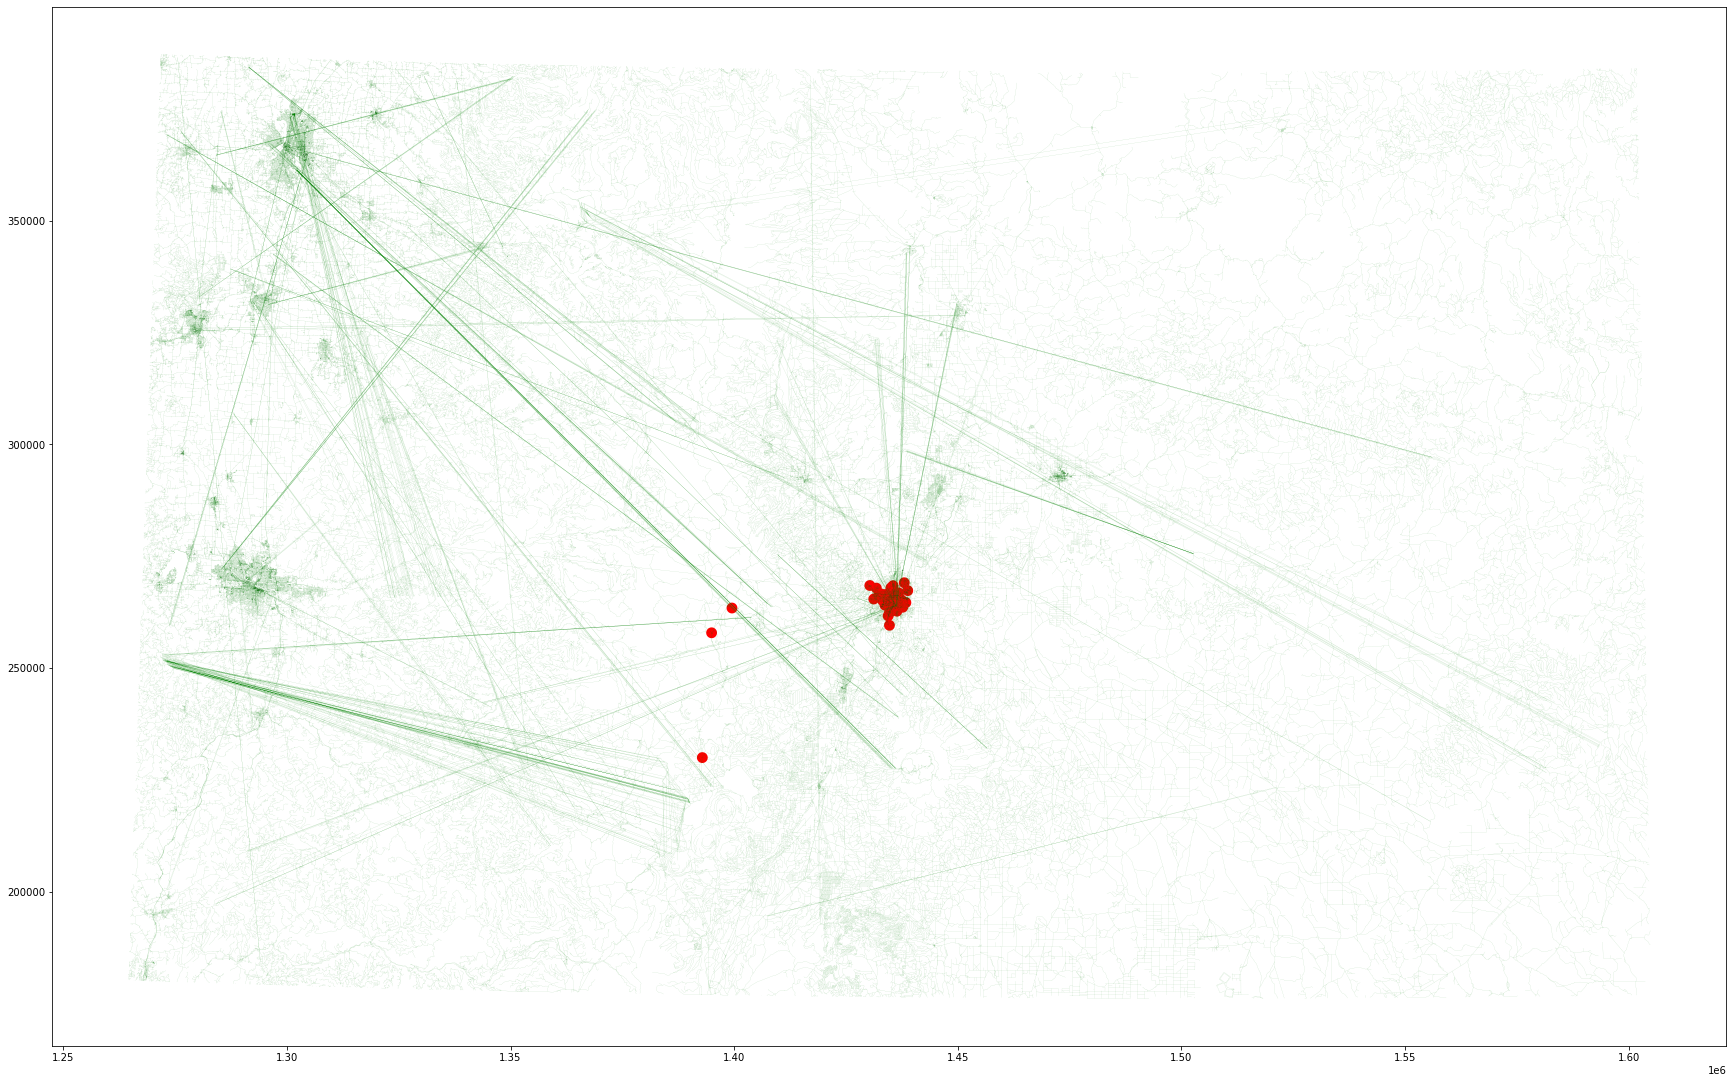

In [1119]:
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="red")
road_proj.plot(color="green",edgecolor='k',linewidth = 0.05,ax=ax) #Use your second dataframe

#Clip road file with buffer file

In [1120]:
# Clip the data using GeoPandas clip
buffer_clip_road = gpd.clip(road_proj, gdf1)
buffer_clip_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                     name   ref         type  oneway  bridge  \
9847  5345897  Northwest Horizon Drive  None  residential       0       0   
9855  5345938         Alderwood Circle  None  residential       0       0   
9857  5345944         Alderwood Circle  None  residential       0       0   
9866  5345982            Hamilton Lane  None  residential       0       0   
9875  5346007               Flint Lane  None  residential       0       0   

      maxspeed                                           geometry  
9847      25.0  LINESTRING (1432016.221 268067.952, 1432039.67...  
9855      25.0  LINESTRING (1434107.056 263949.456, 1434108.85...  
9857      25.0  LINESTRING (1433687.916 263823.185, 1433689.68...  
9866      25.0  LINESTRING (1434670.621 261685.977, 1434671.70...  
9875      25.0  LINESTRING (1433601.062 260980.710, 1433576.43...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


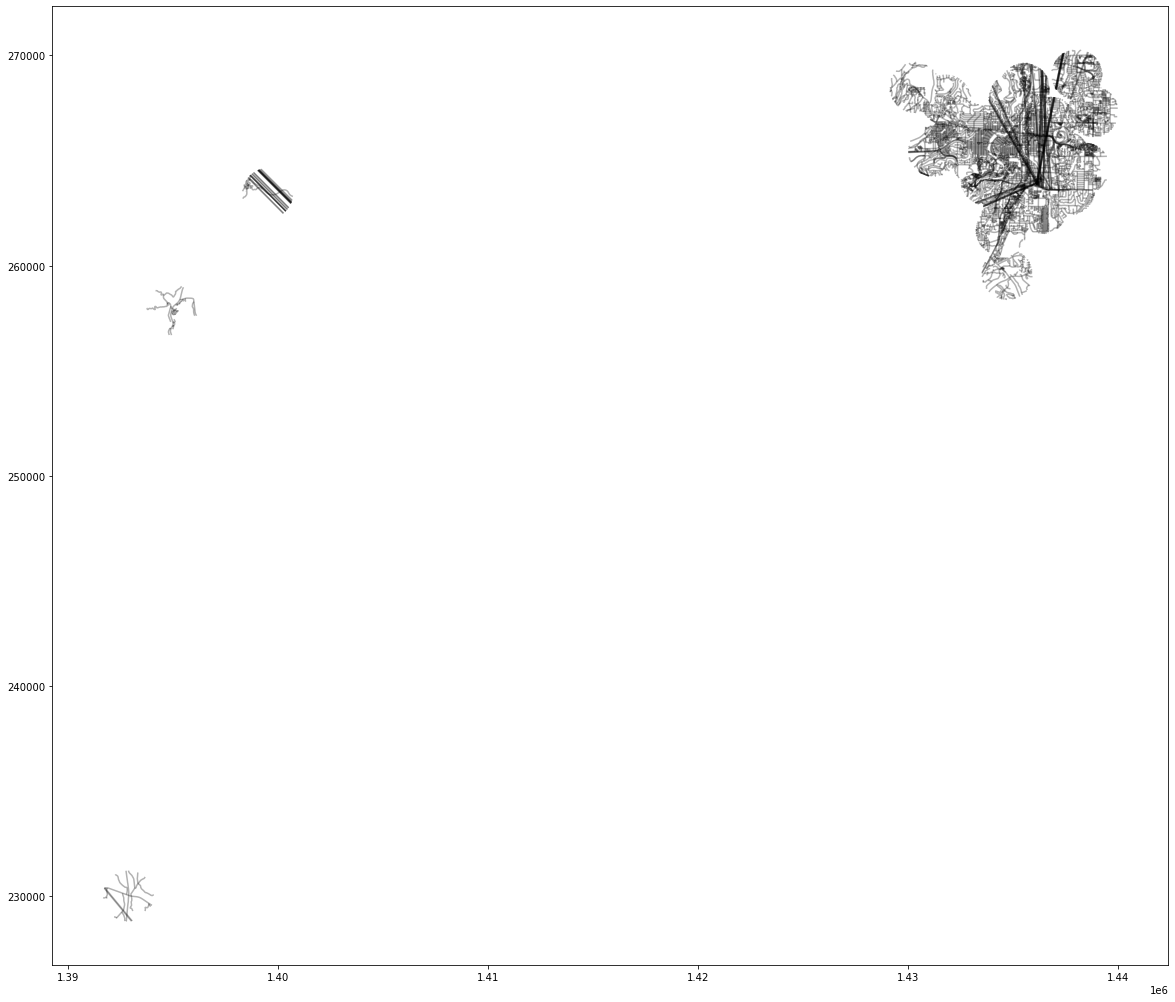

In [1121]:
ax = buffer_clip_road.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

# Intersect

In [1122]:
 inter_road=gpd.overlay(gdf1, buffer_clip_road, how='intersection', make_valid=True, keep_geom_type=False)
 inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
2  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
3  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
4  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   

   year region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  2019   Bend             2.0   46.209524   6.561644   2.616438   3189.0   
1  2019   Bend             3.0   12.072595   5.178082   1.123288   2909.0   
2  2019   Bend             3.0  130.236548  16.890411   3.219178   1049.0   
3  2019   Bend             3.0  185.863877   5.671233   2.315068    769.0   
4  2019   Bend             3.0   34.690606   3.849315   1.178082   2218.0   

   ...                 comment  osm_id_sensor   osm_id              name  \
0  ...                     NaN     48381206.0  5345938  Alderwood Circle   
1  ...  also other side 732753    438346301.0  5345938  Alderwood Circle   
2  ...  also other side 367302     48332549.0  5345938  Alderwood Circle   
3  ...                     NaN    432213408.0  5345938  Alderwood Circle   
4  ...                     NaN    239383101.0  5345938  Alderwood Circle   

    ref         type oneway bridge  maxspeed  \
0  None  residential      0      0      25.0   
1  None  residential      0      0      25.0   
2  None  residential      0      0      25.0   
3  None  residential      0      0      25.0   
4  None  residential      0      0      25.0   

                                            geometry  
0  LINESTRING (1434107.056 263949.456, 1434108.85...  
1  LINESTRING (1434107.056 263949.456, 1434108.85...  
2  LINESTRING (1434107.056 263949.456, 1434108.85...  
3  LINESTRING (1434107.056 263949.456, 1434108.85...  
4  LINESTRING (1434107.056 263949.456, 1434108.85...  

[5 rows x 22 columns]

# Calculate the length of the road segments

In [1123]:
inter_road["Length"]=inter_road["geometry"].length*3.28084 # in ft
inter_road.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
2  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
3  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
4  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   

   year region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  2019   Bend             2.0   46.209524   6.561644   2.616438   3189.0   
1  2019   Bend             3.0   12.072595   5.178082   1.123288   2909.0   
2  2019   Bend             3.0  130.236548  16.890411   3.219178   1049.0   
3  2019   Bend             3.0  185.863877   5.671233   2.315068    769.0   
4  2019   Bend             3.0   34.690606   3.849315   1.178082   2218.0   

   ...  osm_id_sensor   osm_id              name   ref         type oneway  \
0  ...     48381206.0  5345938  Alderwood Circle  None  residential      0   
1  ...    438346301.0  5345938  Alderwood Circle  None  residential      0   
2  ...     48332549.0  5345938  Alderwood Circle  None  residential      0   
3  ...    432213408.0  5345938  Alderwood Circle  None  residential      0   
4  ...    239383101.0  5345938  Alderwood Circle  None  residential      0   

  bridge maxspeed                                           geometry  \
0      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
1      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
2      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
3      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
4      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   

       Length  
0  133.975032  
1  133.975032  
2  133.975032  
3  133.975032  
4  133.975032  

[5 rows x 23 columns]

# Aggregrate the road functional class

In [1124]:
output_roadfc=inter_road.groupby(by=['osm_id_sensor','type'])['Length'].sum()
output_roadfc

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  type        
5369529.0      cycleway          567.775692
               footway          3591.086280
               path            12060.447426
               pedestrian       1178.058698
               residential     91843.935908
                                   ...     
671002846.0    service         18612.512759
               tertiary         9403.813299
               track           17380.908902
               trunk            6663.645962
               unclassified       50.464311
Name: Length, Length: 676, dtype: float64

# Calculate the primary road

In [1125]:
primary= inter_road[inter_road['type'].str.contains('primary')]
output_primary=primary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_primary.columns=["osm_id","Primary"]
output_primary.head()

osm_id       Primary
0  5369733.0   8122.965249
1  5369877.0   9321.490654
2  5372140.0  12957.558903
3  5372797.0  10539.200401
4  5372909.0  10144.226562

In [1126]:
# Calculate secondary
secondary= inter_road[inter_road['type'].str.contains('secondary')]
output_secondary=secondary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_secondary.columns=["osm_id","Secondary"]
output_secondary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Secondary
0  5369529.0  13725.121730
1  5369733.0  27586.306073
2  5369877.0  38363.182911
3  5371320.0  16572.568282
4  5372140.0  39206.655241

In [1127]:
# Calculate tertiary
tertiary= inter_road[inter_road['type'].str.contains('tertiary')]
output_tertiary=tertiary.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_tertiary.columns=["osm_id","Tertiary"]
output_tertiary.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Tertiary
0  5369529.0  14466.071130
1  5369733.0  42518.769395
2  5369877.0  48600.821326
3  5371320.0  18893.369723
4  5372140.0  48451.436202

In [1128]:
# Calculate residential
residential= inter_road[inter_road['type'].str.contains('residential')]
output_residential= residential.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_residential.columns=["osm_id","Residential_Road"]
output_residential.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Residential_Road
0  5369529.0      91843.935908
1  5369733.0     234989.798927
2  5369877.0     129086.784661
3  5371320.0     133174.740186
4  5372140.0     261154.039713

In [1129]:
# Calculate path
path= inter_road[inter_road['type'].str.contains('path')]
output_path= path.groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_path.columns=["osm_id","Path"]
output_path.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id          Path
0  5369529.0  12060.447426
1  5369733.0   1954.768285
2  5369877.0   1096.414781
3  5371320.0   1681.967084
4  5372140.0   2999.425183

In [1130]:
# calculate cycleway
# Calculate path
cycleway = inter_road[inter_road['type'].str.contains('cycleway')]
output_cycleway = cycleway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_cycleway.columns=["osm_id","Cycleway"] 
output_cycleway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id      Cycleway
0  5369529.0    567.775692
1  5369733.0  20584.256767
2  5369877.0  18783.806512
3  5371320.0  10532.030680
4  5372140.0  13656.797098

In [1131]:
# Calculate footway
footway = inter_road[inter_road['type'].str.contains('footway')]
output_footway = footway .groupby(by=['osm_id_sensor'])['Length'].sum().reset_index()
output_footway.columns=["osm_id","Footway"] 
output_footway.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id       Footway
0  5369529.0   3591.086280
1  5369733.0  14399.323292
2  5369877.0  14617.629874
3  5371320.0   9444.983851
4  5372140.0  22311.018745

# Calculcate the mean Speed

In [1132]:
# Exclude NAN and zero value first then take the mean
inter_road.maxspeed.describe()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    12530.000000
mean        25.819633
std          6.602232
min          5.000000
25%         25.000000
50%         25.000000
75%         25.000000
max         65.000000
Name: maxspeed, dtype: float64

In [1133]:
# Consider rows without NAN
inter_road1 = inter_road[inter_road['maxspeed'].notna()]
inter_road1.head(5) 

site_id                                          site_name sensor_type  \
0  P001BEN                                      Colorado Ave.   permanent   
1  S042BEN   ReedMarketBetweenChamberlainandBrookswoodBondRAB  short-term   
2  S043BEN                 ReedMarketBetweenRiverandAlderwood  short-term   
3  S047BEN  Colorado Bridge Undercrossing Trail PARKS EQUI...  short-term   
4  S064BEN    Columbia Ave between Colorado and Shevlin Hixon  short-term   

   year region  travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  2019   Bend             2.0   46.209524   6.561644   2.616438   3189.0   
1  2019   Bend             3.0   12.072595   5.178082   1.123288   2909.0   
2  2019   Bend             3.0  130.236548  16.890411   3.219178   1049.0   
3  2019   Bend             3.0  185.863877   5.671233   2.315068    769.0   
4  2019   Bend             3.0   34.690606   3.849315   1.178082   2218.0   

   ...  osm_id_sensor   osm_id              name   ref         type oneway  \
0  ...     48381206.0  5345938  Alderwood Circle  None  residential      0   
1  ...    438346301.0  5345938  Alderwood Circle  None  residential      0   
2  ...     48332549.0  5345938  Alderwood Circle  None  residential      0   
3  ...    432213408.0  5345938  Alderwood Circle  None  residential      0   
4  ...    239383101.0  5345938  Alderwood Circle  None  residential      0   

  bridge maxspeed                                           geometry  \
0      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
1      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
2      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
3      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   
4      0     25.0  LINESTRING (1434107.056 263949.456, 1434108.85...   

       Length  
0  133.975032  
1  133.975032  
2  133.975032  
3  133.975032  
4  133.975032  

[5 rows x 23 columns]

In [1134]:
road_proj_type11=inter_road1 [inter_road1 ['type']=='primary']                          
road_proj_type22=inter_road1 [inter_road1 ['type']=='secondary']
road_proj_type33=inter_road1[inter_road1 ['type']=='tertiary']
road_proj_type44=inter_road1 [inter_road1 ['type']=='residential']
road_proj_type55=inter_road1 [inter_road1 ['type']=='path']
road_proj_type66=inter_road1 [inter_road1 ['type']=='cycleway']
road_proj_type77=inter_road1 [inter_road1 ['type']=='footway']
road_proj_types=pd.concat([road_proj_type11,road_proj_type22,road_proj_type33,road_proj_type44,road_proj_type55,road_proj_type66,road_proj_type77],axis=0).reset_index()
road_proj_types.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                          site_name sensor_type  year region  \
0  11752  P002BEN           Franklin Ave. Both Sides   permanent  2019   Bend   
1  11753  P004BEN            Newport Ave. Both Sides   permanent  2019   Bend   
2  11754  P005BEN           Portland Ave. Both Sides   permanent  2019   Bend   
3  11755  S003BEN  8thStreetBetweenNortonandMarshall  short-term  2019   Bend   
4  11756  S005BEN            Greenwood Undercrossing  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             2.0  220.426625  6.958904   3.068493  ...      5369877.0   
1             1.0  109.378321  7.027397   2.178082  ...     46094523.0   
2             2.0   61.295238  5.260274   1.698630  ...     46094520.0   
3             2.0   36.047559  2.958904   1.493151  ...    360457476.0   
4             2.0   26.398787  3.821918   1.780822  ...      5372909.0   

    osm_id                  name               ref     type  oneway bridge  \
0  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
1  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
2  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
3  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
4  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   

  maxspeed                                           geometry       Length  
0     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  2173.121852  
1     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  2803.714227  
2     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  4816.288058  
3     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  4559.408045  
4     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  3739.341938  

[5 rows x 24 columns]

In [1135]:
# Then remove the rows with zero speed
inter_road2 = road_proj_types[road_proj_types.maxspeed != 0]
inter_road2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index  site_id                          site_name sensor_type  year region  \
0  11752  P002BEN           Franklin Ave. Both Sides   permanent  2019   Bend   
1  11753  P004BEN            Newport Ave. Both Sides   permanent  2019   Bend   
2  11754  P005BEN           Portland Ave. Both Sides   permanent  2019   Bend   
3  11755  S003BEN  8thStreetBetweenNortonandMarshall  short-term  2019   Bend   
4  11756  S005BEN            Greenwood Undercrossing  short-term  2019   Bend   

   travel_pattern       AADBT   stv_adb  stv_c_adb  ...  osm_id_sensor  \
0             2.0  220.426625  6.958904   3.068493  ...      5369877.0   
1             1.0  109.378321  7.027397   2.178082  ...     46094523.0   
2             2.0   61.295238  5.260274   1.698630  ...     46094520.0   
3             2.0   36.047559  2.958904   1.493151  ...    360457476.0   
4             2.0   26.398787  3.821918   1.780822  ...      5372909.0   

    osm_id                  name               ref     type  oneway bridge  \
0  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
1  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
2  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
3  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   
4  5372140  Northeast 3rd Street  US 20;US 97 Busi  primary       0      0   

  maxspeed                                           geometry       Length  
0     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  2173.121852  
1     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  2803.714227  
2     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  4816.288058  
3     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  4559.408045  
4     35.0  LINESTRING (1435697.957 266173.612, 1435698.25...  3739.341938  

[5 rows x 24 columns]

In [1136]:
# Now calculate the mean speed for each count location
output_meanspeed=inter_road2.groupby(by=['osm_id_sensor'])['maxspeed'].apply(pd.Series.mode).reset_index() # revised
output_meanspeed=output_meanspeed.drop(['level_1'],axis=1)
output_meanspeed.columns=['osm_id','maxspeed']
output_meanspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  maxspeed
0  5369529.0      25.0
1  5369733.0      25.0
2  5369877.0      25.0
3  5371320.0      25.0
4  5372140.0      25.0

# Calculate the point speed of the link over which count location exist, 
# Intersect or within or overlap function does not work for sjoin unless the count location exactly over the link, in that case zero results willl be produced. To avoid zero output, nearest link from count station has been claculated like ARcGIS spatial GISJOIN.

In [1137]:
def min_distance_pline(point, line):
    return line.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1138]:
ecoshort.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  \
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)   
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)   
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)   
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)   
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)   

   min_dist_to_school  min_dist_to_college  min_dist_to_university lanes  
0         1836.231483         10520.590150             2387.326197     2  
1         1839.981365         11794.261428             5773.809117     2  
2         1671.767045          8150.297244             4506.877508     1  
3         2062.855533          9487.250630             6656.861545     2  
4         2917.732762         10342.951024             8005.030293     2

In [1139]:
road_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1  LINESTRING (1487599.361 379805.264, 1487537.25...  
2  LINESTRING (1490346.700 382043.724, 1490316.27...  
3  LINESTRING (1486935.053 382909.741, 1487051.82...  
4  LINESTRING (1485581.710 382268.513, 1485545.51...

In [1140]:
print(road_proj.crs)
print(ecoshort.crs)

epsg:2839
epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1141]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                    name    ref     type  oneway  bridge  \
0      0  5083705         Sherman Highway  US 97  primary       0       0   
1    773  5138857  Central Oregon Highway  US 20  primary       0       0   
2   1950  5143196  Central Oregon Highway  US 20  primary       0       0   
3   3250  5193396    Warm Springs Highway  US 26  primary       0       0   
4   3329  5193723         Sherman Highway  US 97  primary       0       0   

   maxspeed                                           geometry  
0      55.0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1      65.0  LINESTRING (1548893.914 211384.598, 1548858.28...  
2      65.0  LINESTRING (1534985.421 213737.667, 1534581.71...  
3      55.0  LINESTRING (1431260.195 351224.436, 1430789.36...  
4      55.0  LINESTRING (1480178.213 371574.040, 1480242.72...

# In the below pline distance, you can see counter is located little far away from the link

In [1142]:
#ecoshort['min_distance_pline'] = ecoshort.geometry.apply(min_distance_pline, args=(road_proj,))*3.28084
#ecoshort

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1143]:
#ecoshort.min_distance_pline.plot(xlabel="Index of Count ID",ylabel="Distance from count station to nearest link in ft")

# we need consider nearest distance link

# Remove the NAN and Zero speed link first from road shape file

In [1144]:
road_proj1=road_proj_type[road_proj_type['maxspeed'].notna()]
road_proj2=road_proj1[road_proj1.maxspeed != 0]

In [1145]:
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
def nearest_linestring(point, df_lines):
    idx = df_lines.geometry.distance(point).idxmin()
    return df_lines.loc[idx, 'maxspeed']

ecoshort['maxspeed'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj2)
ecoshort
ecoshort_speed=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1146]:
# Now merged with road shape file
#pt_speed=pd.merge(ecoshort_speed, road_proj2, right_on='osm_id', left_on='osm_id',how='inner')
pt_speed=ecoshort_speed
pt_speed.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  \
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)   
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)   
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)   
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)   
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)   

   min_dist_to_school  min_dist_to_college  min_dist_to_university lanes  \
0         1836.231483         10520.590150             2387.326197     2   
1         1839.981365         11794.261428             5773.809117     2   
2         1671.767045          8150.297244             4506.877508     1   
3         2062.855533          9487.250630             6656.861545     2   
4         2917.732762         10342.951024             8005.030293     2   

   maxspeed  
0      35.0  
1      25.0  
2      25.0  
3      25.0  
4      25.0

In [1147]:
# Now merged with road shape file based on OSM ID
pt_speed_v1=pd.merge(ecoshort, road_proj2, right_on='osm_id', left_on='osm_id_sensor',how='inner')
pt_speed_v1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  maxspeed_x  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        35.0   
1             2.0  220.426625   6.958904   3.068493   2617.0  ...        25.0   
2             3.0  127.953968  13.726027   4.369863   3128.0  ...        25.0   
3             1.0  109.378321   7.027397   2.178082   1998.0  ...        25.0   
4             2.0   61.295238   5.260274   1.698630   1387.0  ...        25.0   

   index    osm_id                        name   ref       type  oneway  \
0  57093  48381206   Southwest Colorado Avenue  None  secondary       0   
1  14932   5369877   Northwest Franklin Avenue  None  secondary       0   
2  57386  49105950  Northwest Galveston Avenue  None  secondary       0   
3  56706  46094523    Northwest Newport Avenue  None  secondary       0   
4  56703  46094520   Northwest Portland Avenue  None   tertiary       0   

   bridge maxspeed_y                                         geometry_y  
0       0       35.0  LINESTRING (1434286.496 265096.386, 1434316.88...  
1       0       25.0  LINESTRING (1435326.798 265730.143, 1435210.25...  
2       0       25.0  LINESTRING (1433976.657 265820.086, 1433968.10...  
3       0       25.0  LINESTRING (1434730.569 266331.976, 1434695.75...  
4       1       25.0  LINESTRING (1434996.515 266646.232, 1435053.03...  

[5 rows x 29 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

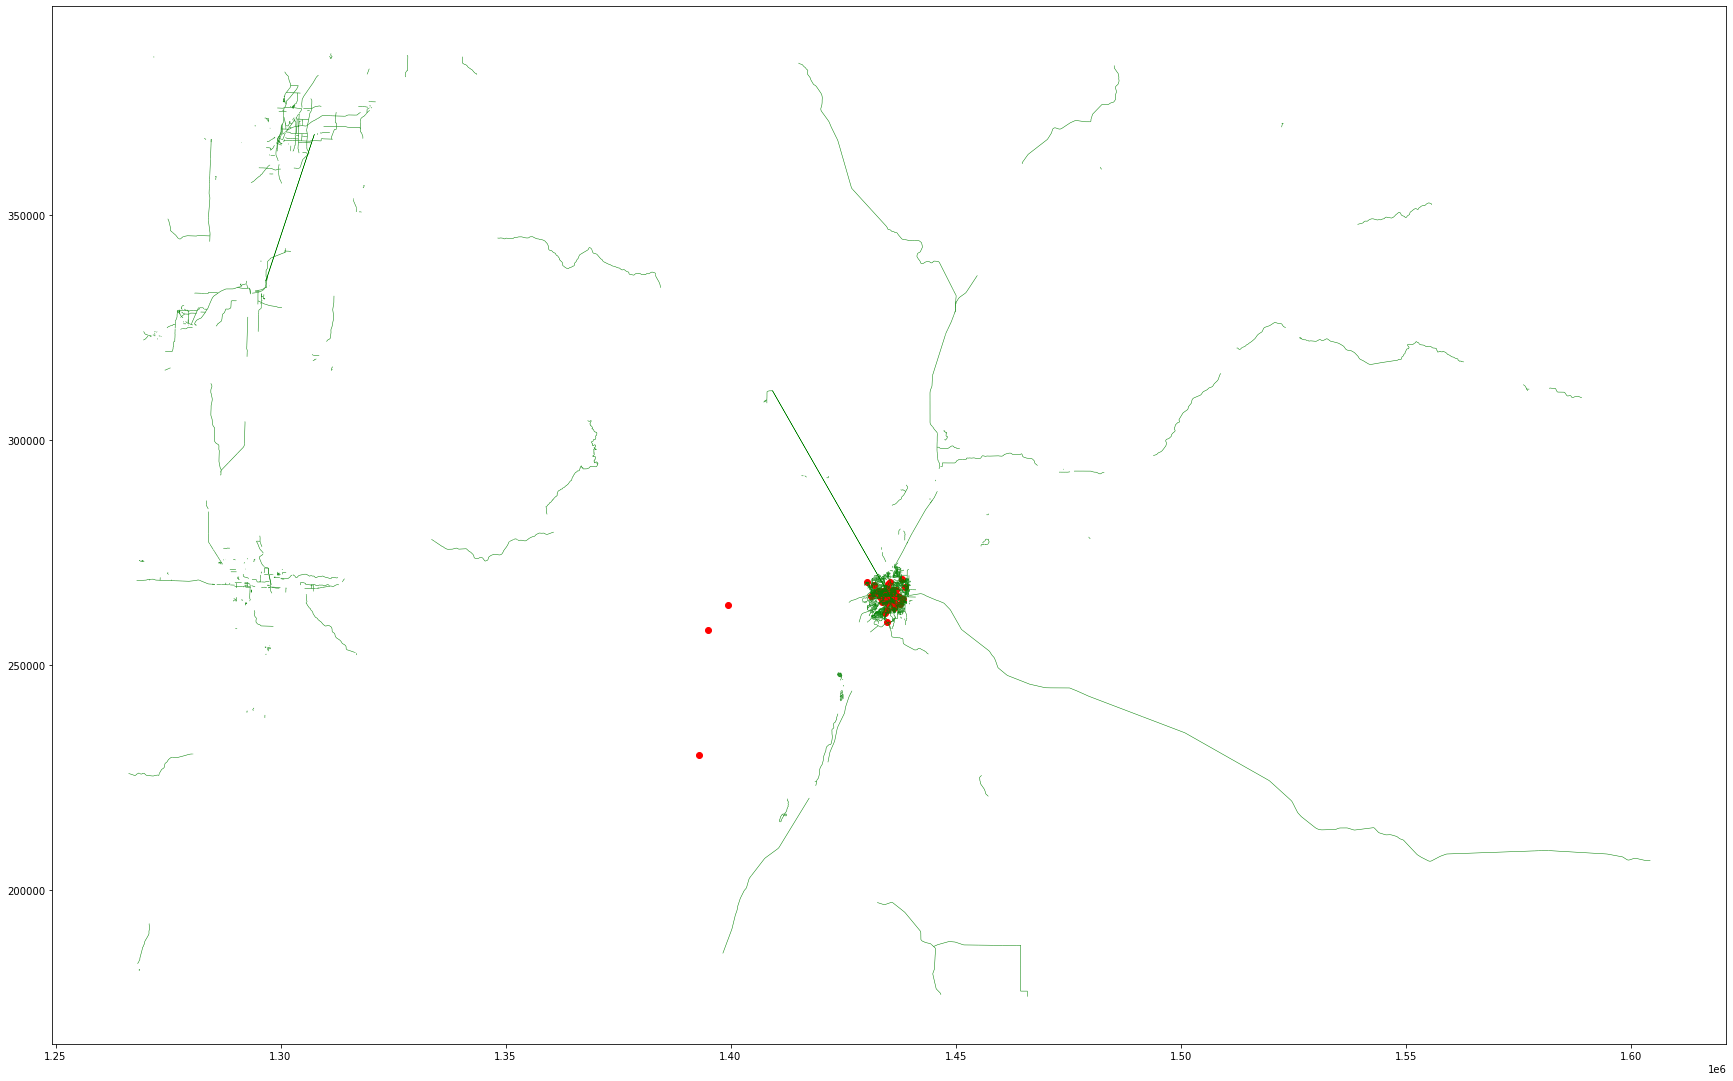

In [1148]:
fig, ax = plt.subplots(figsize = (30,25)) 
ecoshort.plot(ax=ax,color="red")
road_proj2.plot(color="green",edgecolor='k',linewidth = 0.5,ax=ax) #Use your second dataframe

In [1149]:
# Now calculate the mean speed for each count location
output_pointspeed=pt_speed.groupby(by=['osm_id_sensor'])['maxspeed'].mean().reset_index()
output_pointspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  maxspeed
0      5369529.0      25.0
1      5369733.0      25.0
2      5369877.0      25.0
3      5371320.0      35.0
4      5372140.0      35.0

In [1150]:
output_pointspeed.columns=["osm_id","Point Speed"]
output_pointspeed.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Speed
0  5369529.0         25.0
1  5369733.0         25.0
2  5369877.0         25.0
3  5371320.0         35.0
4  5372140.0         35.0

In [1151]:
pt_speed_v1.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'geometry_x',
       'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university',
       'lanes', 'maxspeed_x', 'index', 'osm_id', 'name', 'ref', 'type',
       'oneway', 'bridge', 'maxspeed_y', 'geometry_y'],
      dtype='object')

In [1152]:
# Now calculate the mean speed for each count location
output_pointspeed_v2=pt_speed_v1.groupby(by=['osm_id_sensor'])['maxspeed_x'].mean().reset_index()
output_pointspeed_v2.columns=['osm_id','maxspeed']
output_pointspeed_v2

osm_id  maxspeed
0     5369529.0      25.0
1     5369733.0      25.0
2     5369877.0      25.0
3     5371320.0      35.0
4     5372140.0      35.0
5     5372768.0      35.0
6     5372797.0      35.0
7     5372909.0      25.0
8     5373510.0      35.0
9     5373770.0      25.0
10    5375454.0      25.0
11    5376261.0      25.0
12    5376418.0      35.0
13    5376895.0      25.0
14    5377057.0      25.0
15    5377140.0      35.0
16    5377556.0      25.0
17    5378693.0      35.0
18   46094520.0      25.0
19   46094521.0      25.0
20   46094523.0      25.0
21   47346890.0      30.0
22   47636835.0      35.0
23   48332546.0      30.0
24   48332549.0      25.0
25   48381198.0      35.0
26   48381206.0      35.0
27   48381210.0      20.0
28   49105950.0      25.0
29   90955476.0      35.0
30  135232314.0      35.0
31  135232327.0      25.0
32  143486914.0      35.0
33  186561286.0      25.0
34  239383101.0      25.0
35  276823353.0      45.0
36  360457476.0      35.0
37  360461903.0      25.0
38  364850041.0      30.0
39  365159255.0      40.0
40  365226874.0      25.0
41  369186255.0      30.0
42  435543651.0      40.0
43  438346301.0      25.0

# Calculate the road type underneath of count station

In [1153]:
# Keep only functional class of road that we considered in our study to create catagorical varaibale

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1154]:
road_proj_type1=road_proj[road_proj['type']=='primary']                          
road_proj_type2=road_proj[road_proj['type']=='secondary']
road_proj_type3=road_proj[road_proj['type']=='tertiary']
road_proj_type4=road_proj[road_proj['type']=='residential']
road_proj_type5=road_proj[road_proj['type']=='path']
road_proj_type6=road_proj[road_proj['type']=='cycleway']
road_proj_type7=road_proj[road_proj['type']=='footway']
road_proj_type=pd.concat([road_proj_type1,road_proj_type2,road_proj_type3,road_proj_type4,road_proj_type5,road_proj_type6,road_proj_type7],axis=0).reset_index()
road_proj_type.head(5)

index   osm_id                    name    ref     type  oneway  bridge  \
0      0  5083705         Sherman Highway  US 97  primary       0       0   
1    773  5138857  Central Oregon Highway  US 20  primary       0       0   
2   1950  5143196  Central Oregon Highway  US 20  primary       0       0   
3   3250  5193396    Warm Springs Highway  US 26  primary       0       0   
4   3329  5193723         Sherman Highway  US 97  primary       0       0   

   maxspeed                                           geometry  
0      55.0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1      65.0  LINESTRING (1548893.914 211384.598, 1548858.28...  
2      65.0  LINESTRING (1534985.421 213737.667, 1534581.71...  
3      55.0  LINESTRING (1431260.195 351224.436, 1430789.36...  
4      55.0  LINESTRING (1480178.213 371574.040, 1480242.72...

In [1155]:
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'type']

#ecoshort['type'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort
#ecoshort_rt=ecoshort.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1156]:
# Now merged with road shape file
#road_merged_inner=pd.merge(ecoshort_speed, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#ecoshort_rt.head()

In [1157]:
road_merged_inner = pd.merge(left=road_proj_type, right=ecoshort, left_on='osm_id', right_on='osm_id_sensor',how='inner')
road_merged_inner.head()

index     osm_id                        name               ref     type  \
0  16158    5372140        Northeast 3rd Street  US 20;US 97 Busi  primary   
1  16498    5372797        Northeast 3rd Street    US 97 Business  primary   
2  18468    5376418  Northeast Greenwood Avenue             US 20  primary   
3  58761   90955476        Northeast 3rd Street  US 20;US 97 Busi  primary   
4  63071  143486914        Southeast 3rd Street    US 97 Business  primary   

   oneway  bridge  maxspeed_x  \
0       0       0        35.0   
1       0       0        35.0   
2       0       0        35.0   
3       0       0        35.0   
4       0       0        35.0   

                                          geometry_x  site_id  ...   latitude  \
0  LINESTRING (1435697.957 266173.612, 1435698.25...  S023BEN  ...  44.060314   
1  LINESTRING (1435688.870 265145.917, 1435689.12...  S017BEN  ...  44.051749   
2  LINESTRING (1436662.629 266164.281, 1436575.84...  S029BEN  ...  44.059950   
3  LINESTRING (1435535.112 269677.733, 1435518.73...  S033BEN  ...  44.080230   
4  LINESTRING (1435605.501 264047.755, 1435611.38...  S025BEN  ...  44.043531   

    longitude                      comment osm_id_sensor  \
0 -121.302660     sidewalk count NW of int     5372140.0   
1 -121.302536                          NaN     5372797.0   
2 -121.297974                          NaN     5376418.0   
3 -121.304846  NB (reverse) direction only    90955476.0   
4 -121.302579    SB/Westside sidewalk only   143486914.0   

                       geometry_y  min_dist_to_school  min_dist_to_college  \
0  POINT (1435686.944 266213.570)         1161.602927         12685.297798   
1  POINT (1435687.704 265261.816)         2000.189485         13919.350675   
2  POINT (1436061.997 266169.510)         1061.958078         13906.420869   
3  POINT (1435533.016 268428.139)         1525.783801         12171.134073   
4  POINT (1435675.516 264348.818)         3283.277853         15573.738696   

   min_dist_to_university  lanes  maxspeed_y  
0             7992.543255      4        35.0  
1             6115.250124      1        35.0  
2             8789.394708      4        35.0  
3            13991.208273      4        35.0  
4             5463.690500      2        35.0  

[5 rows x 29 columns]

In [1158]:
# First identify the closest link from count station
#https://gis.stackexchange.com/questions/323884/performing-sjoin-on-polygons-and-lines-without-intersection-using-geopandas
#def nearest_linestring(point, df_lines):
#    idx = df_lines.geometry.distance(point).idxmin()
#    return df_lines.loc[idx, 'osm_id']

#ecoshort['osm_id'] = ecoshort.geometry.apply(nearest_linestring, df_lines=road_proj_type)
#ecoshort


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1159]:
# Now merge with road shape file with OSM ID
#closest_road_type=pd.merge(ecoshort, road_proj_type, right_on='osm_id', left_on='osm_id',how='inner')
#closest_road_type
road_merged_inner.columns


Index(['index', 'osm_id', 'name', 'ref', 'type', 'oneway', 'bridge',
       'maxspeed_x', 'geometry_x', 'site_id', 'site_name', 'sensor_type',
       'year', 'region', 'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb',
       'stl_raw', 'latitude', 'longitude', 'comment', 'osm_id_sensor',
       'geometry_y', 'min_dist_to_school', 'min_dist_to_college',
       'min_dist_to_university', 'lanes', 'maxspeed_y'],
      dtype='object')

In [1160]:
pt_road_type1=road_merged_inner.loc[:,['osm_id_sensor','type']]
pt_road_type1.columns=['osm_id','road_type']
pt_road_type1.head()

osm_id road_type
0    5372140.0   primary
1    5372797.0   primary
2    5376418.0   primary
3   90955476.0   primary
4  143486914.0   primary

# Convert this road catagory to binary as follows- 0 and 1

In [1161]:
import numpy as np
pt_road_type1['primary_binary'] = np.where(pt_road_type1['road_type'] == 'primary', 1, 0)
pt_road_type1['secondary_binary'] = np.where(pt_road_type1['road_type'] == 'secondary', 1, 0)
pt_road_type1['tertiary_binary'] = np.where(pt_road_type1['road_type'] == 'tertiary', 1, 0)
pt_road_type1['residential_binary'] = np.where(pt_road_type1['road_type'] == 'residential', 1, 0)
pt_road_type1['path_binary'] = np.where(pt_road_type1['road_type'] == 'path', 1, 0)
pt_road_type1['cycleway_binary'] = np.where(pt_road_type1['road_type'] == 'cycleway', 1, 0)
pt_road_type1['footway_binary'] = np.where(pt_road_type1['road_type'] == 'footway', 1, 0)
pt_road_type1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id road_type  primary_binary  secondary_binary  tertiary_binary  \
0    5372140.0   primary               1                 0                0   
1    5372797.0   primary               1                 0                0   
2    5376418.0   primary               1                 0                0   
3   90955476.0   primary               1                 0                0   
4  143486914.0   primary               1                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

In [1162]:
pt_road_type2=pt_road_type1.drop(['road_type'],axis=1)
pt_road_type2.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  primary_binary  secondary_binary  tertiary_binary  \
0    5372140.0               1                 0                0   
1    5372797.0               1                 0                0   
2    5376418.0               1                 0                0   
3   90955476.0               1                 0                0   
4  143486914.0               1                 0                0   

   residential_binary  path_binary  cycleway_binary  footway_binary  
0                   0            0                0               0  
1                   0            0                0               0  
2                   0            0                0               0  
3                   0            0                0               0  
4                   0            0                0               0

# Calculate the Bridges

In [1163]:
bridge=inter_road.copy()
output_bridge=bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
# Convert binary, presence of bridge=1, absence of bridge=0
output_bridge.loc[output_bridge['bridge'] > 0, 'bridge'] = 1
output_bridge.loc[output_bridge['bridge'] ==0, 'bridge'] = 2
output_bridge.columns=['osm_id','bridge']
output_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  bridge
0  5369529.0       2
1  5369733.0       1
2  5369877.0       1
3  5371320.0       1
4  5372140.0       1

# Calculate the bridge from spatial join of count location and bridge line shape file

In [1164]:
bridge_only=road_proj
bridge_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id             name    ref         type  oneway  bridge  maxspeed  \
0  5083705  Sherman Highway  US 97      primary       0       0      55.0   
1  5083943      Decker Road   None        track       0       0       NaN   
2  5083991      Helyer Road   None  residential       0       0       NaN   
3  5084123             None   None  residential       0       0       NaN   
4  5085254             None   None      service       0       0       NaN   

                                            geometry  
0  LINESTRING (1486290.659 379666.550, 1486298.99...  
1  LINESTRING (1487599.361 379805.264, 1487537.25...  
2  LINESTRING (1490346.700 382043.724, 1490316.27...  
3  LINESTRING (1486935.053 382909.741, 1487051.82...  
4  LINESTRING (1485581.710 382268.513, 1485545.51...

In [1165]:
#count_station
bridge_only.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['osm_id', 'name', 'ref', 'type', 'oneway', 'bridge', 'maxspeed',
       'geometry'],
      dtype='object')

In [1166]:
# Join count location file with road file
pointInline_bridge =pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
pointInline_bridge.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  lanes  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...      2   
1             2.0  220.426625   6.958904   3.068493   2617.0  ...      2   
2             3.0  127.953968  13.726027   4.369863   3128.0  ...      1   
3             1.0  109.378321   7.027397   2.178082   1998.0  ...      2   
4             2.0   61.295238   5.260274   1.698630   1387.0  ...      2   

   maxspeed_x    osm_id                        name   ref       type  oneway  \
0        35.0  48381206   Southwest Colorado Avenue  None  secondary       0   
1        25.0   5369877   Northwest Franklin Avenue  None  secondary       0   
2        25.0  49105950  Northwest Galveston Avenue  None  secondary       0   
3        25.0  46094523    Northwest Newport Avenue  None  secondary       0   
4        25.0  46094520   Northwest Portland Avenue  None   tertiary       0   

   bridge maxspeed_y                                         geometry_y  
0       0       35.0  LINESTRING (1434286.496 265096.386, 1434316.88...  
1       0       25.0  LINESTRING (1435326.798 265730.143, 1435210.25...  
2       0       25.0  LINESTRING (1433976.657 265820.086, 1433968.10...  
3       0       25.0  LINESTRING (1434730.569 266331.976, 1434695.75...  
4       1       25.0  LINESTRING (1434996.515 266646.232, 1435053.03...  

[5 rows x 28 columns]

In [1167]:
# Join by OSM ID
#pointInline_bridge_v2 = pd.merge(left=bridge_only, right=count_station, left_on='osm_id', right_on='OSM_ID',how='inner')
#pointInline_bridge_v2


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1168]:
output_point_bridge=pointInline_bridge.groupby(by=['osm_id_sensor'])['bridge'].sum().reset_index()
output_point_bridge.head()

osm_id_sensor  bridge
0      5369529.0       0
1      5369733.0       0
2      5369877.0       0
3      5371320.0       0
4      5372140.0       0

In [1169]:
output_point_bridge.loc[output_point_bridge['bridge'] > 0, 'bridge'] = 1
output_point_bridge.loc[output_point_bridge['bridge'] ==0, 'bridge'] = 2
output_point_bridge.columns=["osm_id","Point Bridge"]
output_point_bridge.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Point Bridge
0  5369529.0             2
1  5369733.0             2
2  5369877.0             2
3  5371320.0             2
4  5372140.0             2

# Calculate the Distance from count station to land use:Distance to water body, Distance to park,Distance to green space area,Distance to commercial,Distance to industrial area,Distance to residential area ,Distance to Retail area,Distance to Residential area



# Distance to park

In [1170]:
def min_distance_ppoly(point, polygon):
    return polygon.distance(point).min()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1171]:
nature_proj1.head(5)

osm_id                  name    type  \
0  24445541                  None   water   
1  25125504                  None  forest   
2  25125505                  None  forest   
3  25126014                  None   water   
4  30106022  Parkdale County Park    park   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
1  POLYGON ((1290529.862 270244.069, 1290525.591 ...  
2  POLYGON ((1290505.755 270524.092, 1290511.603 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
4  POLYGON ((1305349.877 372106.996, 1305345.602 ...

In [1172]:
park_only=nature_proj1[nature_proj1['type'].str.contains('park')]
park_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name  type  \
4   30106022  Parkdale County Park  park   
7   30264106       Riverfront Park  park   
25  30504889     Holman State Park  park   
27  30927377  Weathers Street Park  park   
29  32333645    Marion Square Park  park   

                                             geometry  
4   POLYGON ((1305349.877 372106.996, 1305345.602 ...  
7   POLYGON ((1299433.809 367465.490, 1299453.092 ...  
25  POLYGON ((1294325.792 366417.961, 1294618.224 ...  
27  POLYGON ((1304334.111 367051.705, 1304186.661 ...  
29  POLYGON ((1299622.682 367272.226, 1299611.540 ...

In [1173]:
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw   latitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  44.050292   
1             2.0  220.426625   6.958904   3.068493   2617.0  44.055983   
2             3.0  127.953968  13.726027   4.369863   3128.0  44.056585   
3             1.0  109.378321   7.027397   2.178082   1998.0  44.061464   
4             2.0   61.295238   5.260274   1.698630   1387.0  44.064152   

    longitude comment  osm_id_sensor                        geometry  \
0 -121.319863     NaN     48381206.0  POINT (1434297.657 265113.372)   
1 -121.308599     NaN      5369877.0  POINT (1435206.451 265737.006)   
2 -121.324270     NaN     49105950.0  POINT (1433951.414 265816.071)   
3 -121.314923     NaN     46094523.0  POINT (1434705.630 266350.843)   
4 -121.310496     NaN     46094520.0  POINT (1435063.168 266646.066)   

   min_dist_to_school  min_dist_to_college  min_dist_to_university lanes  \
0         1836.231483         10520.590150             2387.326197     2   
1         1839.981365         11794.261428             5773.809117     2   
2         1671.767045          8150.297244             4506.877508     1   
3         2062.855533          9487.250630             6656.861545     2   
4         2917.732762         10342.951024             8005.030293     2   

   maxspeed  
0      35.0  
1      25.0  
2      25.0  
3      25.0  
4      25.0

In [1174]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(park_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ... -121.319863   
1             2.0  220.426625   6.958904   3.068493   2617.0  ... -121.308599   
2             3.0  127.953968  13.726027   4.369863   3128.0  ... -121.324270   
3             1.0  109.378321   7.027397   2.178082   1998.0  ... -121.314923   
4             2.0   61.295238   5.260274   1.698630   1387.0  ... -121.310496   

   comment osm_id_sensor                        geometry min_dist_to_school  \
0      NaN    48381206.0  POINT (1434297.657 265113.372)        1836.231483   
1      NaN     5369877.0  POINT (1435206.451 265737.006)        1839.981365   
2      NaN    49105950.0  POINT (1433951.414 265816.071)        1671.767045   
3      NaN    46094523.0  POINT (1434705.630 266350.843)        2062.855533   
4      NaN    46094520.0  POINT (1435063.168 266646.066)        2917.732762   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         10520.590150             2387.326197      2     35.0   
1         11794.261428             5773.809117      2     25.0   
2          8150.297244             4506.877508      1     25.0   
3          9487.250630             6656.861545      2     25.0   
4         10342.951024             8005.030293      2     25.0   

   min_dist_to_polygon  
0           337.240761  
1          1416.110195  
2            52.415401  
3            39.470064  
4            19.485275  

[5 rows x 21 columns]

In [1175]:
Park_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
Park_distance1.columns=["osm_id","Distance to Park"]
Park_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park
0  48381206.0        337.240761
1   5369877.0       1416.110195
2  49105950.0         52.415401
3  46094523.0         39.470064
4  46094520.0         19.485275

# cc distance to park

In [1176]:
parkcc=park_only.copy()
parkcc['geometry']=parkcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(parkcc,))*3.28084
parkcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
parkcc_distance1.columns=["osm_id","Distance to Park Center"]
parkcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Park Center
0  48381206.0               670.025504
1   5369877.0              1469.080663
2  49105950.0              1233.149102
3  46094523.0               214.352179
4  46094520.0               394.286909

# Distance to water body

In [1177]:
water_only=nature_proj1[nature_proj1['type'].str.contains('water')]
water_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id               name   type  \
0  24445541               None  water   
3  25126014               None  water   
5  30186330       Paulina Lake  water   
6  30186476          East Lake  water   
8  30269840  Stone Quarry Lake  water   

                                            geometry  
0  POLYGON ((1435370.200 267950.959, 1435347.324 ...  
3  POLYGON ((1290284.220 271836.402, 1290277.442 ...  
5  POLYGON ((1438807.997 229599.089, 1438837.355 ...  
6  POLYGON ((1443892.674 229515.123, 1443916.783 ...  
8  POLYGON ((1301205.869 363817.692, 1301206.974 ...

In [1178]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(water_only,))*3.28084
ecoshort.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ... -121.319863   
1             2.0  220.426625   6.958904   3.068493   2617.0  ... -121.308599   
2             3.0  127.953968  13.726027   4.369863   3128.0  ... -121.324270   
3             1.0  109.378321   7.027397   2.178082   1998.0  ... -121.314923   
4             2.0   61.295238   5.260274   1.698630   1387.0  ... -121.310496   

   comment osm_id_sensor                        geometry min_dist_to_school  \
0      NaN    48381206.0  POINT (1434297.657 265113.372)        1836.231483   
1      NaN     5369877.0  POINT (1435206.451 265737.006)        1839.981365   
2      NaN    49105950.0  POINT (1433951.414 265816.071)        1671.767045   
3      NaN    46094523.0  POINT (1434705.630 266350.843)        2062.855533   
4      NaN    46094520.0  POINT (1435063.168 266646.066)        2917.732762   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         10520.590150             2387.326197      2     35.0   
1         11794.261428             5773.809117      2     25.0   
2          8150.297244             4506.877508      1     25.0   
3          9487.250630             6656.861545      2     25.0   
4         10342.951024             8005.030293      2     25.0   

   min_dist_to_polygon  
0           598.438382  
1          2254.193276  
2            57.355178  
3            54.744148  
4            26.599315  

[5 rows x 21 columns]

In [1179]:
water_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
water_distance1.columns=["osm_id","Distance to Water Body"]
water_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Body
0  48381206.0              598.438382
1   5369877.0             2254.193276
2  49105950.0               57.355178
3  46094523.0               54.744148
4  46094520.0               26.599315

In [1180]:
watercc=water_only.copy()
watercc['geometry']=watercc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(watercc,))*3.28084
watercc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
watercc_distance1.columns=["osm_id","Distance to Water Center"]
watercc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Water Center
0  48381206.0                687.406354
1   5369877.0               3228.275608
2  49105950.0               1557.711927
3  46094523.0               1301.501825
4  46094520.0                462.114629

# Distance To  Forest

In [1181]:
forest_only=nature_proj1[nature_proj1['type'].str.contains('forest')]
forest_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name    type                                           geometry
1   25125504  None  forest  POLYGON ((1290529.862 270244.069, 1290525.591 ...
2   25125505  None  forest  POLYGON ((1290505.755 270524.092, 1290511.603 ...
34  33739423  None  forest  POLYGON ((1301785.526 368973.878, 1301783.274 ...
69  39421883  None  forest  POLYGON ((1297995.454 361000.607, 1298066.889 ...
72  39609166  None  forest  POLYGON ((1283061.104 365834.887, 1283131.169 ...

In [1182]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forest_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ... -121.319863   
1             2.0  220.426625   6.958904   3.068493   2617.0  ... -121.308599   
2             3.0  127.953968  13.726027   4.369863   3128.0  ... -121.324270   
3             1.0  109.378321   7.027397   2.178082   1998.0  ... -121.314923   
4             2.0   61.295238   5.260274   1.698630   1387.0  ... -121.310496   

   comment osm_id_sensor                        geometry min_dist_to_school  \
0      NaN    48381206.0  POINT (1434297.657 265113.372)        1836.231483   
1      NaN     5369877.0  POINT (1435206.451 265737.006)        1839.981365   
2      NaN    49105950.0  POINT (1433951.414 265816.071)        1671.767045   
3      NaN    46094523.0  POINT (1434705.630 266350.843)        2062.855533   
4      NaN    46094520.0  POINT (1435063.168 266646.066)        2917.732762   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         10520.590150             2387.326197      2     35.0   
1         11794.261428             5773.809117      2     25.0   
2          8150.297244             4506.877508      1     25.0   
3          9487.250630             6656.861545      2     25.0   
4         10342.951024             8005.030293      2     25.0   

   min_dist_to_polygon  
0          5005.416738  
1          6671.735261  
2          7442.970720  
3          5923.120725  
4          4408.608635  

[5 rows x 21 columns]

In [1183]:
forest_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forest_distance1.columns=["osm_id","Distance to forest"]
forest_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to forest
0  48381206.0         5005.416738
1   5369877.0         6671.735261
2  49105950.0         7442.970720
3  46094523.0         5923.120725
4  46094520.0         4408.608635

In [1184]:
forestcc=forest_only.copy()
forestcc['geometry']=forestcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(forestcc,))*3.28084
forestcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
forestcc_distance1.columns=["osm_id","Distance to Forest Center"]
forestcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Forest Center
0  48381206.0                5091.037243
1   5369877.0                6732.935103
2  49105950.0                7528.668544
3  46094523.0                5985.629660
4  46094520.0                4471.349933

# Distance to green space area

In [1185]:
grass_only=luse_proj[luse_proj['type'].str.contains('grass')]
grass_only.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                 name   type  \
2   30010727  Brown Road Property  grass   
14  39421884                 None  grass   
31  40172820                 None  grass   
88  45060560                 None  grass   
89  45060565                 None  grass   

                                             geometry  
2   POLYGON ((1305210.479 368501.172, 1305004.835 ...  
14  POLYGON ((1297953.568 361010.027, 1297957.272 ...  
31  POLYGON ((1286354.936 358743.612, 1286373.575 ...  
88  POLYGON ((1299272.748 366999.958, 1299276.927 ...  
89  POLYGON ((1299119.115 366790.943, 1299122.951 ...

In [1186]:
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grass_only,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...   longitude  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ... -121.319863   
1             2.0  220.426625   6.958904   3.068493   2617.0  ... -121.308599   
2             3.0  127.953968  13.726027   4.369863   3128.0  ... -121.324270   
3             1.0  109.378321   7.027397   2.178082   1998.0  ... -121.314923   
4             2.0   61.295238   5.260274   1.698630   1387.0  ... -121.310496   

   comment osm_id_sensor                        geometry min_dist_to_school  \
0      NaN    48381206.0  POINT (1434297.657 265113.372)        1836.231483   
1      NaN     5369877.0  POINT (1435206.451 265737.006)        1839.981365   
2      NaN    49105950.0  POINT (1433951.414 265816.071)        1671.767045   
3      NaN    46094523.0  POINT (1434705.630 266350.843)        2062.855533   
4      NaN    46094520.0  POINT (1435063.168 266646.066)        2917.732762   

   min_dist_to_college  min_dist_to_university  lanes maxspeed  \
0         10520.590150             2387.326197      2     35.0   
1         11794.261428             5773.809117      2     25.0   
2          8150.297244             4506.877508      1     25.0   
3          9487.250630             6656.861545      2     25.0   
4         10342.951024             8005.030293      2     25.0   

   min_dist_to_polygon  
0            92.767397  
1          1541.258450  
2          1283.045552  
3          1694.976535  
4          2808.470648  

[5 rows x 21 columns]

In [1187]:
grass_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grass_distance1.columns=["osm_id","Distance to Grass"]
grass_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass
0  48381206.0          92.767397
1   5369877.0        1541.258450
2  49105950.0        1283.045552
3  46094523.0        1694.976535
4  46094520.0        2808.470648

In [1188]:
grasscc=grass_only.copy()
grasscc['geometry']=grasscc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(grasscc,))*3.28084
grasscc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
grasscc_distance1.columns=["osm_id","Distance to Grass Center"]
grasscc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Grass Center
0  48381206.0                342.230696
1   5369877.0               1669.416442
2  49105950.0               1432.363387
3  46094523.0               1850.115195
4  46094520.0               2920.051255

# Distance to commercial

In [1189]:
commercial_only=luse_proj[luse_proj['type'].str.contains('commercial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercial_only,))*3.28084
commercial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercial_distance1.columns=["osm_id","Distance to Commercial Area"]
commercial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area
0  48381206.0                  3870.753755
1   5369877.0                  5660.650940
2  49105950.0                  4174.325530
3  46094523.0                  4895.819384
4  46094520.0                  3376.920997

In [1190]:
commercialcc=commercial_only.copy()
commercialcc['geometry']=commercialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(commercialcc,))*3.28084
commercialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
commercialcc_distance1.columns=["osm_id","Distance to Commercial Area Center"]
commercialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Commercial Area Center
0  48381206.0                         4393.534269
1   5369877.0                         5931.341155
2  49105950.0                         4751.841139
3  46094523.0                         5117.025340
4  46094520.0                         3602.456230

# Distance to industrial area

In [1191]:
industrial_only=luse_proj[luse_proj['type'].str.contains('industrial')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrial_only,))*3.28084
industrial_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrial_distance1.columns=["osm_id","Distance to Industrial Area"]
industrial_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Area
0  48381206.0                  1091.253942
1   5369877.0                  2252.615213
2  49105950.0                  3300.132533
3  46094523.0                  4745.353996
4  46094520.0                  3686.878831

In [1192]:
industrialcc=industrial_only.copy()
industrialcc['geometry']=industrialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(industrialcc,))*3.28084
industrialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
industrialcc_distance1.columns=["osm_id","Distance to Industrial Center"]
industrialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Industrial Center
0  48381206.0                    1435.723711
1   5369877.0                    2610.973942
2  49105950.0                    3645.183901
3  46094523.0                    5141.012500
4  46094520.0                    4457.297604

# Distance to Retail area

In [1193]:
retail_only=luse_proj[luse_proj['type'].str.contains('retail')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retail_only,))*3.28084
retail_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retail_distance1.columns=["osm_id","Distance to Retail Area"]
retail_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Area
0  48381206.0               912.843350
1   5369877.0              1470.712354
2  49105950.0              2188.100830
3  46094523.0              3474.666870
4  46094520.0              2499.633406

In [1194]:
retailcc=retail_only.copy()
retailcc['geometry']=retailcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(retailcc,))*3.28084
retailcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
retailcc_distance1.columns=["osm_id","Distance to Retail Center"]
retailcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Retail Center
0  48381206.0                1237.116553
1   5369877.0                1572.520642
2  49105950.0                2656.875102
3  46094523.0                3674.619520
4  46094520.0                2945.855948

# Distance to Residential

In [1195]:
residential_only=luse_proj[luse_proj['type'].str.contains('residential')]
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residential_only,))*3.28084
residential_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residential_distance1.columns=["osm_id","Distance to Residential Area"]
residential_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Area
0  48381206.0                   4702.394398
1   5369877.0                   2839.712020
2  49105950.0                   6355.265156
3  46094523.0                   5438.008646
4  46094520.0                   4327.669960

In [1196]:
residentialcc=residential_only.copy()
residentialcc['geometry']=residentialcc['geometry'].centroid
ecoshort['min_dist_to_polygon'] = ecoshort.geometry.apply(min_distance_ppoly, args=(residentialcc,))*3.28084
residentialcc_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_polygon']]
residentialcc_distance1.columns=["osm_id","Distance to Residential Center"]
residentialcc_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to Residential Center
0  48381206.0                     5852.063372
1   5369877.0                     5422.732422
2  49105950.0                     7531.224178
3  46094523.0                     6629.718814
4  46094520.0                     5131.784928

# Import the OSM Building file and use Bend City Hall as the CBD, then calculate the distance from CBD

In [1197]:
building1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id                  name      type  \
0  27442271  Oregon State Capitol  building   
1  29128816                  None      None   
2  29129109                  None      None   
3  29463356                  None      None   
4  29463575                  None      None   

                                            geometry  
0  POLYGON ((-123.03102 44.93875, -123.03110 44.9...  
1  POLYGON ((-122.98051 44.95688, -122.98043 44.9...  
2  POLYGON ((-122.96775 44.96740, -122.96749 44.9...  
3  POLYGON ((-122.97156 44.98405, -122.97128 44.9...  
4  POLYGON ((-122.96077 44.98543, -122.96074 44.9...

In [1198]:
# Reproject the geometries by replacing the values with projected ones
bld_proj = building1.to_crs(epsg=2839)
bld_proj.head(10)
bld_proj1=bld_proj.loc[(bld_proj.osm_id==262286818)]
bld_proj1

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name  type                                           geometry
4468  262286818  None  None  POLYGON ((1434751.556 265821.229, 1434749.885 ...

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

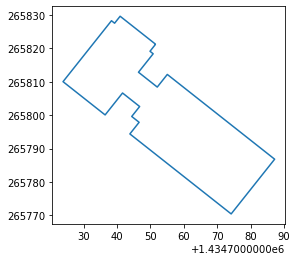

In [1199]:
bld_proj1.geometry.boundary.plot()

In [1200]:
# copy GeoDataFrame
bld_proj2 = bld_proj1.copy()
# change geometry 
bld_proj2['geometry'] = bld_proj2['geometry'].centroid
bld_proj2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  name  type                        geometry
4468  262286818  None  None  POINT (1434755.734 265799.360)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

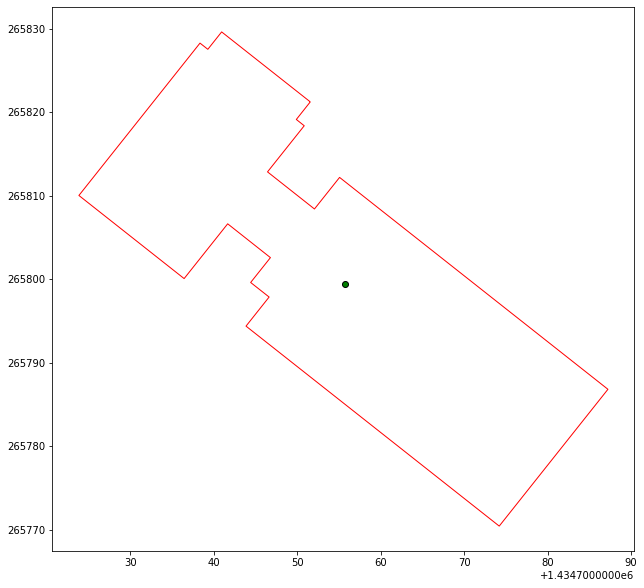

In [1201]:
fig, ax = plt.subplots(figsize = (15,10)) 
bld_proj2.plot(ax=ax,color="green",edgecolor='k')
bld_proj1.geometry.boundary.plot(color="red",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [1202]:
# Calculate the distance from CBD to all count locations
ecoshort['min_dist_to_CBD'] = ecoshort.geometry.apply(min_distance_ppoly, args=(bld_proj2,))*3.28084
ecoshort.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  comment  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...      NaN   
1             2.0  220.426625   6.958904   3.068493   2617.0  ...      NaN   
2             3.0  127.953968  13.726027   4.369863   3128.0  ...      NaN   
3             1.0  109.378321   7.027397   2.178082   1998.0  ...      NaN   
4             2.0   61.295238   5.260274   1.698630   1387.0  ...      NaN   

   osm_id_sensor                        geometry  min_dist_to_school  \
0     48381206.0  POINT (1434297.657 265113.372)         1836.231483   
1      5369877.0  POINT (1435206.451 265737.006)         1839.981365   
2     49105950.0  POINT (1433951.414 265816.071)         1671.767045   
3     46094523.0  POINT (1434705.630 266350.843)         2062.855533   
4     46094520.0  POINT (1435063.168 266646.066)         2917.732762   

  min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0        10520.590150             2387.326197      2      35.0   
1        11794.261428             5773.809117      2      25.0   
2         8150.297244             4506.877508      1      25.0   
3         9487.250630             6656.861545      2      25.0   
4        10342.951024             8005.030293      2      25.0   

  min_dist_to_polygon  min_dist_to_CBD  
0         5852.063372      2706.272531  
1         5422.732422      1492.814353  
2         7531.224178      2639.417043  
3         6629.718814      1816.778856  
4         5131.784928      2955.355588  

[5 rows x 22 columns]

In [1203]:
CBD_distance1=ecoshort.loc[:,['osm_id_sensor','min_dist_to_CBD']]
CBD_distance1.columns=["osm_id","Distance to CBD"]
CBD_distance1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Distance to CBD
0  48381206.0      2706.272531
1   5369877.0      1492.814353
2  49105950.0      2639.417043
3  46094523.0      1816.778856
4  46094520.0      2955.355588

# End of Distance calculation

# Now write coding for socio-demographic variable extraction

1. Population density
2. Employment density
3. Household Density
4. Number of students (student access)
5. Median age
6. Percentage of female
7. Percentage of male
8. Percentage of African American population
9. Percentage of white population
10. Median Household Income
11. Education (% of population having at least college education)

In [1204]:
# Read the Block group 
#bg=gpd.read_file("../input/oregon-sd-data/OR_blck_grp_2017.shp")
bg.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [1205]:
bg.shape

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2627, 16)

In [1206]:
print(bg.crs)

PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]


In [1207]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely.wkt
bg["wktcolumn"]= bg.apply(lambda row:row['geometry'].wkt, axis=1)
bg
geometry = bg['wktcolumn'].map(shapely.wkt.loads)
bg1 = bg.drop('wktcolumn', axis=1)
bg2 = gpd.GeoDataFrame(bg1, crs='esri:102003', geometry=geometry)
bg2.head(5)

STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((-1737359.842 1029170.395, -1737338.7...  
1  POLYGON ((-1712627.242 1038313.861, -1712879.9...  
2  POLYGON ((-1712321.712 1019131.259, -1712275.9...  
3  POLYGON ((-1712969.088 1014304.981, -1712991.9...  
4  POLYGON ((-1709338.523 1011818.662, -1709343.2...

In [1208]:
# set the co-ordinate system first
#bg2 = bg.set_crs("EPSG:102003")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_proj = bg2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_proj = bg_proj.to_crs('epsg:2839')
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...

In [1209]:
bg_proj["Total block Area"]=bg_proj.area
bg_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER     INTPTLAT      INTPTLON  \
0        S  2.205986e+09  13837275.0  +44.5468040  -118.1781784   
1        S  1.926901e+08     12317.0  +44.9562277  -118.0519082   
2        S  4.723892e+08    639439.0  +44.8443756  -118.0396603   
3        S  1.469016e+07         0.0  +44.7764594  -117.8821056   
4        S  1.009492e+06         0.0  +44.7753666  -117.8349670   

           GISJOIN     Shape_Leng    Shape_Area  \
0  G41000109501001  323465.419044  2.219823e+09   
1  G41000109501002  109051.976354  1.927024e+08   
2  G41000109501003  140639.998011  4.730286e+08   
3  G41000109502001   22860.454690  1.469017e+07   
4  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  Total block Area  
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...      2.220647e+09  
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...      1.928498e+08  
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      4.733330e+08  
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1.469862e+07  
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1.010078e+06

In [1210]:
#race=pd.read_csv("../input/oregon-sd-data/race.csv")
race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHY2M001  AHY2M002  AHY2M003  \
0  Baker County        1      NaN     NaN  ...       167       149        38   
1  Baker County        1      NaN     NaN  ...       163       162        12   
2  Baker County        1      NaN     NaN  ...       159       159        29   
3  Baker County        1      NaN     NaN  ...       222       215        12   
4  Baker County        1      NaN     NaN  ...       237       188        36   

   AHY2M004  AHY2M005  AHY2M006  AHY2M007  AHY2M008  AHY2M009  AHY2M010  
0        11        10         8        12         7        12         7  
1        14         2         8         3         7         2         7  
2        13        12        12        53        16         7        14  
3        42        12        12        12        12        12        12  
4        12        57        12       150         7        12         7  

[5 rows x 58 columns]

In [1211]:
race1=pd.merge(bg_proj, race, left_on='GISJOIN', right_on='GISJOIN', how='left')
race1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHY2M001 AHY2M002 AHY2M003  \
0        S  2.205986e+09  13837275.0  ...      167      149       38   
1        S  1.926901e+08     12317.0  ...      163      162       12   
2        S  4.723892e+08    639439.0  ...      159      159       29   
3        S  1.469016e+07         0.0  ...      222      215       12   
4        S  1.009492e+06         0.0  ...      237      188       36   

   AHY2M004  AHY2M005 AHY2M006  AHY2M007 AHY2M008  AHY2M009  AHY2M010  
0        11        10        8        12        7        12         7  
1        14         2        8         3        7         2         7  
2        13        12       12        53       16         7        14  
3        42        12       12        12       12        12        12  
4        12        57       12       150        7        12         7  

[5 rows x 74 columns]

In [1212]:
race2=race1[['INTPTLAT','INTPTLON','GISJOIN','Shape_Leng','Shape_Area','geometry','AHY2E001','AHY2E002','AHY2E003','Total block Area']]
race2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


INTPTLAT      INTPTLON          GISJOIN     Shape_Leng    Shape_Area  \
0  +44.5468040  -118.1781784  G41000109501001  323465.419044  2.219823e+09   
1  +44.9562277  -118.0519082  G41000109501002  109051.976354  1.927024e+08   
2  +44.8443756  -118.0396603  G41000109501003  140639.998011  4.730286e+08   
3  +44.7764594  -117.8821056  G41000109502001   22860.454690  1.469017e+07   
4  +44.7753666  -117.8349670  G41000109502002    4878.558266  1.009497e+06   

                                            geometry  AHY2E001  AHY2E002  \
0  POLYGON ((1679810.937 358954.564, 1679831.879 ...       950       903   
1  POLYGON ((1701383.821 374160.624, 1701199.044 ...       908       884   
2  POLYGON ((1706645.764 355730.613, 1706737.652 ...      1128      1016   
3  POLYGON ((1707268.957 350908.164, 1707269.754 ...      1097      1060   
4  POLYGON ((1711427.643 349447.966, 1711428.482 ...      1103       912   

   AHY2E003  Total block Area  
0        25      2.220647e+09  
1         0      1.928498e+08  
2        23      4.733330e+08  
3         0      1.469862e+07  
4        25      1.010078e+06

In [1213]:
#race2["Total block Area"]=race2.area
#race2

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1214]:
# Clip the data using GeoPandas clip
buffer_clip_race = gpd.clip(race2, gdf1)
buffer_clip_race.head(5)

INTPTLAT      INTPTLON          GISJOIN     Shape_Leng    Shape_Area  \
463  +43.7611386  -120.8356595  G41001700001001  356442.942569  3.467175e+09   
464  +43.7256814  -121.7130224  G41001700002001  158091.201067  7.983391e+08   
472  +43.9314989  -121.3743124  G41001700004011   53226.272943  1.073652e+08   
477  +44.0439864  -121.6397240  G41001700005001  216637.316723  1.639932e+09   
484  +44.1388638  -121.3605665  G41001700006003   40462.576284  4.033715e+07   

                                              geometry  AHY2E001  AHY2E002  \
463  POLYGON ((1435223.471 258749.350, 1435188.106 ...      1888      1839   
464  POLYGON ((1393818.127 229222.691, 1393738.581 ...      1646      1612   
472  POLYGON ((1433734.242 258883.211, 1433738.453 ...      3254      3158   
477  MULTIPOLYGON (((1429177.715 268500.473, 142921...      1347      1293   
484  POLYGON ((1429872.795 269575.281, 1429856.824 ...      1179      1102   

     AHY2E003  Total block Area  
463        18      3.466821e+09  
464         0      7.982441e+08  
472         0      1.073607e+08  
477         0      1.639970e+09  
484         0      4.034011e+07

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


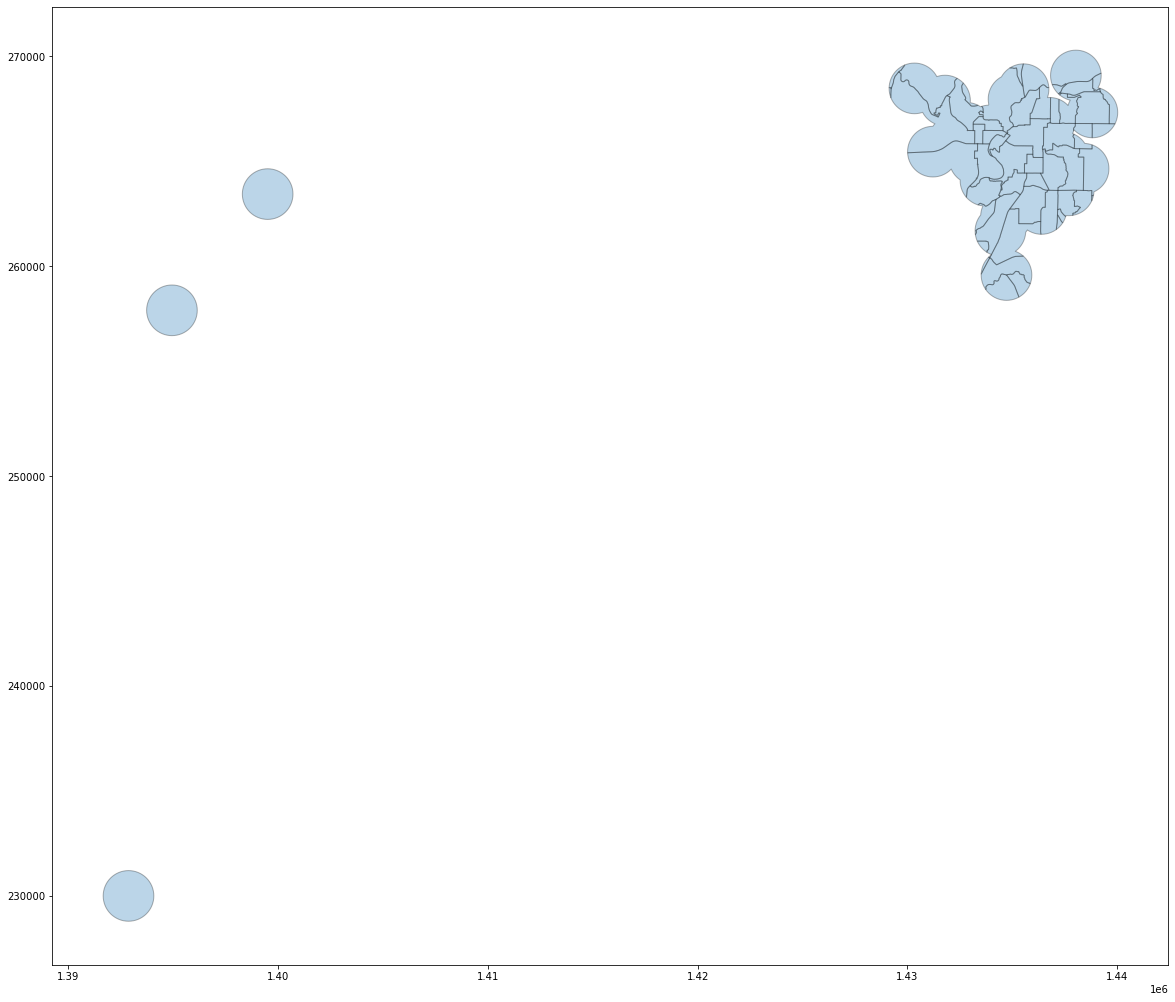

In [1215]:
ax = buffer_clip_race.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1216]:
 inter_race=gpd.overlay(gdf1, buffer_clip_race, how='intersection', make_valid=True, keep_geom_type=False)
 inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...   
3             3.0   33.092525  12.986301   3.260274    596.0  ...   
4             3.0   52.937398   1.726027   0.547945    920.0  ...   

      INTPTLAT      INTPTLON          GISJOIN   Shape_Leng     Shape_Area  \
0  +44.0611690  -121.3311818  G41001700013005  2979.521698  407418.357228   
1  +44.0611690  -121.3311818  G41001700013005  2979.521698  407418.357228   
2  +44.0611690  -121.3311818  G41001700013005  2979.521698  407418.357228   
3  +44.0611690  -121.3311818  G41001700013005  2979.521698  407418.357228   
4  +44.0611690  -121.3311818  G41001700013005  2979.521698  407418.357228   

  AHY2E001 AHY2E002  AHY2E003  Total block Area  \
0      759      602         0     407429.802227   
1      759      602         0     407429.802227   
2      759      602         0     407429.802227   
3      759      602         0     407429.802227   
4      759      602         0     407429.802227   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 24 columns]

In [1217]:
inter_race["buffered area"]=inter_race.area
inter_race['area factor']=inter_race['buffered area']/inter_race["Total block Area"]
inter_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...   
3             3.0   33.092525  12.986301   3.260274    596.0  ...   
4             3.0   52.937398   1.726027   0.547945    920.0  ...   

           GISJOIN   Shape_Leng     Shape_Area  AHY2E001 AHY2E002 AHY2E003  \
0  G41001700013005  2979.521698  407418.357228       759      602        0   
1  G41001700013005  2979.521698  407418.357228       759      602        0   
2  G41001700013005  2979.521698  407418.357228       759      602        0   
3  G41001700013005  2979.521698  407418.357228       759      602        0   
4  G41001700013005  2979.521698  407418.357228       759      602        0   

  Total block Area                                           geometry  \
0    407429.802227  MULTIPOLYGON (((1433364.627 265879.090, 143344...   
1    407429.802227  POLYGON ((1433185.696 266749.100, 1433198.632 ...   
2    407429.802227  POLYGON ((1433550.596 266000.467, 1433521.815 ...   
3    407429.802227  POLYGON ((1433627.084 266461.910, 1433612.958 ...   
4    407429.802227  POLYGON ((1433569.681 265909.053, 1433588.253 ...   

   buffered area  area factor  
0   38205.971375     0.093773  
1  405680.414181     0.995706  
2   83556.115825     0.205081  
3  407429.802227     1.000000  
4    3556.550660     0.008729  

[5 rows x 26 columns]

In [1218]:
output_pct_race= inter_race.loc[:, ['osm_id_sensor', 'AHY2E001','AHY2E002','AHY2E003','area factor']]
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY2E001  AHY2E002  AHY2E003  area factor
0     48381206.0       759       602         0     0.093773
1     49105950.0       759       602         0     0.995706
2     46094523.0       759       602         0     0.205081
3    186561286.0       759       602         0     1.000000
4     48381198.0       759       602         0     0.008729

In [1219]:
output_pct_race.iloc[:, 1:4] = output_pct_race.iloc[:, 1:4].mul(output_pct_race['area factor'],axis=0)
output_pct_race=output_pct_race.drop(['area factor'],axis=1)
output_pct_race.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY2E001    AHY2E002  AHY2E003
0     48381206.0   71.173812   56.451430       0.0
1     49105950.0  755.741069  599.415183       0.0
2     46094523.0  155.656487  123.458769       0.0
3    186561286.0  759.000000  602.000000       0.0
4     48381198.0    6.625490    5.255000       0.0

# Aggregate by ID

In [1220]:
output_pct_race=output_pct_race.groupby('osm_id_sensor', as_index=False).sum()
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY2E001     AHY2E002   AHY2E003
0      5369529.0  2114.657828  2044.498113   5.305981
1      5369733.0  5732.391328  5476.406461  10.283050
2      5369877.0  4213.695536  3955.279160   1.059601
3      5371320.0  4076.444198  3898.250854   2.115938
4      5372140.0  4554.991584  4168.560848  10.354407

# Percentange of White and African American

In [1221]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_race['pct_white']=(output_pct_race['AHY2E002']/output_pct_race['AHY2E001'])*100
output_pct_race['pct_African_American']=(output_pct_race['AHY2E003']/output_pct_race['AHY2E001'])*100
output_pct_race.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY2E001     AHY2E002   AHY2E003  pct_white  \
0      5369529.0  2114.657828  2044.498113   5.305981  96.682219   
1      5369733.0  5732.391328  5476.406461  10.283050  95.534414   
2      5369877.0  4213.695536  3955.279160   1.059601  93.867227   
3      5371320.0  4076.444198  3898.250854   2.115938  95.628706   
4      5372140.0  4554.991584  4168.560848  10.354407  91.516324   

   pct_African_American  
0              0.250914  
1              0.179385  
2              0.025147  
3              0.051906  
4              0.227320

In [1222]:
output_pct_race1=output_pct_race.drop(['AHY2E001','AHY2E002','AHY2E003'],axis=1)
output_pct_race1.columns=['osm_id','pct_white','pct_African_American']
output_pct_race1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_white  pct_African_American
0  5369529.0  96.682219              0.250914
1  5369733.0  95.534414              0.179385
2  5369877.0  93.867227              0.025147
3  5371320.0  95.628706              0.051906
4  5372140.0  91.516324              0.227320

# Percentage of Male and Female

In [1223]:
#gender=pd.read_csv("../input/oregon-sd-data/age by sex.csv")
gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AHYQM040  AHYQM041  AHYQM042  \
0  Baker County        1      NaN     NaN  ...        18        28        15   
1  Baker County        1      NaN     NaN  ...         9        25        15   
2  Baker County        1      NaN     NaN  ...        12        41        28   
3  Baker County        1      NaN     NaN  ...        27        40        26   
4  Baker County        1      NaN     NaN  ...        11        21        12   

   AHYQM043  AHYQM044  AHYQM045  AHYQM046  AHYQM047  AHYQM048  AHYQM049  
0        15        13        11        11        12        15        11  
1        18         9        42        28        25         3         8  
2        36        15        26        22        12        38        15  
3        35        31        24        23        29        12        12  
4        40        30        20        15        12        31        12  

[5 rows x 136 columns]

In [1224]:
gender1=pd.merge(bg_proj, gender, left_on='GISJOIN', right_on='GISJOIN', how='left')
gender1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
0        S  2.205986e+09  13837275.0  ...       18       28       15   
1        S  1.926901e+08     12317.0  ...        9       25       15   
2        S  4.723892e+08    639439.0  ...       12       41       28   
3        S  1.469016e+07         0.0  ...       27       40       26   
4        S  1.009492e+06         0.0  ...       11       21       12   

   AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
0        15        13       11        11       12        15        11  
1        18         9       42        28       25         3         8  
2        36        15       26        22       12        38        15  
3        35        31       24        23       29        12        12  
4        40        30       20        15       12        31        12  

[5 rows x 152 columns]

In [1225]:
# Clip the data using GeoPandas clip
buffer_clip_gender = gpd.clip(gender1, gdf1)
buffer_clip_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
463      41      017  000100        1  410170001001  Block Group 1  G5030   
464      41      017  000200        1  410170002001  Block Group 1  G5030   
472      41      017  000401        1  410170004011  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
484      41      017  000600        3  410170006003  Block Group 3  G5030   

    FUNCSTAT         ALAND      AWATER  ... AHYQM040 AHYQM041 AHYQM042  \
463        S  3.456667e+09  10508561.0  ...       51       44       19   
464        S  7.320863e+08  66252592.0  ...       43       88       92   
472        S  1.073417e+08     23461.0  ...       88       64       54   
477        S  1.625080e+09  14851164.0  ...       82       38       36   
484        S  4.033715e+07         0.0  ...       58       32       34   

     AHYQM043  AHYQM044 AHYQM045  AHYQM046 AHYQM047  AHYQM048  AHYQM049  
463        29        32       30        21       22        17        13  
464        12        55       42       106       25        12        24  
472        34        51       30        21       12        18        18  
477        36        11       24        25       81        12         4  
484        89        12       18        42       40        12        19  

[5 rows x 152 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


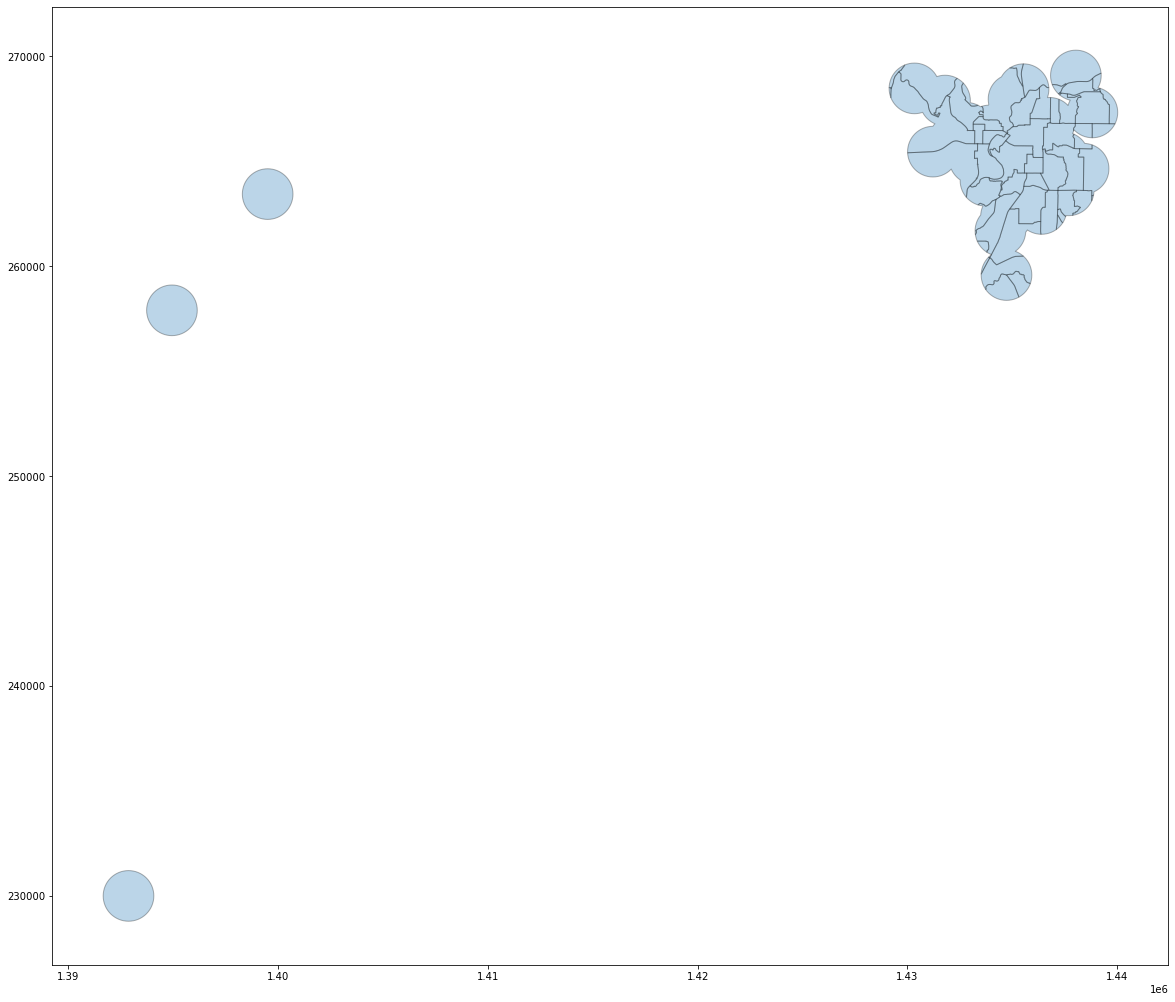

In [1226]:
ax = buffer_clip_gender.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1227]:
 inter_gender=gpd.overlay(gdf1, buffer_clip_gender, how='intersection', make_valid=True, keep_geom_type=False)
 inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHYQM041  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        12   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        12   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        12   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        12   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        12   

   AHYQM042 AHYQM043  AHYQM044 AHYQM045 AHYQM046 AHYQM047 AHYQM048 AHYQM049  \
0        12       70        12       12       37       12       38       12   
1        12       70        12       12       37       12       38       12   
2        12       70        12       12       37       12       38       12   
3        12       70        12       12       37       12       38       12   
4        12       70        12       12       37       12       38       12   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 166 columns]

In [1228]:
inter_gender["buffered area"]=inter_gender.area
inter_gender['area factor']=inter_gender['buffered area']/inter_gender["Total block Area"]
inter_gender.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHYQM043  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        70   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        70   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        70   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        70   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        70   

   AHYQM044 AHYQM045  AHYQM046 AHYQM047 AHYQM048 AHYQM049  \
0        12       12        37       12       38       12   
1        12       12        37       12       38       12   
2        12       12        37       12       38       12   
3        12       12        37       12       38       12   
4        12       12        37       12       38       12   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 168 columns]

In [1229]:
#'AHYQE001',=total, 'AHYQE002'=male,AHYQE026=female
gender_filter=inter_gender.loc[:, ['osm_id_sensor', 'AHYQE001', 'AHYQE002', 'AHYQE026','area factor']]
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHYQE001  AHYQE002  AHYQE026  area factor
0     48381206.0       759       267       492     0.093773
1     49105950.0       759       267       492     0.995706
2     46094523.0       759       267       492     0.205081
3    186561286.0       759       267       492     1.000000
4     48381198.0       759       267       492     0.008729

In [1230]:
gender_filter.iloc[:, 1:4] = gender_filter.iloc[:, 1:4].mul(gender_filter['area factor'],axis=0)
gender_filter=gender_filter.drop(['area factor'],axis=1)
gender_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHYQE001    AHYQE002    AHYQE026
0     48381206.0   71.173812   25.037428   46.136384
1     49105950.0  755.741069  265.853578  489.887492
2     46094523.0  155.656487   54.756630  100.899858
3    186561286.0  759.000000  267.000000  492.000000
4     48381198.0    6.625490    2.330706    4.294784

In [1231]:
# Aggregate by ID
output_pct_gender=gender_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHYQE001     AHYQE002     AHYQE026
0      5369529.0  2114.657828  1015.740730  1098.917098
1      5369733.0  5732.391328  2962.940615  2769.450713
2      5369877.0  4213.695536  2060.336601  2153.358934
3      5371320.0  4076.444198  1937.487820  2138.956378
4      5372140.0  4554.991584  2229.853762  2325.137823

In [1232]:
# Calculate percentage of white and percentage of Black or African American 
output_pct_gender['pct_male']=(output_pct_gender['AHYQE002']/output_pct_gender['AHYQE001'])*100
output_pct_gender['pct_female']=(output_pct_gender['AHYQE026']/output_pct_gender['AHYQE001'])*100
output_pct_gender.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHYQE001     AHYQE002     AHYQE026   pct_male  pct_female
0      5369529.0  2114.657828  1015.740730  1098.917098  48.033337   51.966663
1      5369733.0  5732.391328  2962.940615  2769.450713  51.687689   48.312311
2      5369877.0  4213.695536  2060.336601  2153.358934  48.896191   51.103809
3      5371320.0  4076.444198  1937.487820  2138.956378  47.528869   52.471131
4      5372140.0  4554.991584  2229.853762  2325.137823  48.954070   51.045930

In [1233]:
output_pct_gender1=output_pct_gender.drop(['AHYQE001','AHYQE002','AHYQE026'],axis=1)
output_pct_gender1.columns=['osm_id','pct_male','pct_female']
output_pct_gender1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   pct_male  pct_female
0  5369529.0  48.033337   51.966663
1  5369733.0  51.687689   48.312311
2  5369877.0  48.896191   51.103809
3  5371320.0  47.528869   52.471131
4  5372140.0  48.954070   51.045930

# Number of Student (student access) and Education (pct of at least college education population)

In [1234]:
#edu=pd.read_csv("../input/oregon-sd-data/education.csv")
edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH04M016  AH04M017  AH04M018  \
0  Baker County        1      NaN     NaN  ...        21        57        17   
1  Baker County        1      NaN     NaN  ...        10        61        19   
2  Baker County        1      NaN     NaN  ...        23        45        41   
3  Baker County        1      NaN     NaN  ...        36        63        23   
4  Baker County        1      NaN     NaN  ...        12        98        34   

   AH04M019  AH04M020  AH04M021  AH04M022  AH04M023  AH04M024  AH04M025  
0        24        66        29        26        13        12         3  
1        35        53        38        23        41        11         2  
2        35        76        37        72        43        22        27  
3        58        30        92        90        36        30        22  
4        46        66        24        87        23        14        12  

[5 rows x 88 columns]

In [1235]:
edu1=pd.merge(bg_proj, edu, left_on='GISJOIN', right_on='GISJOIN', how='left')
edu1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AH04M016 AH04M017 AH04M018  \
0        S  2.205986e+09  13837275.0  ...       21       57       17   
1        S  1.926901e+08     12317.0  ...       10       61       19   
2        S  4.723892e+08    639439.0  ...       23       45       41   
3        S  1.469016e+07         0.0  ...       36       63       23   
4        S  1.009492e+06         0.0  ...       12       98       34   

   AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
0        24        66       29        26       13        12         3  
1        35        53       38        23       41        11         2  
2        35        76       37        72       43        22        27  
3        58        30       92        90       36        30        22  
4        46        66       24        87       23        14        12  

[5 rows x 104 columns]

In [1236]:
# Clip the data using GeoPandas clip
buffer_clip_edu = gpd.clip(edu1, gdf1)
buffer_clip_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
463      41      017  000100        1  410170001001  Block Group 1  G5030   
464      41      017  000200        1  410170002001  Block Group 1  G5030   
472      41      017  000401        1  410170004011  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
484      41      017  000600        3  410170006003  Block Group 3  G5030   

    FUNCSTAT         ALAND      AWATER  ... AH04M016 AH04M017 AH04M018  \
463        S  3.456667e+09  10508561.0  ...       13      117       49   
464        S  7.320863e+08  66252592.0  ...       40      157       90   
472        S  1.073417e+08     23461.0  ...       31      218       55   
477        S  1.625080e+09  14851164.0  ...       42      111       68   
484        S  4.033715e+07         0.0  ...       12       47       30   

     AH04M019  AH04M020 AH04M021  AH04M022 AH04M023  AH04M024  AH04M025  
463        36        66       43        64       47        25        27  
464        59       213       67        99       53        23        24  
472        74       130      112        79       64        27        12  
477        48       144       37       107       59        28        12  
484        68        88       38       131       59       119       151  

[5 rows x 104 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


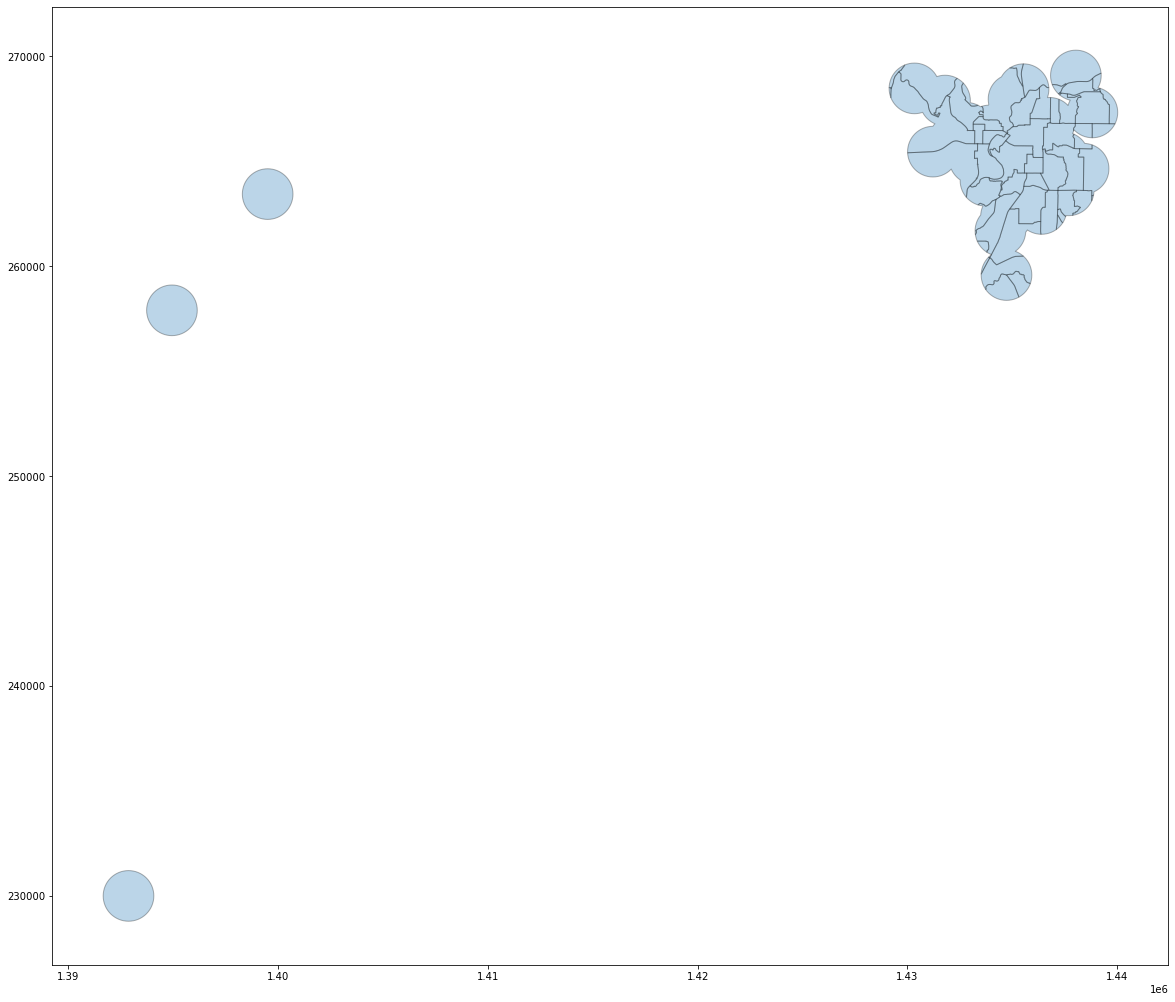

In [1237]:
ax = buffer_clip_edu.plot(figsize=(20, 20), alpha=0.3, edgecolor='k')

In [1238]:
inter_edu=gpd.overlay(gdf1, buffer_clip_edu, how='intersection', make_valid=True, keep_geom_type=False)
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH04M017  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        48   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        48   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        48   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        48   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        48   

   AH04M018 AH04M019  AH04M020 AH04M021 AH04M022 AH04M023 AH04M024 AH04M025  \
0        12       12       101       45      162       71       12       12   
1        12       12       101       45      162       71       12       12   
2        12       12       101       45      162       71       12       12   
3        12       12       101       45      162       71       12       12   
4        12       12       101       45      162       71       12       12   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 118 columns]

In [1239]:
inter_edu["buffered area"]=inter_edu.area
inter_edu['area factor']=inter_edu['buffered area']/inter_edu["Total block Area"]
inter_edu.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH04M019  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        12   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        12   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        12   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        12   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        12   

   AH04M020 AH04M021  AH04M022 AH04M023 AH04M024 AH04M025  \
0       101       45       162       71       12       12   
1       101       45       162       71       12       12   
2       101       45       162       71       12       12   
3       101       45       162       71       12       12   
4       101       45       162       71       12       12   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 120 columns]

In [1240]:
# AH04E001,=total, AH04E019:    Some college, less than 1 year
#AH04E020:    Some college, 1 or more years, no degree
#        AH04E021:    Associate's degree
#        AH04E022:    Bachelor's degree
#        AH04E023:    Master's degree
#        AH04E024:    Professional school degree
#        AH04E025:    Doctorate degree

edu_filter=inter_edu.loc[:, ['osm_id_sensor', 'AH04E001', 'AH04E019','AH04E020','AH04E021', 'AH04E022','AH04E023','AH04E024','AH04E025','area factor']]
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH04E001  AH04E019  AH04E020  AH04E021  AH04E022  AH04E023  \
0     48381206.0       523         0        80        21       199        58   
1     49105950.0       523         0        80        21       199        58   
2     46094523.0       523         0        80        21       199        58   
3    186561286.0       523         0        80        21       199        58   
4     48381198.0       523         0        80        21       199        58   

   AH04E024  AH04E025  area factor  
0         0         0     0.093773  
1         0         0     0.995706  
2         0         0     0.205081  
3         0         0     1.000000  
4         0         0     0.008729

In [1241]:
edu_filter.iloc[:, 1:9] = edu_filter.iloc[:, 1:9].mul(edu_filter['area factor'],axis=0)
edu_filter=edu_filter.drop(['area factor'],axis=1)
edu_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH04E001  AH04E019   AH04E020   AH04E021    AH04E022  \
0     48381206.0   49.043352       0.0   7.501851   1.969236   18.660855   
1     49105950.0  520.754386       0.0  79.656503  20.909832  198.145550   
2     46094523.0  107.257369       0.0  16.406481   4.306701   40.811121   
3    186561286.0  523.000000       0.0  80.000000  21.000000  199.000000   
4     48381198.0    4.565390       0.0   0.698339   0.183314    1.737118   

    AH04E023  AH04E024  AH04E025  
0   5.438842       0.0       0.0  
1  57.750964       0.0       0.0  
2  11.894699       0.0       0.0  
3  58.000000       0.0       0.0  
4   0.506296       0.0       0.0

In [1242]:
# Aggregate by ID
output_pct_edu=edu_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH04E001    AH04E019    AH04E020    AH04E021    AH04E022  \
0      5369529.0  1474.684980  122.489011  154.119944  169.599735  494.057345   
1      5369733.0  3894.236908  186.890644  725.667507  480.903119  935.200250   
2      5369877.0  3149.065066  212.343476  571.598830  249.013160  892.007327   
3      5371320.0  2620.349942  204.034397  507.466318  346.084751  782.809356   
4      5372140.0  3169.851515  188.457148  574.545389  270.454448  722.602934   

     AH04E023   AH04E024   AH04E025  
0  283.740856  77.186678  22.862319  
1  362.701123  39.620308  15.563775  
2  428.764943  50.469664  32.218960  
3  189.432965  53.200001  30.372084  
4  364.845887  31.778609  31.903649

# Number of students 

In [1243]:
scll.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALV5M010  ALV5M011  ALV5M012  \
0  Baker County        1      NaN  ...         4         5        18   
1  Baker County        1      NaN  ...        17        18         5   
2  Baker County        1      NaN  ...        16        21        11   
3  Baker County        1      NaN  ...         6        73        46   
4  Baker County        1      NaN  ...        12        18        12   

   ALV5M013  ALV5M014  ALV5M015  ALV5M016  ALV5M017  ALV5M018  ALV5M019  
0        12        12        14        12         4        12       130  
1        12        12         7        12        12        10       116  
2        12         7        21         7        21        18       168  
3        22        23        12        11        30        37       153  
4        12        53        12        40        53        12       178  

[5 rows x 82 columns]

In [1244]:
scl1=pd.merge(bg_proj, scll, left_on='GISJOIN', right_on='GISJOIN', how='left')
scl1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
0        S  2.205986e+09  13837275.0  ...        4        5       18   
1        S  1.926901e+08     12317.0  ...       17       18        5   
2        S  4.723892e+08    639439.0  ...       16       21       11   
3        S  1.469016e+07         0.0  ...        6       73       46   
4        S  1.009492e+06         0.0  ...       12       18       12   

   ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
0        12        12       14        12        4       12       130  
1        12        12        7        12       12       10       116  
2        12         7       21         7       21       18       168  
3        22        23       12        11       30       37       153  
4        12        53       12        40       53       12       178  

[5 rows x 98 columns]

In [1245]:
# Clip the data using GeoPandas clip
buffer_clip_scl = gpd.clip(scl1, gdf1)
buffer_clip_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE       GEOID_x       NAMELSAD  MTFCC  \
463      41      017  000100        1  410170001001  Block Group 1  G5030   
464      41      017  000200        1  410170002001  Block Group 1  G5030   
472      41      017  000401        1  410170004011  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
484      41      017  000600        3  410170006003  Block Group 3  G5030   

    FUNCSTAT         ALAND      AWATER  ... ALV5M010 ALV5M011 ALV5M012  \
463        S  3.456667e+09  10508561.0  ...       13       13       28   
464        S  7.320863e+08  66252592.0  ...       12       12       36   
472        S  1.073417e+08     23461.0  ...       12       20       21   
477        S  1.625080e+09  14851164.0  ...       12       12       23   
484        S  4.033715e+07         0.0  ...       20       12       14   

     ALV5M013  ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018  ALV5M019  
463        11        10       38        13       23       12       130  
464        31        12       12        12       70       12       273  
472        78        26       21        42       63       35       382  
477        12        12        7        30       50       25       301  
484        12        15       36        12       31       23       241  

[5 rows x 98 columns]

In [1246]:
inter_scl=gpd.overlay(gdf1, buffer_clip_scl, how='intersection', make_valid=True, keep_geom_type=False)
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M011  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        12   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        12   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        12   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        12   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        12   

   ALV5M012 ALV5M013  ALV5M014 ALV5M015 ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0        12       12        12       12       12       12       12      357   
1        12       12        12       12       12       12       12      357   
2        12       12        12       12       12       12       12      357   
3        12       12        12       12       12       12       12      357   
4        12       12        12       12       12       12       12      357   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 112 columns]

In [1247]:
inter_scl["buffered area"]=inter_scl.area
inter_scl['area factor']=inter_scl['buffered area']/inter_scl["Total block Area"]
inter_scl.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALV5M013  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        12   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        12   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        12   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        12   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        12   

   ALV5M014 ALV5M015  ALV5M016 ALV5M017 ALV5M018 ALV5M019  \
0        12       12        12       12       12      357   
1        12       12        12       12       12      357   
2        12       12        12       12       12      357   
3        12       12        12       12       12      357   
4        12       12        12       12       12      357   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 114 columns]

In [1248]:
scl_filter=inter_scl.loc[:, ['osm_id_sensor', 'ALV5E001', 'ALV5E017', 'ALV5E018','area factor']]
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALV5E001  ALV5E017  ALV5E018  area factor
0     48381206.0       929         0         0     0.093773
1     49105950.0       929         0         0     0.995706
2     46094523.0       929         0         0     0.205081
3    186561286.0       929         0         0     1.000000
4     48381198.0       929         0         0     0.008729

In [1249]:
scl_filter.iloc[:, 1:4] = scl_filter.iloc[:, 1:4].mul(scl_filter['area factor'],axis=0)
scl_filter=scl_filter.drop(['area factor'],axis=1)
scl_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALV5E001  ALV5E017  ALV5E018
0     48381206.0   87.115246       0.0       0.0
1     49105950.0  925.011137       0.0       0.0
2     46094523.0  190.520259       0.0       0.0
3    186561286.0  929.000000       0.0       0.0
4     48381198.0    8.109460       0.0       0.0

In [1250]:
scl_filter['total student']=scl_filter['ALV5E017']+scl_filter['ALV5E018']
output_student=scl_filter.loc[:,['osm_id_sensor','total student']]
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0     48381206.0            0.0
1     49105950.0            0.0
2     46094523.0            0.0
3    186561286.0            0.0
4     48381198.0            0.0

In [1251]:
output_student=output_student.groupby('osm_id_sensor', as_index=False).sum()
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  total student
0      5369529.0     104.343099
1      5369733.0     453.839099
2      5369877.0     200.799784
3      5371320.0     201.644112
4      5372140.0     324.360581

In [1252]:
output_student.columns=['osm_id', 'Student Access']
output_student.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Student Access
0  5369529.0      104.343099
1  5369733.0      453.839099
2  5369877.0      200.799784
3  5371320.0      201.644112
4  5372140.0      324.360581

In [1253]:
#pd.DataFrame.to_csv(output_student, 'Air_student_Be2019_update_2.0_mile.csv',sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Education ( pct of at least college population)

In [1254]:
# Calculate percentage of education 
output_pct_edu['total_at_least_college_education']=output_pct_edu.iloc[:,2:9].sum(axis=1)
output_pct_edu.head()

osm_id_sensor     AH04E001    AH04E019    AH04E020    AH04E021    AH04E022  \
0      5369529.0  1474.684980  122.489011  154.119944  169.599735  494.057345   
1      5369733.0  3894.236908  186.890644  725.667507  480.903119  935.200250   
2      5369877.0  3149.065066  212.343476  571.598830  249.013160  892.007327   
3      5371320.0  2620.349942  204.034397  507.466318  346.084751  782.809356   
4      5372140.0  3169.851515  188.457148  574.545389  270.454448  722.602934   

     AH04E023   AH04E024   AH04E025  total_at_least_college_education  
0  283.740856  77.186678  22.862319                       1324.055888  
1  362.701123  39.620308  15.563775                       2746.546726  
2  428.764943  50.469664  32.218960                       2436.416360  
3  189.432965  53.200001  30.372084                       2113.399872  
4  364.845887  31.778609  31.903649                       2184.588063

In [1255]:
output_pct_edu['pct_at_least_college_education']=(output_pct_edu['total_at_least_college_education']/output_pct_edu['AH04E001'])*100
output_pct_edu.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH04E001    AH04E019    AH04E020    AH04E021    AH04E022  \
0      5369529.0  1474.684980  122.489011  154.119944  169.599735  494.057345   
1      5369733.0  3894.236908  186.890644  725.667507  480.903119  935.200250   
2      5369877.0  3149.065066  212.343476  571.598830  249.013160  892.007327   
3      5371320.0  2620.349942  204.034397  507.466318  346.084751  782.809356   
4      5372140.0  3169.851515  188.457148  574.545389  270.454448  722.602934   

     AH04E023   AH04E024   AH04E025  total_at_least_college_education  \
0  283.740856  77.186678  22.862319                       1324.055888   
1  362.701123  39.620308  15.563775                       2746.546726   
2  428.764943  50.469664  32.218960                       2436.416360   
3  189.432965  53.200001  30.372084                       2113.399872   
4  364.845887  31.778609  31.903649                       2184.588063   

   pct_at_least_college_education  
0                       89.785677  
1                       70.528496  
2                       77.369515  
3                       80.653345  
4                       68.917678

In [1256]:
output_pct_edu1=output_pct_edu.loc[:,['osm_id_sensor','pct_at_least_college_education']]
output_pct_edu1.columns=['osm_id','pct_at_least_college_education']
output_pct_edu1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  pct_at_least_college_education
0  5369529.0                       89.785677
1  5369733.0                       70.528496
2  5369877.0                       77.369515
3  5371320.0                       80.653345
4  5372140.0                       68.917678

# Median Age

In [1257]:
#age=pd.read_csv("../input/oregon-sd-data/median_age.csv")
age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  BTTRA  BTBGA  \
0  Baker County        1      NaN     NaN  ...    NaN    NaN   
1  Baker County        1      NaN     NaN  ...    NaN    NaN   
2  Baker County        1      NaN     NaN  ...    NaN    NaN   
3  Baker County        1      NaN     NaN  ...    NaN    NaN   
4  Baker County        1      NaN     NaN  ...    NaN    NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

   AHYRE003                                             NAME_M  AHYRM001  \
0      50.9  Block Group 1, Census Tract 9501, Baker County...       5.3   
1      45.7  Block Group 2, Census Tract 9501, Baker County...      13.5   
2      54.5  Block Group 3, Census Tract 9501, Baker County...       7.7   
3      48.0  Block Group 1, Census Tract 9502, Baker County...      10.5   
4      43.5  Block Group 2, Census Tract 9502, Baker County...      11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 44 columns]

In [1258]:
age1=pd.merge(bg_proj, age, left_on='GISJOIN', right_on='GISJOIN', how='left')
age1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... BTTRA BTBGA  \
0        S  2.205986e+09  13837275.0  ...   NaN   NaN   
1        S  1.926901e+08     12317.0  ...   NaN   NaN   
2        S  4.723892e+08    639439.0  ...   NaN   NaN   
3        S  1.469016e+07         0.0  ...   NaN   NaN   
4        S  1.009492e+06         0.0  ...   NaN   NaN   

                                              NAME_E  AHYRE001  AHYRE002  \
0  Block Group 1, Census Tract 9501, Baker County...      55.6      58.3   
1  Block Group 2, Census Tract 9501, Baker County...      46.1      48.2   
2  Block Group 3, Census Tract 9501, Baker County...      54.8      55.3   
3  Block Group 1, Census Tract 9502, Baker County...      47.9      45.8   
4  Block Group 2, Census Tract 9502, Baker County...      40.6      33.2   

  AHYRE003                                             NAME_M AHYRM001  \
0     50.9  Block Group 1, Census Tract 9501, Baker County...      5.3   
1     45.7  Block Group 2, Census Tract 9501, Baker County...     13.5   
2     54.5  Block Group 3, Census Tract 9501, Baker County...      7.7   
3     48.0  Block Group 1, Census Tract 9502, Baker County...     10.5   
4     43.5  Block Group 2, Census Tract 9502, Baker County...     11.8   

   AHYRM002  AHYRM003  
0       2.7      10.6  
1      16.4      17.6  
2       9.1      11.4  
3      23.0       9.2  
4      16.1      10.4  

[5 rows x 60 columns]

In [1259]:
# Clip the data using GeoPandas clip
buffer_clip_age = gpd.clip(age1, gdf1)
buffer_clip_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
463      41      017  000100        1  410170001001  Block Group 1  G5030   
464      41      017  000200        1  410170002001  Block Group 1  G5030   
472      41      017  000401        1  410170004011  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
484      41      017  000600        3  410170006003  Block Group 3  G5030   

    FUNCSTAT         ALAND      AWATER  ... BTTRA BTBGA  \
463        S  3.456667e+09  10508561.0  ...   NaN   NaN   
464        S  7.320863e+08  66252592.0  ...   NaN   NaN   
472        S  1.073417e+08     23461.0  ...   NaN   NaN   
477        S  1.625080e+09  14851164.0  ...   NaN   NaN   
484        S  4.033715e+07         0.0  ...   NaN   NaN   

                                                NAME_E  AHYRE001  AHYRE002  \
463  Block Group 1, Census Tract 1, Deschutes Count...      55.2      57.2   
464  Block Group 1, Census Tract 2, Deschutes Count...      61.6      66.3   
472  Block Group 1, Census Tract 4.01, Deschutes Co...      40.5      39.0   
477  Block Group 1, Census Tract 5, Deschutes Count...      53.5      52.8   
484  Block Group 3, Census Tract 6, Deschutes Count...      56.3      56.6   

    AHYRE003                                             NAME_M AHYRM001  \
463     54.8  Block Group 1, Census Tract 1, Deschutes Count...      3.3   
464     60.9  Block Group 1, Census Tract 2, Deschutes Count...      6.5   
472     42.7  Block Group 1, Census Tract 4.01, Deschutes Co...      5.2   
477     53.6  Block Group 1, Census Tract 5, Deschutes Count...      9.4   
484     55.4  Block Group 3, Census Tract 6, Deschutes Count...      5.1   

     AHYRM002  AHYRM003  
463       5.8       2.3  
464       4.1       3.1  
472       5.4       8.9  
477      13.6       9.2  
484       5.0      10.8  

[5 rows x 60 columns]

In [1260]:
inter_age=gpd.overlay(gdf1, buffer_clip_age, how='intersection', make_valid=True, keep_geom_type=False)
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  BTBGA  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...    NaN   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...    NaN   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...    NaN   
3             3.0   33.092525  12.986301   3.260274    596.0  ...    NaN   
4             3.0   52.937398   1.726027   0.547945    920.0  ...    NaN   

                                              NAME_E AHYRE001  AHYRE002  \
0  Block Group 5, Census Tract 13, Deschutes Coun...     47.0      51.5   
1  Block Group 5, Census Tract 13, Deschutes Coun...     47.0      51.5   
2  Block Group 5, Census Tract 13, Deschutes Coun...     47.0      51.5   
3  Block Group 5, Census Tract 13, Deschutes Coun...     47.0      51.5   
4  Block Group 5, Census Tract 13, Deschutes Coun...     47.0      51.5   

  AHYRE003                                             NAME_M AHYRM001  \
0     30.7  Block Group 5, Census Tract 13, Deschutes Coun...     21.0   
1     30.7  Block Group 5, Census Tract 13, Deschutes Coun...     21.0   
2     30.7  Block Group 5, Census Tract 13, Deschutes Coun...     21.0   
3     30.7  Block Group 5, Census Tract 13, Deschutes Coun...     21.0   
4     30.7  Block Group 5, Census Tract 13, Deschutes Coun...     21.0   

  AHYRM002 AHYRM003                                           geometry  
0      3.7     19.4  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1      3.7     19.4  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2      3.7     19.4  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3      3.7     19.4  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4      3.7     19.4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 74 columns]

In [1261]:
inter_age["buffered area"]=inter_age.area
inter_age['area factor']=inter_age['buffered area']/inter_age["Total block Area"]
inter_age.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHYRE001  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...      47.0   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...      47.0   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...      47.0   
3             3.0   33.092525  12.986301   3.260274    596.0  ...      47.0   
4             3.0   52.937398   1.726027   0.547945    920.0  ...      47.0   

   AHYRE002 AHYRE003                                             NAME_M  \
0      51.5     30.7  Block Group 5, Census Tract 13, Deschutes Coun...   
1      51.5     30.7  Block Group 5, Census Tract 13, Deschutes Coun...   
2      51.5     30.7  Block Group 5, Census Tract 13, Deschutes Coun...   
3      51.5     30.7  Block Group 5, Census Tract 13, Deschutes Coun...   
4      51.5     30.7  Block Group 5, Census Tract 13, Deschutes Coun...   

  AHYRM001 AHYRM002 AHYRM003  \
0     21.0      3.7     19.4   
1     21.0      3.7     19.4   
2     21.0      3.7     19.4   
3     21.0      3.7     19.4   
4     21.0      3.7     19.4   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 76 columns]

In [1262]:
#    NHGIS code:  AHYR
#        AHYRE001:    Median age: Total
#        AHYRE002:    Median age: Male
#        AHYRE003:    Median age: Female
age_filter=inter_age.loc[:, ['osm_id_sensor','GEOID','AHYRE001']]
age_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHYRE001
0     48381206.0  410170013005      47.0
1     49105950.0  410170013005      47.0
2     46094523.0  410170013005      47.0
3    186561286.0  410170013005      47.0
4     48381198.0  410170013005      47.0

In [1263]:
#age_filter.iloc[:, 1:2] = age_filter.iloc[:, 1:2].mul(age_filter['area factor'],axis=0)
#age_filter=age_filter.drop(['area factor'],axis=1)
#age_filter

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1264]:
# Aggregate by ID
#output_median_age=age_filter.groupby('ID', as_index=False).mean()
#output_median_age

In [1265]:
#output_median_age.columns=['ID', 'Median_Age']
#output_median_age

# Median HH_income

In [1266]:
#income=pd.read_csv("../input/oregon-sd-data/median_hh_income.csv")
income.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  SDELMA  SDSECA  SDUNIA  \
0  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
1  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
2  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
3  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   
4  Baker County        1      NaN     NaN  ...     NaN     NaN     NaN   

   PUMA5A  BTTRA  BTBGA                                             NAME_E  \
0     NaN    NaN    NaN  Block Group 1, Census Tract 9501, Baker County...   
1     NaN    NaN    NaN  Block Group 2, Census Tract 9501, Baker County...   
2     NaN    NaN    NaN  Block Group 3, Census Tract 9501, Baker County...   
3     NaN    NaN    NaN  Block Group 1, Census Tract 9502, Baker County...   
4     NaN    NaN    NaN  Block Group 2, Census Tract 9502, Baker County...   

   AH1PE001                                             NAME_M  AH1PM001  
0   40156.0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1   34000.0  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2   62266.0  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3   78558.0  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4   43625.0  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 40 columns]

In [1267]:
income1=pd.merge(bg_proj, income, left_on='GISJOIN', right_on='GISJOIN', how='left')
income1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  BTTRA  \
0        S  2.205986e+09  13837275.0  ...    NaN    NaN    NaN     NaN    NaN   
1        S  1.926901e+08     12317.0  ...    NaN    NaN    NaN     NaN    NaN   
2        S  4.723892e+08    639439.0  ...    NaN    NaN    NaN     NaN    NaN   
3        S  1.469016e+07         0.0  ...    NaN    NaN    NaN     NaN    NaN   
4        S  1.009492e+06         0.0  ...    NaN    NaN    NaN     NaN    NaN   

  BTBGA                                             NAME_E AH1PE001  \
0   NaN  Block Group 1, Census Tract 9501, Baker County...  40156.0   
1   NaN  Block Group 2, Census Tract 9501, Baker County...  34000.0   
2   NaN  Block Group 3, Census Tract 9501, Baker County...  62266.0   
3   NaN  Block Group 1, Census Tract 9502, Baker County...  78558.0   
4   NaN  Block Group 2, Census Tract 9502, Baker County...  43625.0   

                                              NAME_M  AH1PM001  
0  Block Group 1, Census Tract 9501, Baker County...    9365.0  
1  Block Group 2, Census Tract 9501, Baker County...   13959.0  
2  Block Group 3, Census Tract 9501, Baker County...   11854.0  
3  Block Group 1, Census Tract 9502, Baker County...   26558.0  
4  Block Group 2, Census Tract 9502, Baker County...    9086.0  

[5 rows x 56 columns]

In [1268]:
# Clip the data using GeoPandas clip
buffer_clip_income = gpd.clip(income1, gdf1)
buffer_clip_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
463      41      017  000100        1  410170001001  Block Group 1  G5030   
464      41      017  000200        1  410170002001  Block Group 1  G5030   
472      41      017  000401        1  410170004011  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
484      41      017  000600        3  410170006003  Block Group 3  G5030   

    FUNCSTAT         ALAND      AWATER  ... SDELMA SDSECA SDUNIA  PUMA5A  \
463        S  3.456667e+09  10508561.0  ...    NaN    NaN    NaN     NaN   
464        S  7.320863e+08  66252592.0  ...    NaN    NaN    NaN     NaN   
472        S  1.073417e+08     23461.0  ...    NaN    NaN    NaN     NaN   
477        S  1.625080e+09  14851164.0  ...    NaN    NaN    NaN     NaN   
484        S  4.033715e+07         0.0  ...    NaN    NaN    NaN     NaN   

     BTTRA BTBGA                                             NAME_E AH1PE001  \
463    NaN   NaN  Block Group 1, Census Tract 1, Deschutes Count...  99722.0   
464    NaN   NaN  Block Group 1, Census Tract 2, Deschutes Count...  49583.0   
472    NaN   NaN  Block Group 1, Census Tract 4.01, Deschutes Co...  54167.0   
477    NaN   NaN  Block Group 1, Census Tract 5, Deschutes Count...  57750.0   
484    NaN   NaN  Block Group 3, Census Tract 6, Deschutes Count...  87634.0   

                                                NAME_M  AH1PM001  
463  Block Group 1, Census Tract 1, Deschutes Count...   19058.0  
464  Block Group 1, Census Tract 2, Deschutes Count...   24893.0  
472  Block Group 1, Census Tract 4.01, Deschutes Co...   12299.0  
477  Block Group 1, Census Tract 5, Deschutes Count...   30741.0  
484  Block Group 3, Census Tract 6, Deschutes Count...   30028.0  

[5 rows x 56 columns]

In [1269]:
inter_income=gpd.overlay(gdf1, buffer_clip_income, how='intersection', make_valid=True, keep_geom_type=False)
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...     NaN   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...     NaN   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...     NaN   
3             3.0   33.092525  12.986301   3.260274    596.0  ...     NaN   
4             3.0   52.937398   1.726027   0.547945    920.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AH1PE001  \
0  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
1  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
2  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
3  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
4  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   

                                              NAME_M AH1PM001  \
0  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
1  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
2  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
3  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
4  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 70 columns]

In [1270]:
inter_income["buffered area"]=inter_income.area
inter_income['area factor']=inter_income['buffered area']/inter_income["Total block Area"]
inter_income.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...     NaN   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...     NaN   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...     NaN   
3             3.0   33.092525  12.986301   3.260274    596.0  ...     NaN   
4             3.0   52.937398   1.726027   0.547945    920.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AH1PE001  \
0    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
1    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
2    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
3    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
4    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   

                                              NAME_M AH1PM001  \
0  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
1  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
2  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
3  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   
4  Block Group 5, Census Tract 13, Deschutes Coun...      NaN   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 72 columns]

In [1271]:
#    Table 1:     Median Household Income in the Past 12 Months (in 2017 Inflation-Adjusted Dollars)
#    Universe:    Households
 #   Source code: B19013
 #   NHGIS code:  AH1P
 #       AH1PE001:    Median household income in the past 12 months (in 2017 inflation-adjusted dollars
income_filter=inter_income.loc[:, ['osm_id_sensor','GEOID', 'AH1PE001','area factor']]
income_filter.head(5)

# See rest of the part after hh density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor
0     48381206.0  410170013005       NaN     0.093773
1     49105950.0  410170013005       NaN     0.995706
2     46094523.0  410170013005       NaN     0.205081
3    186561286.0  410170013005       NaN     1.000000
4     48381198.0  410170013005       NaN     0.008729

In [1272]:
#income_filter.iloc[:, 2:3] = income_filter.iloc[:, 2:3].mul(income_filter['area factor'],axis=0)
#income_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# HH_density

In [1273]:
#hhdensity=pd.read_csv("../input/oregon-sd-data/household_type.csv")
hhdensity.head(5)

GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  \
0  Baker County        1      NaN     NaN  ...   
1  Baker County        1      NaN     NaN  ...   
2  Baker County        1      NaN     NaN  ...   
3  Baker County        1      NaN     NaN  ...   
4  Baker County        1      NaN     NaN  ...   

                                              NAME_M  AHZZM001  AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...        70        65   
1  Block Group 2, Census Tract 9501, Baker County...        69        49   
2  Block Group 3, Census Tract 9501, Baker County...        61        63   
3  Block Group 1, Census Tract 9502, Baker County...        80        80   
4  Block Group 2, Census Tract 9502, Baker County...        85        69   

   AHZZM003  AHZZM004  AHZZM005  AHZZM006  AHZZM007  AHZZM008  AHZZM009  
0        67         7         2         7        53        47        19  
1        49        32        17        28        62        61        12  
2        63        37         8        37        36        29        23  
3        78        35        12        35        33        33        12  
4        69        38        38        24        82        78        21  

[5 rows x 56 columns]

In [1274]:
hhdensity1=pd.merge(bg_proj, hhdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ...  \
0        S  2.205986e+09  13837275.0  ...   
1        S  1.926901e+08     12317.0  ...   
2        S  4.723892e+08    639439.0  ...   
3        S  1.469016e+07         0.0  ...   
4        S  1.009492e+06         0.0  ...   

                                              NAME_M AHZZM001 AHZZM002  \
0  Block Group 1, Census Tract 9501, Baker County...       70       65   
1  Block Group 2, Census Tract 9501, Baker County...       69       49   
2  Block Group 3, Census Tract 9501, Baker County...       61       63   
3  Block Group 1, Census Tract 9502, Baker County...       80       80   
4  Block Group 2, Census Tract 9502, Baker County...       85       69   

   AHZZM003  AHZZM004 AHZZM005  AHZZM006 AHZZM007  AHZZM008  AHZZM009  
0        67         7        2         7       53        47        19  
1        49        32       17        28       62        61        12  
2        63        37        8        37       36        29        23  
3        78        35       12        35       33        33        12  
4        69        38       38        24       82        78        21  

[5 rows x 72 columns]

In [1275]:
hhdensity1['Total Block HH']=hhdensity1.AHZZE001
hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
0      41      001  950100        1  410019501001  Block Group 1  G5030   
1      41      001  950100        2  410019501002  Block Group 2  G5030   
2      41      001  950100        3  410019501003  Block Group 3  G5030   
3      41      001  950200        1  410019502001  Block Group 1  G5030   
4      41      001  950200        2  410019502002  Block Group 2  G5030   

  FUNCSTAT         ALAND      AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
0        S  2.205986e+09  13837275.0  ...       70       65       67   
1        S  1.926901e+08     12317.0  ...       69       49       49   
2        S  4.723892e+08    639439.0  ...       61       63       63   
3        S  1.469016e+07         0.0  ...       80       80       78   
4        S  1.009492e+06         0.0  ...       85       69       69   

   AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
0         7         2        7        53       47        19             448  
1        32        17       28        62       61        12             402  
2        37         8       37        36       29        23             448  
3        35        12       35        33       33        12             439  
4        38        38       24        82       78        21             447  

[5 rows x 73 columns]

In [1276]:
# Clip the data using GeoPandas clip
buffer_clip_hhdensity1 = gpd.clip(hhdensity1, gdf1)
buffer_clip_hhdensity1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP COUNTYFP TRACTCE BLKGRPCE         GEOID       NAMELSAD  MTFCC  \
463      41      017  000100        1  410170001001  Block Group 1  G5030   
464      41      017  000200        1  410170002001  Block Group 1  G5030   
472      41      017  000401        1  410170004011  Block Group 1  G5030   
477      41      017  000500        1  410170005001  Block Group 1  G5030   
484      41      017  000600        3  410170006003  Block Group 3  G5030   

    FUNCSTAT         ALAND      AWATER  ... AHZZM001 AHZZM002 AHZZM003  \
463        S  3.456667e+09  10508561.0  ...       60       67       68   
464        S  7.320863e+08  66252592.0  ...      173      117      119   
472        S  1.073417e+08     23461.0  ...      121      121      126   
477        S  1.625080e+09  14851164.0  ...      146      158      159   
484        S  4.033715e+07         0.0  ...      128      117      115   

     AHZZM004  AHZZM005 AHZZM006  AHZZM007 AHZZM008  AHZZM009  Total Block HH  
463        17        15        8        47       47        25             740  
464        34        24       28       144      123        77             764  
472        54        47       42       112       94        83            1232  
477        49        27       41        84       84        12             585  
484        45        12       45       100       59        88             557  

[5 rows x 73 columns]

In [1277]:
inter_hhdensity=gpd.overlay(gdf1, buffer_clip_hhdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHZZM002  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...       128   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...       128   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...       128   
3             3.0   33.092525  12.986301   3.260274    596.0  ...       128   
4             3.0   52.937398   1.726027   0.547945    920.0  ...       128   

   AHZZM003 AHZZM004  AHZZM005 AHZZM006 AHZZM007 AHZZM008 AHZZM009  \
0       122       48        12       48       73       73       12   
1       122       48        12       48       73       73       12   
2       122       48        12       48       73       73       12   
3       122       48        12       48       73       73       12   
4       122       48        12       48       73       73       12   

  Total Block HH                                           geometry  
0            306  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1            306  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2            306  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3            306  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4            306  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 87 columns]

In [1278]:
inter_hhdensity["buffered area"]=inter_hhdensity.area
inter_hhdensity['area factor']=inter_hhdensity['buffered area']/inter_hhdensity["Total block Area"]
inter_hhdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AHZZM004  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        48   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        48   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        48   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        48   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        48   

   AHZZM005 AHZZM006  AHZZM007 AHZZM008 AHZZM009 Total Block HH  \
0        12       48        73       73       12            306   
1        12       48        73       73       12            306   
2        12       48        73       73       12            306   
3        12       48        73       73       12            306   
4        12       48        73       73       12            306   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 89 columns]

In [1279]:
# Aggregate by ID
hh=inter_hhdensity.loc[:,['osm_id_sensor',"GEOID","Total Block HH"]]
hh.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  Total Block HH
0     48381206.0  410170013005             306
1     49105950.0  410170013005             306
2     46094523.0  410170013005             306
3    186561286.0  410170013005             306
4     48381198.0  410170013005             306

In [1280]:
#    Table 1:     Household Type (Including Living Alone)
#    Universe:    Households
#    Source code: B11001
#    NHGIS code:  AHZZ
#        AHZZE001:    Total
#        AHZZE002:    Family households
#        AHZZE003:    Family households: Married-couple family
#        AHZZE004:    Family households: Other family
#        AHZZE005:    Family households: Other family: Male householder, no wife present
#        AHZZE006:    Family households: Other family: Female householder, no husband present
#        AHZZE007:    Nonfamily households
#        AHZZE008:    Nonfamily households: Householder living alone
#        AHZZE009:    Nonfamily households: Householder not living alone
hhdensity_filter=inter_hhdensity.loc[:, ['osm_id_sensor', 'GEOID','AHZZE001','area factor']]
hhdensity_filter
hh_factor=hhdensity_filter.copy()
hh_factor.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor
0     48381206.0  410170013005       306     0.093773
1     49105950.0  410170013005       306     0.995706
2     46094523.0  410170013005       306     0.205081
3    186561286.0  410170013005       306     1.000000
4     48381198.0  410170013005       306     0.008729

In [1281]:
hh_factor["buffered_hh"]=hh_factor['AHZZE001']*hh_factor['area factor']
hh_factor['hh factor']=hh_factor['buffered_hh']/hh_factor['AHZZE001']
hh_factor.head() # factor is basically same

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AHZZE001  area factor  buffered_hh  hh factor
0     48381206.0  410170013005       306     0.093773    28.694580   0.093773
1     49105950.0  410170013005       306     0.995706   304.686123   0.995706
2     46094523.0  410170013005       306     0.205081    62.754789   0.205081
3    186561286.0  410170013005       306     1.000000   306.000000   1.000000
4     48381198.0  410170013005       306     0.008729     2.671146   0.008729

In [1282]:
hh_factor1=hh_factor.loc[:,["osm_id_sensor","GEOID","buffered_hh"]]
hh_factor1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  buffered_hh
0     48381206.0  410170013005    28.694580
1     49105950.0  410170013005   304.686123
2     46094523.0  410170013005    62.754789
3    186561286.0  410170013005   306.000000
4     48381198.0  410170013005     2.671146

In [1283]:
hhdensity_filter.iloc[:, 2:3] = hhdensity_filter.iloc[:, 2:3].mul(hhdensity_filter['area factor'],axis=0)
hhdensity_filter=hhdensity_filter.drop(['area factor'],axis=1)
hhf=hhdensity_filter.copy()
hhdensity_filter.head()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHZZE001
0     48381206.0  410170013005   28.694580
1     49105950.0  410170013005  304.686123
2     46094523.0  410170013005   62.754789
3    186561286.0  410170013005  306.000000
4     48381198.0  410170013005    2.671146

In [1284]:
# Aggregate by ID
hhdensity_filter=hhdensity_filter.drop(["GEOID"],axis=1)
output_hhdensity=hhdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHZZE001
0      5369529.0   819.816520
1      5369733.0  2407.170607
2      5369877.0  2029.837249
3      5371320.0  1543.418711
4      5372140.0  2067.571478

In [1285]:
output_hhdensity.columns=['osm_id', 'Total_HH']
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Total_HH
0  5369529.0   819.816520
1  5369733.0  2407.170607
2  5369877.0  2029.837249
3  5371320.0  1543.418711
4  5372140.0  2067.571478

In [1286]:
output_hhdensity['HH_density']=output_hhdensity.Total_HH/(3.1416*size*size*3.86102e-7)
output_hhdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     Total_HH   HH_density
0  5369529.0   819.816520   463.920356
1  5369733.0  2407.170607  1362.177288
2  5369877.0  2029.837249  1148.650699
3  5371320.0  1543.418711   873.394644
4  5372140.0  2067.571478  1170.003863

In [1287]:
output_hhdensity1=output_hhdensity.loc[:, ['osm_id', 'HH_density']]
output_hhdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id   HH_density
0  5369529.0   463.920356
1  5369733.0  1362.177288
2  5369877.0  1148.650699
3  5371320.0   873.394644
4  5372140.0  1170.003863

# Weighted HH_income

In [1288]:
whh_income=pd.merge(income_filter, hh_factor1, on=['osm_id_sensor', 'GEOID'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh
0     48381206.0  410170013005       NaN     0.093773    28.694580
1     49105950.0  410170013005       NaN     0.995706   304.686123
2     46094523.0  410170013005       NaN     0.205081    62.754789
3    186561286.0  410170013005       NaN     1.000000   306.000000
4     48381198.0  410170013005       NaN     0.008729     2.671146

In [1289]:
whh_income['wt_incme']=whh_income['AH1PE001'].mul(whh_income['buffered_hh'])
whh_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID  AH1PE001  area factor  buffered_hh  wt_incme
0     48381206.0  410170013005       NaN     0.093773    28.694580       NaN
1     49105950.0  410170013005       NaN     0.995706   304.686123       NaN
2     46094523.0  410170013005       NaN     0.205081    62.754789       NaN
3    186561286.0  410170013005       NaN     1.000000   306.000000       NaN
4     48381198.0  410170013005       NaN     0.008729     2.671146       NaN

In [1290]:
income_filter=whh_income.drop(['GEOID','AH1PE001','area factor'],axis=1)
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh  wt_incme
0     48381206.0    28.694580       NaN
1     49105950.0   304.686123       NaN
2     46094523.0    62.754789       NaN
3    186561286.0   306.000000       NaN
4     48381198.0     2.671146       NaN

In [1291]:
# Aggregate by ID
income_filter=income_filter.groupby('osm_id_sensor', as_index=False).sum()
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme
0      5369529.0   819.816520  6.201952e+07
1      5369733.0  2407.170607  1.013582e+08
2      5369877.0  2029.837249  1.021530e+08
3      5371320.0  1543.418711  8.283810e+07
4      5372140.0  2067.571478  9.623963e+07

In [1292]:
income_filter['HH weighted income']=income_filter['wt_incme']/income_filter['buffered_hh']
income_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  buffered_hh      wt_incme  HH weighted income
0      5369529.0   819.816520  6.201952e+07        75650.493246
1      5369733.0  2407.170607  1.013582e+08        42106.783866
2      5369877.0  2029.837249  1.021530e+08        50325.714890
3      5371320.0  1543.418711  8.283810e+07        53671.827593
4      5372140.0  2067.571478  9.623963e+07        46547.183652

In [1293]:
output_income=income_filter.drop(['buffered_hh','wt_incme'],axis=1)
output_income.columns=['osm_id', 'Median_HH_income']
output_income.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median_HH_income
0  5369529.0      75650.493246
1  5369733.0      42106.783866
2  5369877.0      50325.714890
3  5371320.0      53671.827593
4  5372140.0      46547.183652

# Population Density

In [1294]:
#pdensity=pd.read_csv("../input/oregon-sd-data/population.csv")
pdensity1=pd.merge(bg_proj, pdensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_pdensity1 = gpd.clip(pdensity1, gdf1)
inter_pdensity=gpd.overlay(gdf1, buffer_clip_pdensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  SDSECA  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...     NaN   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...     NaN   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...     NaN   
3             3.0   33.092525  12.986301   3.260274    596.0  ...     NaN   
4             3.0   52.937398   1.726027   0.547945    920.0  ...     NaN   

   SDUNIA PUMA5A  BTTRA BTBGA  \
0     NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN   NaN   

                                              NAME_E AHY1E001  \
0  Block Group 5, Census Tract 13, Deschutes Coun...      759   
1  Block Group 5, Census Tract 13, Deschutes Coun...      759   
2  Block Group 5, Census Tract 13, Deschutes Coun...      759   
3  Block Group 5, Census Tract 13, Deschutes Coun...      759   
4  Block Group 5, Census Tract 13, Deschutes Coun...      759   

                                              NAME_M AHY1M001  \
0  Block Group 5, Census Tract 13, Deschutes Coun...      399   
1  Block Group 5, Census Tract 13, Deschutes Coun...      399   
2  Block Group 5, Census Tract 13, Deschutes Coun...      399   
3  Block Group 5, Census Tract 13, Deschutes Coun...      399   
4  Block Group 5, Census Tract 13, Deschutes Coun...      399   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 70 columns]

In [1295]:
inter_pdensity["buffered area"]=inter_pdensity.area
inter_pdensity['area factor']=inter_pdensity['buffered area']/inter_pdensity["Total block Area"]
inter_pdensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  PUMA5A  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...     NaN   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...     NaN   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...     NaN   
3             3.0   33.092525  12.986301   3.260274    596.0  ...     NaN   
4             3.0   52.937398   1.726027   0.547945    920.0  ...     NaN   

   BTTRA BTBGA                                             NAME_E AHY1E001  \
0    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      759   
1    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      759   
2    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      759   
3    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      759   
4    NaN   NaN  Block Group 5, Census Tract 13, Deschutes Coun...      759   

                                              NAME_M AHY1M001  \
0  Block Group 5, Census Tract 13, Deschutes Coun...      399   
1  Block Group 5, Census Tract 13, Deschutes Coun...      399   
2  Block Group 5, Census Tract 13, Deschutes Coun...      399   
3  Block Group 5, Census Tract 13, Deschutes Coun...      399   
4  Block Group 5, Census Tract 13, Deschutes Coun...      399   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 72 columns]

In [1296]:
#    Table 1:     Total Population
#    Universe:    Total population
#    Source code: B01003
#    NHGIS code:  AHY1
#       AHY1E001:    Total
 
pdensity_filter=inter_pdensity.loc[:, ['osm_id_sensor', 'AHY1E001','area factor']]
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AHY1E001  area factor
0     48381206.0       759     0.093773
1     49105950.0       759     0.995706
2     46094523.0       759     0.205081
3    186561286.0       759     1.000000
4     48381198.0       759     0.008729

In [1297]:
age_pop=inter_pdensity.loc[:, ['osm_id_sensor', 'GEOID','AHY1E001','area factor']]
age_pop.iloc[:, 2:3]=age_pop.iloc[:, 2:3].mul(age_pop['area factor'],axis=0)
age_pop.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor
0     48381206.0  410170013005   71.173812     0.093773
1     49105950.0  410170013005  755.741069     0.995706
2     46094523.0  410170013005  155.656487     0.205081
3    186561286.0  410170013005  759.000000     1.000000
4     48381198.0  410170013005    6.625490     0.008729

In [1298]:
pp=inter_pdensity.loc[:, ['osm_id_sensor','GEOID', 'AHY1E001','area factor']]
pp.columns=['osm_id','GEOID', 'AHY1E001','pp factor']
pp1=pp.loc[:,["osm_id",'GEOID',"pp factor"]]
pp1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id         GEOID  pp factor
0   48381206.0  410170013005   0.093773
1   49105950.0  410170013005   0.995706
2   46094523.0  410170013005   0.205081
3  186561286.0  410170013005   1.000000
4   48381198.0  410170013005   0.008729

In [1299]:
pdensity_filter.iloc[:, 1:2] = pdensity_filter.iloc[:, 1:2].mul(pdensity_filter['area factor'],axis=0)
pdensity_filter=pdensity_filter.drop(['area factor'],axis=1)
pdensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001
0     48381206.0   71.173812
1     49105950.0  755.741069
2     46094523.0  155.656487
3    186561286.0  759.000000
4     48381198.0    6.625490

In [1300]:
# Aggregate by ID
output_pdensity=pdensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_pdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY1E001
0      5369529.0  2114.657828
1      5369733.0  5732.391328
2      5369877.0  4213.695536
3      5371320.0  4076.444198
4      5372140.0  4554.991584

In [1301]:
output_pdensity['population_density']=output_pdensity.AHY1E001/(3.1416*size*size*3.86102e-7)
output_pdensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY1E001  population_density
0      5369529.0  2114.657828         1196.649235
1      5369733.0  5732.391328         3243.863669
2      5369877.0  4213.695536         2384.459308
3      5371320.0  4076.444198         2306.791088
4      5372140.0  4554.991584         2577.592991

In [1302]:
output_pdensity1=output_pdensity.loc[:, ['osm_id_sensor', 'population_density']]
output_pdensity1.columns=['osm_id', 'population_density']
output_pdensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  population_density
0  5369529.0         1196.649235
1  5369733.0         3243.863669
2  5369877.0         2384.459308
3  5371320.0         2306.791088
4  5372140.0         2577.592991

# Weighted Median Age

In [1303]:
w_age=pd.merge(age_pop,age_filter,on=["osm_id_sensor","GEOID"])
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor  AHYRE001
0     48381206.0  410170013005   71.173812     0.093773      47.0
1     49105950.0  410170013005  755.741069     0.995706      47.0
2     46094523.0  410170013005  155.656487     0.205081      47.0
3    186561286.0  410170013005  759.000000     1.000000      47.0
4     48381198.0  410170013005    6.625490     0.008729      47.0

In [1304]:
w_age['w_age']=(w_age['AHY1E001'].mul(w_age['AHYRE001'],axis=0))
w_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         GEOID    AHY1E001  area factor  AHYRE001  \
0     48381206.0  410170013005   71.173812     0.093773      47.0   
1     49105950.0  410170013005  755.741069     0.995706      47.0   
2     46094523.0  410170013005  155.656487     0.205081      47.0   
3    186561286.0  410170013005  759.000000     1.000000      47.0   
4     48381198.0  410170013005    6.625490     0.008729      47.0   

          w_age  
0   3345.169179  
1  35519.830253  
2   7315.854912  
3  35673.000000  
4    311.398015

In [1305]:
#w_age.iloc[:, 3:4] = w_age.iloc[:, 3:4].mul(w_age['pp factor'],axis=0)
age_filter1=w_age.drop(['GEOID','AHYRE001','area factor'],axis=1)
age_filter1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AHY1E001         w_age
0     48381206.0   71.173812   3345.169179
1     49105950.0  755.741069  35519.830253
2     46094523.0  155.656487   7315.854912
3    186561286.0  759.000000  35673.000000
4     48381198.0    6.625490    311.398015

In [1306]:
# Aggregate by ID
output_median_age=age_filter1.groupby('osm_id_sensor', as_index=False).sum()
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AHY1E001          w_age
0      5369529.0  2114.657828   87093.832235
1      5369733.0  5732.391328  194983.148378
2      5369877.0  4213.695536  156455.465831
3      5371320.0  4076.444198  150819.588652
4      5372140.0  4554.991584  156476.807963

In [1307]:
output_median_age['median weighted age']=output_median_age['w_age']/output_median_age['AHY1E001']
output_median_age=output_median_age.drop(['AHY1E001','w_age'],axis=1)
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  median weighted age
0      5369529.0            41.185780
1      5369733.0            34.014277
2      5369877.0            37.130226
3      5371320.0            36.997830
4      5372140.0            34.352820

In [1308]:
output_median_age.columns=["osm_id","Median Age"]
output_median_age.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Median Age
0  5369529.0   41.185780
1  5369733.0   34.014277
2  5369877.0   37.130226
3  5371320.0   36.997830
4  5372140.0   34.352820

# Employment Density

In [1309]:
#edensity=pd.read_csv("../input/employment/nhgis0012_ds233_20175_2017_blck_grp.csv")
edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2013-2017      NaN        NaN  Oregon      41   
1  G41000109501002  2013-2017      NaN        NaN  Oregon      41   
2  G41000109501003  2013-2017      NaN        NaN  Oregon      41   
3  G41000109502001  2013-2017      NaN        NaN  Oregon      41   
4  G41000109502002  2013-2017      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  PLACEA  ...  AH3PE006  AH3PE007  \
0  Baker County        1      NaN     NaN  ...         0       444   
1  Baker County        1      NaN     NaN  ...         0       344   
2  Baker County        1      NaN     NaN  ...         0       469   
3  Baker County        1      NaN     NaN  ...         0       372   
4  Baker County        1      NaN     NaN  ...         0       289   

                                              NAME_M  AH3PM001  AH3PM002  \
0  Block Group 1, Census Tract 9501, Baker County...       138        91   
1  Block Group 2, Census Tract 9501, Baker County...       109        84   
2  Block Group 3, Census Tract 9501, Baker County...       129        80   
3  Block Group 1, Census Tract 9502, Baker County...       172       160   
4  Block Group 2, Census Tract 9502, Baker County...       170       161   

   AH3PM003  AH3PM004  AH3PM005  AH3PM006  AH3PM007  
0        91        94        25        12        96  
1        84        81        11        12        89  
2        80        80        22        12       107  
3       160       155        44        12        90  
4       161       120        90        12        76  

[5 rows x 52 columns]

In [1310]:

edensity1=pd.merge(bg_proj, edensity, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_edensity1 = gpd.clip(edensity1, gdf1)
inter_edensity=gpd.overlay(gdf1, buffer_clip_edensity1, how='intersection', make_valid=True, keep_geom_type=False)
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH3PE007  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...       168   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...       168   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...       168   
3             3.0   33.092525  12.986301   3.260274    596.0  ...       168   
4             3.0   52.937398   1.726027   0.547945    920.0  ...       168   

                                              NAME_M AH3PM001  AH3PM002  \
0  Block Group 5, Census Tract 13, Deschutes Coun...      272       208   
1  Block Group 5, Census Tract 13, Deschutes Coun...      272       208   
2  Block Group 5, Census Tract 13, Deschutes Coun...      272       208   
3  Block Group 5, Census Tract 13, Deschutes Coun...      272       208   
4  Block Group 5, Census Tract 13, Deschutes Coun...      272       208   

  AH3PM003 AH3PM004 AH3PM005 AH3PM006 AH3PM007  \
0      208      201       48       12      132   
1      208      201       48       12      132   
2      208      201       48       12      132   
3      208      201       48       12      132   
4      208      201       48       12      132   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 82 columns]

In [1311]:
inter_edensity["buffered area"]=inter_edensity.area
inter_edensity['area factor']=inter_edensity['buffered area']/inter_edensity["Total block Area"]
inter_edensity.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  AH3PM001  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...       272   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...       272   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...       272   
3             3.0   33.092525  12.986301   3.260274    596.0  ...       272   
4             3.0   52.937398   1.726027   0.547945    920.0  ...       272   

   AH3PM002 AH3PM003  AH3PM004 AH3PM005 AH3PM006 AH3PM007  \
0       208      208       201       48       12      132   
1       208      208       201       48       12      132   
2       208      208       201       48       12      132   
3       208      208       201       48       12      132   
4       208      208       201       48       12      132   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 84 columns]

In [1312]:
#    Table 1:     Employment Status for the Population 16 Years and Over
#    Universe:    Population 16 years and over
#    Source code: B23025
#    NHGIS code:  AH3P
#        AH3PE001:    Total
#        AH3PE002:    In labor force
#        AH3PE003:    In labor force: Civilian labor force
#        AH3PE004:    In labor force: Civilian labor force: Employed
#        AH3PE005:    In labor force: Civilian labor force: Unemployed
#        AH3PE006:    In labor force: Armed Forces
#        AH3PE007:    Not in labor force
 # columns to keep
filtered_columns=['osm_id_sensor','AH3PE001','area factor']
edensity_filter=inter_edensity.reindex(columns = filtered_columns)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  AH3PE001  area factor
0     48381206.0       601     0.093773
1     49105950.0       601     0.995706
2     46094523.0       601     0.205081
3    186561286.0       601     1.000000
4     48381198.0       601     0.008729

In [1313]:
edensity_filter.iloc[:, 1:2] = edensity_filter.iloc[:, 1:2].mul(edensity_filter['area factor'],axis=0)
edensity_filter=edensity_filter.drop(['area factor'],axis=1)
edensity_filter.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    AH3PE001
0     48381206.0   56.357656
1     49105950.0  598.419476
2     46094523.0  123.253688
3    186561286.0  601.000000
4     48381198.0    5.246270

In [1314]:
# Aggregate by ID
output_edensity=edensity_filter.groupby('osm_id_sensor', as_index=False).sum()
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH3PE001
0      5369529.0  1627.060459
1      5369733.0  4569.806571
2      5369877.0  3560.026323
3      5371320.0  3143.483230
4      5372140.0  3708.878479

In [1315]:
output_edensity['employment_density']=output_edensity.AH3PE001/(3.1416*size*size*3.86102e-7)
output_edensity.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     AH3PE001  employment_density
0      5369529.0  1627.060459          920.726100
1      5369733.0  4569.806571         2585.976543
2      5369877.0  3560.026323         2014.558914
3      5371320.0  3143.483230         1778.844196
4      5372140.0  3708.878479         2098.791841

In [1316]:
output_edensity1=output_edensity.loc[:, ['osm_id_sensor', 'employment_density']]
output_edensity1.columns=['osm_id', 'employment_density']
output_edensity1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  employment_density
0  5369529.0          920.726100
1  5369733.0         2585.976543
2  5369877.0         2014.558914
3  5371320.0         1778.844196
4  5372140.0         2098.791841

# Number of Jobs within the Buffer (LEHD data)

In [1317]:
# Number of Jobs within buffer
Number_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


w_geocode  C000  CA01  CA02  CA03  CE01  CE02  CE03  CNS01  CNS02  \
0  410019501001003     2     0     0     2     2     0     0      0      0   
1  410019501001160     2     2     0     0     1     1     0      0      0   
2  410019501001171     5     0     3     2     0     2     3      0      5   
3  410019501001198    14     2     5     7     6     8     0      0      0   
4  410019501001203     1     0     0     1     0     1     0      0      0   

   ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  \
0  ...      0      0      0      0      0      0      0      0      0   
1  ...      0      0      0      0      0      0      0      0      0   
2  ...      0      0      0      0      0      0      0      0      0   
3  ...      0      0      0      0      0      0      0      0      0   
4  ...      0      0      0      0      0      0      0      0      0   

   createdate  
0    20201120  
1    20201120  
2    20201120  
3    20201120  
4    20201120  

[5 rows x 53 columns]

In [1318]:
bg_lehd1=bg_lehd.drop_duplicates(subset='BLOCKID10')
bg_lehd1['BLOCKID10'] = pd.to_numeric(bg_lehd1['BLOCKID10'])
bg_lehd1.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10       object
COUNTYFP10      object
TRACTCE10       object
BLOCKCE         object
BLOCKID10        int64
PARTFLG         object
HOUSING10        int64
POP10            int64
geometry      geometry
dtype: object

In [1319]:
print(bg_lehd1.crs)

epsg:4269


In [1320]:
# set the co-ordinate system first
bg_lehd2 = bg_lehd1.set_crs("EPSG:4269")

#bg2 = gpd.GeoSeries(bg['geometry'], crs={'init': 'epsg:102003'})

# Let's take a copy of our layer
bg_lehd2_proj = bg_lehd2.copy()

# Reproject the geometries by replacing the values with projected ones
bg_lehd2_proj = bg_lehd2_proj.to_crs('epsg:2839')
bg_lehd2_proj.head(5)

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...

In [1321]:
bg_lehd2_proj["Total block Area"]=bg_lehd2_proj.area
bg_lehd2_proj.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  HOUSING10  \
0        41        001    950100    1377  410019501001377       N          0   
1        41        001    950100    1309  410019501001309       N          0   
2        41        001    950100    1946  410019501001946       N          0   
3        41        001    950100    1340  410019501001340       N          2   
4        41        001    950100    1402  410019501001402       N          0   

   POP10                                           geometry  Total block Area  
0      0  POLYGON ((1667787.356 338005.380, 1667773.780 ...      1.413985e+06  
1      0  POLYGON ((1666596.270 334407.267, 1666583.081 ...      1.606883e+04  
2      0  POLYGON ((1666215.206 332563.939, 1666210.175 ...      1.694584e+03  
3      0  POLYGON ((1660302.836 336551.010, 1660300.274 ...      1.147454e+06  
4      0  POLYGON ((1664094.143 338348.909, 1664095.267 ...      1.944975e+04

In [1322]:
job1=pd.merge(bg_lehd2_proj, Number_job, left_on='BLOCKID10', right_on='w_geocode', how='left')
buffer_clip_job1 = gpd.clip(job1, gdf1)
buffer_clip_job1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE        BLOCKID10 PARTFLG  \
35956        41        017    000500    1533  410170005001533       N   
35964        41        017    002100    1019  410170021001019       N   
35970        41        017    001800    4010  410170018004010       N   
35974        41        017    001400    2035  410170014002035       N   
35975        41        017    001400    2039  410170014002039       N   

       HOUSING10  POP10                                           geometry  \
35956          0      0  MULTIPOLYGON (((1396122.246 257614.536, 139610...   
35964          0      0  POLYGON ((1433203.954 263072.284, 1433244.364 ...   
35970          0      0  POLYGON ((1438592.322 266518.537, 1438587.579 ...   
35974          0      0  POLYGON ((1433973.827 265088.267, 1434015.161 ...   
35975          0      0  POLYGON ((1434188.598 264890.698, 1434184.515 ...   

       Total block Area  ...  CFA02  CFA03  CFA04  CFA05  CFS01  CFS02  CFS03  \
35956      2.167765e+08  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
35964      1.220424e+05  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
35970      2.935040e+04  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
35974      2.578095e+03  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
35975      1.372180e+04  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       CFS04  CFS05  createdate  
35956    NaN    NaN         NaN  
35964    NaN    NaN         NaN  
35970    0.0    0.0  20201120.0  
35974    NaN    NaN         NaN  
35975    0.0    0.0  20201120.0  

[5 rows x 63 columns]

In [1323]:
inter_job=gpd.overlay(gdf1, buffer_clip_job1, how='intersection', make_valid=True, keep_geom_type=False)
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S020BEN             DrakePark Foot Bridge  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA03  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...    NaN   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...    NaN   
2             3.0   52.937398   1.726027   0.547945    920.0  ...    NaN   
3             3.0  343.567549   2.643836   0.945205    407.0  ...    NaN   
4             3.0  152.653300   2.273973   0.835616    295.0  ...    NaN   

   CFA04 CFA05  CFS01 CFS02 CFS03 CFS04 CFS05  createdate  \
0    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
1    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
2    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
3    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   
4    NaN   NaN    NaN   NaN   NaN   NaN   NaN         NaN   

                                            geometry  
0  POLYGON ((1434015.161 265053.635, 1434028.833 ...  
1  POLYGON ((1434015.161 265053.635, 1434028.833 ...  
2  POLYGON ((1434015.161 265053.635, 1434028.833 ...  
3  POLYGON ((1434015.161 265053.635, 1434028.833 ...  
4  POLYGON ((1434015.161 265053.635, 1434028.833 ...  

[5 rows x 77 columns]

In [1324]:
inter_job["buffered area"]=inter_job.area
inter_job['area factor']=inter_job['buffered area']/inter_job["Total block Area"]
inter_job.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   
3  S020BEN             DrakePark Foot Bridge  short-term  2019   Bend   
4  S021BEN               Gilcrest Footbridge  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  CFA05  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...    NaN   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...    NaN   
2             3.0   52.937398   1.726027   0.547945    920.0  ...    NaN   
3             3.0  343.567549   2.643836   0.945205    407.0  ...    NaN   
4             3.0  152.653300   2.273973   0.835616    295.0  ...    NaN   

   CFS01 CFS02  CFS03 CFS04 CFS05 createdate  \
0    NaN   NaN    NaN   NaN   NaN        NaN   
1    NaN   NaN    NaN   NaN   NaN        NaN   
2    NaN   NaN    NaN   NaN   NaN        NaN   
3    NaN   NaN    NaN   NaN   NaN        NaN   
4    NaN   NaN    NaN   NaN   NaN        NaN   

                                            geometry  buffered area  \
0  POLYGON ((1434015.161 265053.635, 1434028.833 ...    2578.095356   
1  POLYGON ((1434015.161 265053.635, 1434028.833 ...    2578.095356   
2  POLYGON ((1434015.161 265053.635, 1434028.833 ...    2578.095356   
3  POLYGON ((1434015.161 265053.635, 1434028.833 ...    2578.095356   
4  POLYGON ((1434015.161 265053.635, 1434028.833 ...    2578.095356   

  area factor  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  

[5 rows x 79 columns]

In [1325]:
 # columns to keep
filtered_columns=['osm_id_sensor','C000','area factor']
job_filter=inter_job.reindex(columns = filtered_columns)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  C000  area factor
0     48381206.0   NaN          1.0
1     49105950.0   NaN          1.0
2     48381198.0   NaN          1.0
3     39857665.0   NaN          1.0
4    142063142.0   NaN          1.0

In [1326]:
job_filter.iloc[:, 1:2] = job_filter.iloc[:, 1:2].mul(job_filter['area factor'],axis=0)
job_filter=job_filter.drop(['area factor'],axis=1)
job_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  C000
0     48381206.0   NaN
1     49105950.0   NaN
2     48381198.0   NaN
3     39857665.0   NaN
4    142063142.0   NaN

In [1327]:
# Aggregate by ID
output_job=job_filter.groupby('osm_id_sensor', as_index=False).sum()
output_job.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


osm_id_sensor          C000
0      5369529.0   1323.702892
1      5369733.0   7114.404245
2      5369877.0  13090.511757
3      5371320.0   1287.737897
4      5372140.0  11222.433277

In [1328]:
output_job.columns=['osm_id', 'Number of jobs']
output_job1=output_job
output_job1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  Number of jobs
0  5369529.0     1323.702892
1  5369733.0     7114.404245
2  5369877.0    13090.511757
3  5371320.0     1287.737897
4  5372140.0    11222.433277

# percentage of bike commute or Bike commute per Square miles

In [1329]:
bike_commute.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GISJOIN       YEAR STUSAB  REGIONA  DIVISIONA   STATE  STATEA  \
0  G41000109501001  2015-2019     OR      NaN        NaN  Oregon      41   
1  G41000109501002  2015-2019     OR      NaN        NaN  Oregon      41   
2  G41000109501003  2015-2019     OR      NaN        NaN  Oregon      41   
3  G41000109502001  2015-2019     OR      NaN        NaN  Oregon      41   
4  G41000109502002  2015-2019     OR      NaN        NaN  Oregon      41   

         COUNTY  COUNTYA  COUSUBA  ...  ALU1M012  ALU1M013  ALU1M014  \
0  Baker County        1      NaN  ...        12        12        12   
1  Baker County        1      NaN  ...        12        12        12   
2  Baker County        1      NaN  ...        12        12        12   
3  Baker County        1      NaN  ...        12        12        12   
4  Baker County        1      NaN  ...        12        12        12   

   ALU1M015  ALU1M016  ALU1M017  ALU1M018  ALU1M019  ALU1M020  ALU1M021  
0        12        12        12        12        21         4        21  
1        12        12        12        12         9        12        15  
2        12        12        12        12        12        20        13  
3        12        12        12        28        26        12        21  
4        12        13        12         8        75        21        24  

[5 rows x 86 columns]

In [1330]:
bikecom1=pd.merge(bg_proj, bike_commute, left_on='GISJOIN', right_on='GISJOIN', how='left')
buffer_clip_bikecom1 = gpd.clip(bikecom1, gdf1)
inter_bikecom1=gpd.overlay(gdf1, buffer_clip_bikecom1, how='intersection', make_valid=True, keep_geom_type=False)
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M013  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        12   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        12   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        12   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        12   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        12   

   ALU1M014 ALU1M015  ALU1M016 ALU1M017 ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       12        12       12       57       72       12      114   
1        12       12        12       12       57       72       12      114   
2        12       12        12       12       57       72       12      114   
3        12       12        12       12       57       72       12      114   
4        12       12        12       12       57       72       12      114   

                                            geometry  
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...  
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...  
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...  

[5 rows x 116 columns]

In [1331]:
inter_bikecom1["buffered area"]=inter_bikecom1.area
inter_bikecom1['area factor']=inter_bikecom1['buffered area']/inter_bikecom1["Total block Area"]
inter_bikecom1.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site_id                         site_name sensor_type  year region  \
0  P001BEN                     Colorado Ave.   permanent  2019   Bend   
1  P003BEN         Galveston Ave. Both Sides   permanent  2019   Bend   
2  P004BEN           Newport Ave. Both Sides   permanent  2019   Bend   
3  S015BEN        Newport and 9th Street RAB  short-term  2019   Bend   
4  S016BEN  Colorado between Staats and Bond  short-term  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  ALU1M015  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...        12   
1             3.0  127.953968  13.726027   4.369863   3128.0  ...        12   
2             1.0  109.378321   7.027397   2.178082   1998.0  ...        12   
3             3.0   33.092525  12.986301   3.260274    596.0  ...        12   
4             3.0   52.937398   1.726027   0.547945    920.0  ...        12   

   ALU1M016 ALU1M017  ALU1M018 ALU1M019 ALU1M020 ALU1M021  \
0        12       12        57       72       12      114   
1        12       12        57       72       12      114   
2        12       12        57       72       12      114   
3        12       12        57       72       12      114   
4        12       12        57       72       12      114   

                                            geometry  buffered area  \
0  MULTIPOLYGON (((1433364.627 265879.090, 143344...   38205.971375   
1  POLYGON ((1433185.696 266749.100, 1433198.632 ...  405680.414181   
2  POLYGON ((1433550.596 266000.467, 1433521.815 ...   83556.115825   
3  POLYGON ((1433627.084 266461.910, 1433612.958 ...  407429.802227   
4  POLYGON ((1433569.681 265909.053, 1433588.253 ...    3556.550660   

  area factor  
0    0.093773  
1    0.995706  
2    0.205081  
3    1.000000  
4    0.008729  

[5 rows x 118 columns]

In [1332]:
#Table 1:     Means of Transportation to Work
#    Universe:    Workers 16 years and over
#    Source code: B08301
#    NHGIS code:  ALU1
#        ALU1E001:    Total
#        ALU1E002:    Car, truck, or van
#        ALU1E003:    Car, truck, or van: Drove alone
#        ALU1E004:    Car, truck, or van: Carpooled
#        ALU1E005:    Car, truck, or van: Carpooled: In 2-person carpool
#        ALU1E006:    Car, truck, or van: Carpooled: In 3-person carpool
#        ALU1E007:    Car, truck, or van: Carpooled: In 4-person carpool
#        ALU1E008:    Car, truck, or van: Carpooled: In 5- or 6-person carpool
#        ALU1E009:    Car, truck, or van: Carpooled: In 7-or-more-person carpool
 #       ALU1E010:    Public transportation (excluding taxicab)
#        ALU1E011:    Public transportation (excluding taxicab): Bus
#        ALU1E012:    Public transportation (excluding taxicab): Subway or elevated rail
#        ALU1E013:    Public transportation (excluding taxicab): Long-distance train or commuter rail
#        ALU1E014:    Public transportation (excluding taxicab): Light rail, streetcar or trolley (carro público in Puerto Rico)
#       ALU1E015:    Public transportation (excluding taxicab): Ferryboat
#        ALU1E016:    Taxicab
#        ALU1E017:    Motorcycle
#        ALU1E018:    Bicycle
#        ALU1E019:    Walked
#        ALU1E020:    Other means
#        ALU1E021:    Worked from home

# columns to keep
filtered_columns=['osm_id_sensor','ALU1E001','ALU1E018','area factor']
bikecom_filter=inter_bikecom1.reindex(columns = filtered_columns)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  ALU1E001  ALU1E018  area factor
0     48381206.0       439        52     0.093773
1     49105950.0       439        52     0.995706
2     46094523.0       439        52     0.205081
3    186561286.0       439        52     1.000000
4     48381198.0       439        52     0.008729

In [1333]:
bikecom_filter.iloc[:, 1:3] = bikecom_filter.iloc[:, 1:3].mul(bikecom_filter['area factor'],axis=0)
bikecom_filter=bikecom_filter.drop(['area factor'],axis=1)
bikecom_filter.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    ALU1E001   ALU1E018
0     48381206.0   41.166408   4.876203
1     49105950.0  437.115058  51.776727
2     46094523.0   90.030564  10.664213
3    186561286.0  439.000000  52.000000
4     48381198.0    3.832134   0.453920

In [1334]:
# Aggregate by ID
output_bikecom=bikecom_filter.groupby('osm_id_sensor', as_index=False).sum()
output_bikecom.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor     ALU1E001    ALU1E018
0      5369529.0  1117.775457   56.098851
1      5369733.0  3066.079514   68.823537
2      5369877.0  2398.273980  112.996557
3      5371320.0  2545.728846   33.212134
4      5372140.0  2440.721529  163.990429

In [1335]:
# Calculate the percentage pf bike commuter and bike commuter density

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1336]:
output_bikecom['Percentage of Bike Commuter']=(output_bikecom['ALU1E018']/output_bikecom['ALU1E001'])*100
output_bikecom['bike commuter density']=output_bikecom['ALU1E018']/(3.1416*size*size*3.861e-7)
output_bikecom.columns=["osm_id","Total Commuter", "Bike Commuter", "Percentage of Bike Commuter",'bike commuter density']
output_bikecom.head()

osm_id  Total Commuter  Bike Commuter  Percentage of Bike Commuter  \
0  5369529.0     1117.775457      56.098851                     5.018794   
1  5369733.0     3066.079514      68.823537                     2.244676   
2  5369877.0     2398.273980     112.996557                     4.711578   
3  5371320.0     2545.728846      33.212134                     1.304622   
4  5372140.0     2440.721529     163.990429                     6.718932   

   bike commuter density  
0              31.745559  
1              38.946282  
2              63.943179  
3              18.794284  
4              92.799902

# Extract slope from raster file

In [1337]:
#https://pysal.org/scipy2019-intermediate-gds/deterministic/gds2-rasters.html
import rasterio
from rasterio.plot import show
from rasterio import plot as rioplot
import matplotlib.pyplot as plt

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EPSG:4269


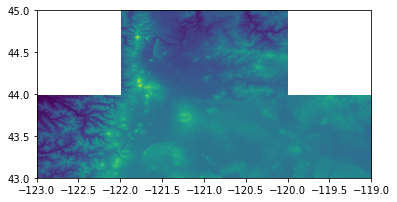

<AxesSubplot:>

In [1338]:
# Open the raster image if you have multiple image combine it using arcGIS raster data set 
eu = rasterio.open("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/bendc.img")
print(eu.crs)
rioplot.show(eu)

In [1339]:
print(strava_proj.crs)

epsg:2839


In [1340]:
# set the co-ordinate system first
stravas = strava_proj.set_crs("EPSG:2839")
stravas ["length"]=stravas["geometry"].length # in m
# Let's take a copy of our layer
strava_slope = stravas.copy()

# Reproject the geometries by replacing the values with projected ones
strava_slope_new = strava_slope.to_crs(epsg=4269)
strava_slope_new.head(10)

ID     OSM_ID OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  CLAZZ  FLAGS  \
0  4362.0  5138004.0     None     None  35250337.0  35257180.0   71.0    6.0   
1  4363.0  5138004.0     None     None  35257180.0  35276746.0   71.0    6.0   
2  4364.0  5138004.0     None     None  35276746.0  35375813.0   71.0    6.0   
3  4365.0  5138004.0     None     None  35375813.0  34931102.0   71.0    6.0   
4  4366.0  5138004.0     None     None  34931102.0  35101264.0   71.0    6.0   
5  4367.0  5138004.0     None     None  35101264.0  35083274.0   71.0    6.0   
6  4449.0  5138054.0     None     None  35083607.0  35039044.0   71.0    6.0   
7  4450.0  5138054.0     None     None  35039044.0  35205097.0   71.0    6.0   
8  4549.0  5138106.0     None     None  34995895.0  35398789.0   71.0    6.0   
9  4550.0  5138106.0     None     None  35398789.0  35276306.0   71.0    6.0   

    SOURCE   TARGET        KM   KMH      COST  REVERSE_CO          X1  \
0   3556.0  12545.0  0.414727  10.0  0.041473    0.041473 -120.960726   
1  12545.0   5188.0  0.368414  10.0  0.036841    0.036841 -120.965538   
2   5188.0  10443.0  0.810493  10.0  0.081049    0.081049 -120.969940   
3  10443.0   9461.0  0.070404  10.0  0.007040    0.007040 -120.979564   
4   9461.0   8575.0  1.319632  10.0  0.131963    0.131963 -120.980319   
5   8575.0   3557.0  0.133472  10.0  0.013347    0.013347 -120.996454   
6   3636.0  10058.0  0.452960  10.0  0.045296    0.045296 -120.938667   
7  10058.0   3637.0  0.892183  10.0  0.089218    0.089218 -120.939301   
8   3708.0   4964.0  0.126850  10.0  0.012685    0.012685 -120.331130   
9   4964.0  16155.0  1.010742  10.0  0.101074    0.101074 -120.329727   

          Y1          X2         Y2  \
0  43.583971 -120.965538  43.582644   
1  43.582644 -120.969940  43.581820   
2  43.581820 -120.979564  43.580309   
3  43.580309 -120.980319  43.580628   
4  43.580628 -120.996454  43.582451   
5  43.582451 -120.997712  43.581787   
6  43.615686 -120.939301  43.611656   
7  43.611656 -120.934374  43.607260   
8  43.611663 -120.329727  43.611292   
9  43.611292 -120.317948  43.608242   

                                            geometry       length  
0  LINESTRING (-120.96071 43.58397, -120.96553 43...   415.635853  
1  LINESTRING (-120.96553 43.58264, -120.96833 43...   369.291120  
2  LINESTRING (-120.96993 43.58181, -120.97345 43...   812.393207  
3  LINESTRING (-120.97955 43.58030, -120.98031 43...    70.526640  
4  LINESTRING (-120.98031 43.58062, -120.98229 43...  1322.971687  
5  LINESTRING (-120.99644 43.58245, -120.99717 43...   133.636768  
6  LINESTRING (-120.93865 43.61568, -120.93860 43...   452.592810  
7  LINESTRING (-120.93929 43.61165, -120.94020 43...   892.977039  
8  LINESTRING (-120.33112 43.61166, -120.33091 43...   127.105498  
9  LINESTRING (-120.32971 43.61129, -120.32902 43...  1012.989166

In [1341]:
# get the slope for each link of the network
strava_slope_new
# First identify the starting and ending node of each link
strava_slope_new['starting point'] = None
strava_slope_new['ending point'] = None

for index, row in strava_slope_new.iterrows():
    coords = [(coords) for coords in list(row['geometry'].coords)]
    first_coord, last_coord = [ coords[i] for i in (0, -1) ]
    strava_slope_new.at[index,'starting point'] = Point(first_coord)
    strava_slope_new.at[index,'ending point'] = Point(last_coord)
    strava_slope_new

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1342]:
strava_slope_new.head(5)

ID     OSM_ID OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  CLAZZ  FLAGS  \
0  4362.0  5138004.0     None     None  35250337.0  35257180.0   71.0    6.0   
1  4363.0  5138004.0     None     None  35257180.0  35276746.0   71.0    6.0   
2  4364.0  5138004.0     None     None  35276746.0  35375813.0   71.0    6.0   
3  4365.0  5138004.0     None     None  35375813.0  34931102.0   71.0    6.0   
4  4366.0  5138004.0     None     None  34931102.0  35101264.0   71.0    6.0   

    SOURCE   TARGET  ...      COST  REVERSE_CO          X1         Y1  \
0   3556.0  12545.0  ...  0.041473    0.041473 -120.960726  43.583971   
1  12545.0   5188.0  ...  0.036841    0.036841 -120.965538  43.582644   
2   5188.0  10443.0  ...  0.081049    0.081049 -120.969940  43.581820   
3  10443.0   9461.0  ...  0.007040    0.007040 -120.979564  43.580309   
4   9461.0   8575.0  ...  0.131963    0.131963 -120.980319  43.580628   

           X2         Y2                                           geometry  \
0 -120.965538  43.582644  LINESTRING (-120.96071 43.58397, -120.96553 43...   
1 -120.969940  43.581820  LINESTRING (-120.96553 43.58264, -120.96833 43...   
2 -120.979564  43.580309  LINESTRING (-120.96993 43.58181, -120.97345 43...   
3 -120.980319  43.580628  LINESTRING (-120.97955 43.58030, -120.98031 43...   
4 -120.996454  43.582451  LINESTRING (-120.98031 43.58062, -120.98229 43...   

        length                                starting point  \
0   415.635853  POINT (-120.9607141702401 43.58396587519159)   
1   369.291120  POINT (-120.9655262020434 43.58263889448855)   
2   812.393207  POINT (-120.9699282287415 43.58181491161304)   
3    70.526640  POINT (-120.9795522853341 43.58030394874932)   
4  1322.971687  POINT (-120.9803072870772 43.58062295096783)   

                                   ending point  
0  POINT (-120.9655262020434 43.58263889448855)  
1  POINT (-120.9699282287415 43.58181491161304)  
2  POINT (-120.9795522853341 43.58030394874932)  
3  POINT (-120.9803072870772 43.58062295096783)  
4  POINT (-120.9964423550985 43.58244600617827)  

[5 rows x 22 columns]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

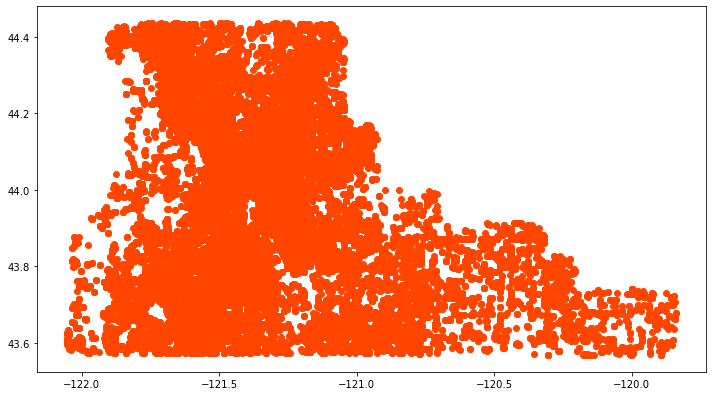

In [1343]:
#show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12,12))
strava_slope_new.boundary.plot(ax=ax, color='orangered')
#show(eu, ax=ax)

In [1344]:
sf1=strava_slope_new.loc[:,["OSM_ID","starting point"]]
sf1.columns=["OSM_ID","geometry"]
sf1['start_lon'] = sf1.geometry.apply(lambda p: p.x)
sf1['start_lat'] = sf1.geometry.apply(lambda p: p.y)
sf2=sf1.loc[:,["OSM_ID","geometry","start_lon","start_lat"]]
sf2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry   start_lon  start_lat
0  5138004.0  POINT (-120.96071 43.58397) -120.960714  43.583966
1  5138004.0  POINT (-120.96553 43.58264) -120.965526  43.582639
2  5138004.0  POINT (-120.96993 43.58181) -120.969928  43.581815
3  5138004.0  POINT (-120.97955 43.58030) -120.979552  43.580304
4  5138004.0  POINT (-120.98031 43.58062) -120.980307  43.580623

In [1345]:
sf2["starting_ele"]= None
#point in test['geometry']:
x = sf2["start_lon"]
y = sf2["start_lat"]
row, col = eu.index(x,y)
sf2["starting_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1346]:
sf2.head(5)

OSM_ID                     geometry   start_lon  start_lat  starting_ele
0  5138004.0  POINT (-120.96071 43.58397) -120.960714  43.583966   1511.569580
1  5138004.0  POINT (-120.96553 43.58264) -120.965526  43.582639   1508.930786
2  5138004.0  POINT (-120.96993 43.58181) -120.969928  43.581815   1499.885254
3  5138004.0  POINT (-120.97955 43.58030) -120.979552  43.580304   1492.722900
4  5138004.0  POINT (-120.98031 43.58062) -120.980307  43.580623   1493.173950

In [1347]:
ef1=strava_slope_new.loc[:,["OSM_ID","ending point"]]
ef1
ef1.columns=["OSM_ID","geometry"]
ef1['end_lon'] = ef1.geometry.apply(lambda p: p.x)
ef1['end_lat'] = ef1.geometry.apply(lambda p: p.y)
ef2=ef1.loc[:,["OSM_ID","geometry","end_lon","end_lat"]]
ef2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID                     geometry     end_lon    end_lat
0  5138004.0  POINT (-120.96553 43.58264) -120.965526  43.582639
1  5138004.0  POINT (-120.96993 43.58181) -120.969928  43.581815
2  5138004.0  POINT (-120.97955 43.58030) -120.979552  43.580304
3  5138004.0  POINT (-120.98031 43.58062) -120.980307  43.580623
4  5138004.0  POINT (-120.99644 43.58245) -120.996442  43.582446

In [1348]:
ef1["ending_ele"]= None
#point in test['geometry']:
x = ef1["end_lon"]
y = ef1["end_lat"]
row, col = eu.index(x,y)
ef1["ending_ele"]=eu.read(1)[row,col]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1349]:
#rioplot.show(n46w123, cmap='hot')
#strava_slope_new.boundary.plot(ax=plt.gca(), color='skyblue')

In [1350]:
ef1.head()

OSM_ID                     geometry     end_lon    end_lat   ending_ele
0  5138004.0  POINT (-120.96553 43.58264) -120.965526  43.582639  1508.930786
1  5138004.0  POINT (-120.96993 43.58181) -120.969928  43.581815  1499.885254
2  5138004.0  POINT (-120.97955 43.58030) -120.979552  43.580304  1492.722900
3  5138004.0  POINT (-120.98031 43.58062) -120.980307  43.580623  1493.173950
4  5138004.0  POINT (-120.99644 43.58245) -120.996442  43.582446  1485.085083

In [1351]:
s=sf2
s=s.drop(["geometry"],axis=1)
s.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID   start_lon  start_lat  starting_ele
0  5138004.0 -120.960714  43.583966   1511.569580
1  5138004.0 -120.965526  43.582639   1508.930786
2  5138004.0 -120.969928  43.581815   1499.885254
3  5138004.0 -120.979552  43.580304   1492.722900
4  5138004.0 -120.980307  43.580623   1493.173950

In [1352]:
e=ef1
e=e.drop(["geometry"],axis=1)
e.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSM_ID     end_lon    end_lat   ending_ele
0  5138004.0 -120.965526  43.582639  1508.930786
1  5138004.0 -120.969928  43.581815  1499.885254
2  5138004.0 -120.979552  43.580304  1492.722900
3  5138004.0 -120.980307  43.580623  1493.173950
4  5138004.0 -120.996442  43.582446  1485.085083

In [1353]:
from functools import reduce
strava_all=[strava_slope_new,s,e]

strava_all1= reduce(lambda  left,right: pd.merge(left,right,on=['OSM_ID'],
                                            how='outer'), strava_all).fillna('0')
strava_all1["slope"]=abs((strava_all1['starting_ele']-strava_all1['ending_ele'])/strava_all1['length'])*100
strava_all1=strava_all1.drop_duplicates(subset=['ID'], keep='first')
strava_all1.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ID     OSM_ID OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  CLAZZ  \
0    4362.0  5138004.0        0        0  35250337.0  35257180.0   71.0   
36   4363.0  5138004.0        0        0  35257180.0  35276746.0   71.0   
72   4364.0  5138004.0        0        0  35276746.0  35375813.0   71.0   
108  4365.0  5138004.0        0        0  35375813.0  34931102.0   71.0   
144  4366.0  5138004.0        0        0  34931102.0  35101264.0   71.0   

     FLAGS   SOURCE   TARGET  ...       length  \
0      6.0   3556.0  12545.0  ...   415.635853   
36     6.0  12545.0   5188.0  ...   369.291120   
72     6.0   5188.0  10443.0  ...   812.393207   
108    6.0  10443.0   9461.0  ...    70.526640   
144    6.0   9461.0   8575.0  ...  1322.971687   

                                   starting point  \
0    POINT (-120.9607141702401 43.58396587519159)   
36   POINT (-120.9655262020434 43.58263889448855)   
72   POINT (-120.9699282287415 43.58181491161304)   
108  POINT (-120.9795522853341 43.58030394874932)   
144  POINT (-120.9803072870772 43.58062295096783)   

                                     ending point   start_lon  start_lat  \
0    POINT (-120.9655262020434 43.58263889448855) -120.960714  43.583966   
36   POINT (-120.9699282287415 43.58181491161304) -120.960714  43.583966   
72   POINT (-120.9795522853341 43.58030394874932) -120.960714  43.583966   
108  POINT (-120.9803072870772 43.58062295096783) -120.960714  43.583966   
144  POINT (-120.9964423550985 43.58244600617827) -120.960714  43.583966   

     starting_ele     end_lon    end_lat   ending_ele     slope  
0      1511.56958 -120.965526  43.582639  1508.930786  0.634881  
36     1511.56958 -120.965526  43.582639  1508.930786  0.714557  
72     1511.56958 -120.965526  43.582639  1508.930786  0.324817  
108    1511.56958 -120.965526  43.582639  1508.930786  3.741556  
144    1511.56958 -120.965526  43.582639  1508.930786  0.199460  

[5 rows x 29 columns]

In [1354]:
print(strava_all1.crs)
strava_all2=strava_all1.copy()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epsg:4269


In [1355]:
# set the co-ordinate system first
strava_all2 = strava_all2.set_crs("EPSG:4269")

# Reproject the geometries by replacing the values with projected ones
strava_all2_slope = strava_all2.to_crs(epsg=2839)
strava_all2_slope.head(10)

ID     OSM_ID OSM_NAME OSM_META  OSM_SOURCE  OSM_TARGET  CLAZZ  \
0    4362.0  5138004.0        0        0  35250337.0  35257180.0   71.0   
36   4363.0  5138004.0        0        0  35257180.0  35276746.0   71.0   
72   4364.0  5138004.0        0        0  35276746.0  35375813.0   71.0   
108  4365.0  5138004.0        0        0  35375813.0  34931102.0   71.0   
144  4366.0  5138004.0        0        0  34931102.0  35101264.0   71.0   
180  4367.0  5138004.0        0        0  35101264.0  35083274.0   71.0   
216  4449.0  5138054.0        0        0  35083607.0  35039044.0   71.0   
220  4450.0  5138054.0        0        0  35039044.0  35205097.0   71.0   
224  4549.0  5138106.0        0        0  34995895.0  35398789.0   71.0   
233  4550.0  5138106.0        0        0  35398789.0  35276306.0   71.0   

     FLAGS   SOURCE   TARGET  ...       length  \
0      6.0   3556.0  12545.0  ...   415.635853   
36     6.0  12545.0   5188.0  ...   369.291120   
72     6.0   5188.0  10443.0  ...   812.393207   
108    6.0  10443.0   9461.0  ...    70.526640   
144    6.0   9461.0   8575.0  ...  1322.971687   
180    6.0   8575.0   3557.0  ...   133.636768   
216    6.0   3636.0  10058.0  ...   452.592810   
220    6.0  10058.0   3637.0  ...   892.977039   
224    6.0   3708.0   4964.0  ...   127.105498   
233    6.0   4964.0  16155.0  ...  1012.989166   

                                   starting point  \
0    POINT (-120.9607141702401 43.58396587519159)   
36   POINT (-120.9655262020434 43.58263889448855)   
72   POINT (-120.9699282287415 43.58181491161304)   
108  POINT (-120.9795522853341 43.58030394874932)   
144  POINT (-120.9803072870772 43.58062295096783)   
180  POINT (-120.9964423550985 43.58244600617827)   
216  POINT (-120.9386548670925 43.61568075348223)   
220  POINT (-120.9392888949518 43.61165076104039)   
224  POINT (-120.3311166521236 43.61165766211329)   
233  POINT (-120.3297137531052 43.61128656345593)   

                                     ending point   start_lon  start_lat  \
0    POINT (-120.9655262020434 43.58263889448855) -120.960714  43.583966   
36   POINT (-120.9699282287415 43.58181491161304) -120.960714  43.583966   
72   POINT (-120.9795522853341 43.58030394874932) -120.960714  43.583966   
108  POINT (-120.9803072870772 43.58062295096783) -120.960714  43.583966   
144  POINT (-120.9964423550985 43.58244600617827) -120.960714  43.583966   
180  POINT (-120.9977003653778 43.58178201185196) -120.960714  43.583966   
216  POINT (-120.9392888949518 43.61165076104039) -120.938655  43.615681   
220   POINT (-120.9343618978208 43.6072547499741) -120.938655  43.615681   
224  POINT (-120.3297137531052 43.61128656345593) -120.331117  43.611658   
233  POINT (-120.3179348609073 43.60823617459015) -120.331117  43.611658   

     starting_ele     end_lon    end_lat   ending_ele     slope  
0     1511.569580 -120.965526  43.582639  1508.930786  0.634881  
36    1511.569580 -120.965526  43.582639  1508.930786  0.714557  
72    1511.569580 -120.965526  43.582639  1508.930786  0.324817  
108   1511.569580 -120.965526  43.582639  1508.930786  3.741556  
144   1511.569580 -120.965526  43.582639  1508.930786  0.199460  
180   1511.569580 -120.965526  43.582639  1508.930786  1.974602  
216   1591.768188 -120.939289  43.611651  1579.356934  2.742256  
220   1591.768188 -120.939289  43.611651  1579.356934  1.389874  
224   1442.211426 -120.329714  43.611287  1437.313477  3.853452  
233   1442.211426 -120.329714  43.611287  1437.313477  0.483514  

[10 rows x 29 columns]

In [1356]:
inter_road.columns

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['site_id', 'site_name', 'sensor_type', 'year', 'region',
       'travel_pattern', 'AADBT', 'stv_adb', 'stv_c_adb', 'stl_raw',
       'latitude', 'longitude', 'comment', 'osm_id_sensor', 'osm_id', 'name',
       'ref', 'type', 'oneway', 'bridge', 'maxspeed', 'geometry', 'Length'],
      dtype='object')

In [1357]:
#Identify the OSM ID link that have bridge

inter_road_bridge=pd.merge (left=ecoshort, right=bridge_only, left_on='osm_id_sensor', right_on='osm_id',how='inner')
inter_road_bridge=inter_road_bridge.loc[:,["osm_id_sensor", "bridge"]]
#inter_road_bridge=inter_road_bridge.drop_duplicates(subset='osm_id_1')
#inter_road_bridge = inter_road_bridge[inter_road_bridge['bridge'] > 0]
inter_road_bridge.head()

osm_id_sensor  bridge
0     48381206.0       0
1      5369877.0       0
2     49105950.0       0
3     46094523.0       0
4     46094520.0       1

In [1358]:
strava_all2_slope=strava_all2_slope.loc[:,['geometry','slope']]
gdf1=gdf1.loc[:,['osm_id_sensor','geometry']]

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1359]:
# Now clip with buffer for each location
#buffer_clip_slope = gpd.clip(strava_all2_slope, gdf1)
#buffer_clip_slope=buffer_clip_slope.drop(["osm_id"],axis=1)
buffer_clip_slope1=gpd.sjoin(strava_all2_slope,gdf1,op='intersects') 
buffer_clip_slope1.head(5)


geometry      slope  \
24949  LINESTRING (1437241.859 266725.518, 1437242.63...   6.550547   
24998  LINESTRING (1437242.639 266747.280, 1437244.01...   5.707040   
25047  LINESTRING (1437244.010 266772.235, 1437245.64...   4.817279   
25096  LINESTRING (1437138.597 266794.902, 1437148.32...   1.572248   
25145  LINESTRING (1437183.186 266729.168, 1437194.31...  12.079582   

       index_right  osm_id_sensor  
24949            9      5376261.0  
24998            9      5376261.0  
25047            9      5376261.0  
25096            9      5376261.0  
25145            9      5376261.0

In [1360]:
#Make all link having bridge  slope is zero
buffer_clip_slope2=pd.merge(inter_road_bridge,buffer_clip_slope1, right_on='osm_id_sensor', left_on='osm_id_sensor',how='inner')
buffer_clip_slope2.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     48381206.0       0  LINESTRING (1434107.056 263949.456, 1434108.85...   
1     48381206.0       0  LINESTRING (1433919.258 263927.733, 1433938.34...   
2     48381206.0       0  LINESTRING (1433151.940 264964.924, 1433114.96...   
3     48381206.0       0  LINESTRING (1433114.966 264966.292, 1433038.01...   
4     48381206.0       0  LINESTRING (1433153.493 265050.826, 1433194.34...   

      slope  index_right  
0  3.479627            0  
1  0.135774            0  
2  1.205897            0  
3  0.160838            0  
4  1.090000            0

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

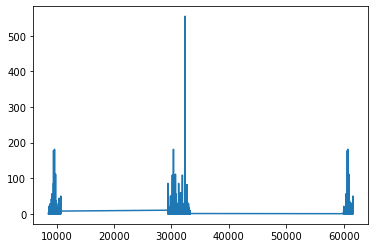

In [1361]:
# Separate bridge and non bridge data
bridge_presence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge ==1] 
bridge_presence.slope.plot()


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

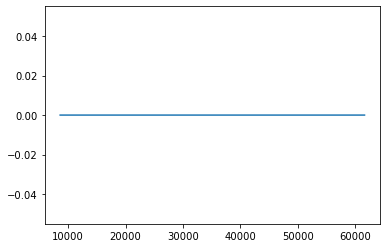

In [1362]:
bridge_presence['slope']=0
bridge_presence.slope.plot()

In [1363]:
bridge_absence=buffer_clip_slope2.loc[buffer_clip_slope2.bridge==0] 
bridge_absence.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge                                           geometry  \
0     48381206.0       0  LINESTRING (1434107.056 263949.456, 1434108.85...   
1     48381206.0       0  LINESTRING (1433919.258 263927.733, 1433938.34...   
2     48381206.0       0  LINESTRING (1433151.940 264964.924, 1433114.96...   
3     48381206.0       0  LINESTRING (1433114.966 264966.292, 1433038.01...   
4     48381206.0       0  LINESTRING (1433153.493 265050.826, 1433194.34...   

      slope  index_right  
0  3.479627            0  
1  0.135774            0  
2  1.205897            0  
3  0.160838            0  
4  1.090000            0

In [1364]:
# now join again
buffer_clip_slope3=pd.concat([bridge_presence,bridge_absence])
# put the cap for the slope as maximum 25%
buffer_clip_slope3=buffer_clip_slope3[buffer_clip_slope3['slope']<25]
buffer_clip_slope3.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor  bridge  \
8601     46094520.0       1   
8602     46094520.0       1   
8603     46094520.0       1   
8604     46094520.0       1   
8605     46094520.0       1   

                                               geometry  slope  index_right  
8601  LINESTRING (1434682.950 265974.109, 1434640.81...    0.0            4  
8602  LINESTRING (1434640.818 266009.656, 1434626.94...    0.0            4  
8603  LINESTRING (1434626.945 266020.936, 1434609.58...    0.0            4  
8604  LINESTRING (1434609.589 266035.040, 1434598.10...    0.0            4  
8605  LINESTRING (1435396.689 267291.779, 1435373.15...    0.0            4

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

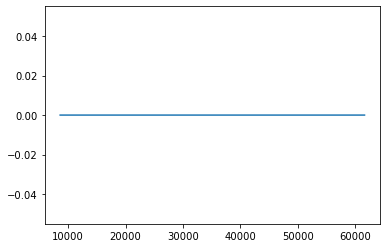

In [1365]:
check=buffer_clip_slope3[buffer_clip_slope3['bridge']== 1]
check.slope.plot()

In [1366]:
# Now calculate the mean slope for each count location
output_slope=buffer_clip_slope3.groupby(by=['osm_id_sensor'])['slope'].mean().reset_index()
output_slope.columns=['osm_id','slope']
output_slope.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id     slope
0  5369529.0  3.691927
1  5369733.0  2.149702
2  5369877.0  2.210142
3  5371320.0  1.834640
4  5372140.0  2.604158

# Import Weather Daily level data from weather underground website Using python coding

1. https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
2. https://bojanstavrikj.github.io/content/page1/wunderground_scraper

In [1367]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!pip install webdriver-manager
#!pip install chromedriver 
#!pip3 install webdrivermanager


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1368]:
from bs4 import BeautifulSoup as BS #conda install -c anaconda beautifulsoup4 
from selenium import webdriver
from functools import reduce
import pandas as pd
import time

In [1369]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from os import system as System
from webdriver_manager.utils import ChromeType
#from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [1370]:
    def render_page(url):
        options = Options()
        options.add_argument("user-data-dir=C:\\Users\\mxm5116\\Desktop\\Profile 1")
        driver = webdriver.Chrome(executable_path=r'C:/Program Files/Google/Chrome/Application/chromedriver_win32/chromedriver.exe', chrome_options=options)
        driver.get(url)
        time.sleep(3)
        r = driver.page_source
        driver.quit()
        return r  

In [1371]:
# driver =webdriver.Chrome(r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')
# driver = webdriver.Firefox(executable_path=r'C:\Users\mxm5116\Downloads\geckodriver-v0.29.0-win64\geckodriver.exe')
#chrome_options = Options()
# chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(chrome_options=chrome_options, executable_path=r'C:\Users\mxm5116\Downloads\chromedriver_win32\chromedriver.exe')

#driver.get(r'https://www.google.com')
#time.sleep(5)
#r = driver.page_source
#print(r)

In [1372]:
#def render_page(url):
#        chrome_options = Options()
#        chrome_options.add_argument('--headless')
#        chrome_options.add_argument('--no-sandbox')
#        chrome_options.add_argument('--disable-dev-shm-usage')
#        driver = webdriver.Chrome("executable_path=r"C:/Users/mxm5116/Downloads/chromedriver_win32/chromedriver.exe")
#        driver.get(url)
#        time.sleep(3)
#        r = driver.page_source
#        driver.quit()
#       return r

In [1373]:
  def scraper(page, dates):
        output = pd.DataFrame()

        for d in dates:

            url = str(str(page) + str(d))
            print(url)

            r = render_page(url)
            print(r)
            soup = BS(r, "html.parser")
            container = soup.find('lib-city-history-observation')
            check = container.find('tbody')

            data = []

            for c in check.find_all('tr', class_='ng-star-inserted'):
                for i in c.find_all('td', class_='ng-star-inserted'):
                    trial = i.text
                    trial = trial.strip('  ')
                    data.append(trial)

            if round(len(data) / 17 - 1) == 31:
                Temperature = pd.DataFrame([data[32:128][x:x + 3] for x in range(0, len(data[32:128]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[128:224][x:x + 3] for x in range(0, len(data[128:224]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[224:320][x:x + 3] for x in range(0, len(data[224:320]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[320:416][x:x + 3] for x in range(0, len(data[320:416]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[416:512][x:x + 3] for x in range(0, len(data[416:512]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:32][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[512:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 28:
                Temperature = pd.DataFrame([data[29:116][x:x + 3] for x in range(0, len(data[29:116]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[116:203][x:x + 3] for x in range(0, len(data[116:203]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[203:290][x:x + 3] for x in range(0, len(data[203:290]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[290:377][x:x + 3] for x in range(0, len(data[290:377]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[377:464][x:x + 3] for x in range(0, len(data[377:463]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:29][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[464:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 29:
                Temperature = pd.DataFrame([data[30:120][x:x + 3] for x in range(0, len(data[30:120]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[120:210][x:x + 3] for x in range(0, len(data[120:210]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[210:300][x:x + 3] for x in range(0, len(data[210:300]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[300:390][x:x + 3] for x in range(0, len(data[300:390]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[390:480][x:x + 3] for x in range(0, len(data[390:480]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:30][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[480:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            elif round(len(data) / 17 - 1) == 30:
                Temperature = pd.DataFrame([data[31:124][x:x + 3] for x in range(0, len(data[31:124]), 3)][1:],
                                           columns=['Temp_max', 'Temp_avg', 'Temp_min'])
                Dew_Point = pd.DataFrame([data[124:217][x:x + 3] for x in range(0, len(data[124:217]), 3)][1:],
                                         columns=['Dew_max', 'Dew_avg', 'Dew_min'])
                Humidity = pd.DataFrame([data[217:310][x:x + 3] for x in range(0, len(data[217:310]), 3)][1:],
                                        columns=['Hum_max', 'Hum_avg', 'Hum_min'])
                Wind = pd.DataFrame([data[310:403][x:x + 3] for x in range(0, len(data[310:403]), 3)][1:],
                                    columns=['Wind_max', 'Wind_avg', 'Wind_min'])
                Pressure = pd.DataFrame([data[403:496][x:x + 3] for x in range(0, len(data[403:496]), 3)][1:],
                                        columns=['Pres_max', 'Pres_avg', 'Pres_min'])
                Date = pd.DataFrame(data[:31][1:], columns=data[:1])
                Precipitation = pd.DataFrame(data[496:][1:], columns=['Precipitation'])
                print(str(str(d) + ' finished!'))
            else:
                print('Data not in normal length')

            dfs = [Date, Temperature, Dew_Point, Humidity, Wind, Pressure, Precipitation]

            df_final = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

            df_final['Date'] = str(d) + "-" + df_final.iloc[:, :1].astype(str)

            output = output.append(df_final)

        print('Scraper done!')

        output = output[['Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max',
                         'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Pres_max',
                         'Pres_avg', 'Pres_min', 'Precipitation', 'Date']]

        return output


# Please input the date and page link to extract the data for your study area here

In [1374]:
dates = ['2019-1','2019-2','2019-3','2019-4','2019-5','2019-6','2019-7','2019-8','2019-9','2019-10','2019-11','2019-12']
# insert the date you want to extract the data
page = 'https://www.wunderground.com/history/monthly/us/or/eugene/KEUG/date/'
# insert your study location link here
#df_output = scraper(page,dates)

In [1375]:
w19=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/bend_weather.csv")
w19

Temp_avg  Temp_min  Dew_max  Dew_avg  Dew_min  Hum_max  Hum_avg  Hum_min  \
0        25.9        13       20     15.8       10       92     69.4       31   
1        32.0        18       25     20.1       13       85     64.7       35   
2        42.3        36       26     25.0       24       67     51.2       39   
3        42.5        32       26     22.6       19       73     46.9       34   
4        40.3        29       33     25.4       23       78     57.3       39   
..        ...       ...      ...      ...      ...      ...      ...      ...   
360      30.8        19       26     23.3       16       88     74.9       53   
361      34.2        25       29     25.4       21       85     71.9       44   
362      29.6        26       29     27.0       23       93     89.9       82   
363      29.7        28       30     27.2       25       96     90.4       85   
364      40.8        31       41     31.4       27       92     71.9       39   

     Wind_max  Wind_avg  Wind_min  Pres_max  Pres_avg  Pres_min  \
0           8       4.0         0      27.1      27.1      27.0   
1          10       3.7         0      27.0      27.0      26.9   
2          13       6.2         0      26.9      26.8      26.7   
3          14       4.8         0      26.7      26.7      26.6   
4          22       8.8         0      26.6      26.4      26.2   
..        ...       ...       ...       ...       ...       ...   
360         5       1.2         0      27.0      26.9      26.8   
361         7       3.1         0      27.0      26.9      26.9   
362        14       6.2         0      27.0      26.9      26.8   
363         8       2.4         0      27.1      27.1      27.0   
364        15       4.4         0      27.1      26.9      26.7   

     Precipitation        Date  
0              0.0    2019-1-1  
1              0.0    2019-1-2  
2              0.0    2019-1-3  
3              0.0    2019-1-4  
4              0.0    2019-1-5  
..             ...         ...  
360            0.0  2019-12-27  
361            0.0  2019-12-28  
362            0.0  2019-12-29  
363            0.0  2019-12-30  
364            0.0  2019-12-31  

[365 rows x 16 columns]

In [1376]:
output_weather=w19.loc[:, ['Temp_avg', 'Hum_avg','Precipitation']]
output_weather

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg  Hum_avg  Precipitation
0        25.9     69.4            0.0
1        32.0     64.7            0.0
2        42.3     51.2            0.0
3        42.5     46.9            0.0
4        40.3     57.3            0.0
..        ...      ...            ...
360      30.8     74.9            0.0
361      34.2     71.9            0.0
362      29.6     89.9            0.0
363      29.7     90.4            0.0
364      40.8     71.9            0.0

[365 rows x 3 columns]

In [1377]:
output_weather.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Temp_avg         float64
Hum_avg          float64
Precipitation    float64
dtype: object

In [1378]:
# Convert object to float
output_weather2=output_weather.astype(str).astype(float)

In [1379]:
output_weather2.isnull().values.any()

False

In [1380]:
# Take the average for annual
output_weather3=output_weather2.mean()
output_weather3

Temp_avg         48.478082
Hum_avg          61.352877
Precipitation     0.028959
dtype: float64

# Aggregate all output together in a dataframe

In [1381]:
from functools import reduce
import pandas as pd
# compile the list of dataframes you want to merge
df_all = [emerging_data,output_origin,output_destination,output_odl,output_bikecom,output_lane,output_intersection_densitya,output_commercial,commercial_distance1,commercialcc_distance1,output_industrial,industrial_distance1,industrialcc_distance1, output_residential,residential_distance1,residentialcc_distance1, output_retail,retail_distance1,retailcc_distance1,output_grass,grass_distance1,grasscc_distance1,output_park,Park_distance1,parkcc_distance1,output_water,water_distance1,watercc_distance1,output_forest,forest_distance1,forestcc_distance1,CBD_distance1,output_bparking,output_bstop,output_school,output_school_distance,output_college,output_college_distance,output_university,output_university_distance,output_intersection_density1,output_primary,output_secondary,output_tertiary,output_residential,output_path,output_cycleway,output_footway,output_bikeway_all_lane,output_bikeway_all_track, pt_road_type2,output_bikeway_all_lane_binary,output_bikeway_all_track_binary,output_meanspeed,output_pointspeed,output_bridge,output_point_bridge,output_pct_race1,output_pct_gender1,output_student,output_pct_edu1,output_median_age,output_income,output_hhdensity1,output_pdensity1,output_edensity1,output_job1,output_slope,output_odl_gps]

In [1382]:
#Merge by ID
df_merged_eco_short = reduce(lambda  left,right: pd.merge(left,right,on=['osm_id'],
                                            how='left'), df_all)
df_merged_eco_short=df_merged_eco_short.drop_duplicates(subset=['site_id'],keep='first')
df_merged_eco_short.head()

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0   
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0   
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0   
3  46094523.0  P004BEN   permanent  109.378321   7.027397   2.178082   1998.0   
4  46094520.0  P005BEN   permanent   61.295238   5.260274   1.698630   1387.0   

   Bike Share Origin  Bike Share Destination  Bike Share Crossing  ...  \
0             2572.0                  2556.0               2668.0  ...   
1             1367.0                  1368.0               1606.0  ...   
2             1841.0                  1854.0               1921.0  ...   
3             1775.0                  1775.0               1872.0  ...   
4             1319.0                  1310.0               1557.0  ...   

   Student Access  pct_at_least_college_education  Median Age  \
0      128.774489                       86.184799   39.140869   
1      200.799784                       77.369515   37.130226   
2      122.810449                       88.370457   38.020445   
3      180.954033                       84.117118   36.786818   
4      203.080644                       78.473794   35.941475   

   Median_HH_income   HH_density  population_density  employment_density  \
0      51230.208756   972.425363         1988.163016         1748.132169   
1      50325.714890  1148.650699         2384.459308         2014.558914   
2      49260.392787  1149.684262         2590.352004         2124.326291   
3      55652.942268  1176.334917         2626.802727         2150.278100   
4      55781.384194  1095.897388         2516.215891         2047.677893   

   Number of jobs     slope  Bike Share route  
0    12050.083273  2.056560            2840.0  
1    13090.511757  2.210142            1891.0  
2     9020.505971  2.538262            2209.0  
3     9982.982050  2.598307            1977.0  
4    10554.108302  0.000000            1649.0  

[5 rows x 86 columns]

In [1383]:
#dfs = [df1, df2, df3, df4, df5] 
#from functools import partial 
#outer_merge = partial(pd.merge, how='left') 
#reduce(outer_merge, df_all )

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1384]:
# Add weather data in this new data frame
df_merged_eco_short['Temp_avg'] = pd.Series(output_weather3.Temp_avg, index=df_merged_eco_short.index)
df_merged_eco_short['Hum_avg '] = pd.Series(output_weather3.Hum_avg , index=df_merged_eco_short.index)
df_merged_eco_short['Precipitation'] = pd.Series(output_weather3.Precipitation, index=df_merged_eco_short.index)
df_merged_eco_short.head(5)

osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0   
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0   
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0   
3  46094523.0  P004BEN   permanent  109.378321   7.027397   2.178082   1998.0   
4  46094520.0  P005BEN   permanent   61.295238   5.260274   1.698630   1387.0   

   Bike Share Origin  Bike Share Destination  Bike Share Crossing  ...  \
0             2572.0                  2556.0               2668.0  ...   
1             1367.0                  1368.0               1606.0  ...   
2             1841.0                  1854.0               1921.0  ...   
3             1775.0                  1775.0               1872.0  ...   
4             1319.0                  1310.0               1557.0  ...   

   Median_HH_income   HH_density  population_density  employment_density  \
0      51230.208756   972.425363         1988.163016         1748.132169   
1      50325.714890  1148.650699         2384.459308         2014.558914   
2      49260.392787  1149.684262         2590.352004         2124.326291   
3      55652.942268  1176.334917         2626.802727         2150.278100   
4      55781.384194  1095.897388         2516.215891         2047.677893   

  Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0   12050.083273  2.056560            2840.0  48.478082  61.352877   
1   13090.511757  2.210142            1891.0  48.478082  61.352877   
2    9020.505971  2.538262            2209.0  48.478082  61.352877   
3    9982.982050  2.598307            1977.0  48.478082  61.352877   
4   10554.108302  0.000000            1649.0  48.478082  61.352877   

   Precipitation  
0       0.028959  
1       0.028959  
2       0.028959  
3       0.028959  
4       0.028959  

[5 rows x 89 columns]

In [1385]:
# If you want to export the excel
pd.DataFrame.to_csv(df_merged_eco_short, 'Eco_short_Bend_data_circular_0.75_mile_buffer_2019.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Use Keplergl to produce dynamic Map for all variables

In [1386]:
# Make dynamic visualization
#!pip install keplergl

In [1387]:
ecoshort.head()

site_id                  site_name sensor_type  year region  \
0  P001BEN              Colorado Ave.   permanent  2019   Bend   
1  P002BEN   Franklin Ave. Both Sides   permanent  2019   Bend   
2  P003BEN  Galveston Ave. Both Sides   permanent  2019   Bend   
3  P004BEN    Newport Ave. Both Sides   permanent  2019   Bend   
4  P005BEN   Portland Ave. Both Sides   permanent  2019   Bend   

   travel_pattern       AADBT    stv_adb  stv_c_adb  stl_raw  ...  comment  \
0             2.0   46.209524   6.561644   2.616438   3189.0  ...      NaN   
1             2.0  220.426625   6.958904   3.068493   2617.0  ...      NaN   
2             3.0  127.953968  13.726027   4.369863   3128.0  ...      NaN   
3             1.0  109.378321   7.027397   2.178082   1998.0  ...      NaN   
4             2.0   61.295238   5.260274   1.698630   1387.0  ...      NaN   

   osm_id_sensor                        geometry  min_dist_to_school  \
0     48381206.0  POINT (1434297.657 265113.372)         1836.231483   
1      5369877.0  POINT (1435206.451 265737.006)         1839.981365   
2     49105950.0  POINT (1433951.414 265816.071)         1671.767045   
3     46094523.0  POINT (1434705.630 266350.843)         2062.855533   
4     46094520.0  POINT (1435063.168 266646.066)         2917.732762   

  min_dist_to_college  min_dist_to_university  lanes  maxspeed  \
0        10520.590150             2387.326197      2      35.0   
1        11794.261428             5773.809117      2      25.0   
2         8150.297244             4506.877508      1      25.0   
3         9487.250630             6656.861545      2      25.0   
4        10342.951024             8005.030293      2      25.0   

  min_dist_to_polygon  min_dist_to_CBD  
0         5852.063372      2706.272531  
1         5422.732422      1492.814353  
2         7531.224178      2639.417043  
3         6629.718814      1816.778856  
4         5131.784928      2955.355588  

[5 rows x 22 columns]

In [1388]:
ecoshort_selected=ecoshort.loc[:,["osm_id_sensor","geometry"]]
ecoshort_selected
print(ecoshort_selected.crs)

epsg:2839


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1389]:
# set the co-ordinate system first
ecoshort_selected1 = ecoshort_selected.set_crs("EPSG:2839")
# Let's take a copy of our layer
ecoshort_selected_3D = ecoshort_selected1.copy()

# Reproject the geometries by replacing the values with projected ones
ecoshort_selected_3D  = ecoshort_selected_3D .to_crs(epsg=4211) # Initially given
ecoshort_selected_3D.head()

osm_id_sensor                     geometry
0     48381206.0  POINT (-121.31986 44.05029)
1      5369877.0  POINT (-121.30860 44.05598)
2     49105950.0  POINT (-121.32427 44.05658)
3     46094523.0  POINT (-121.31492 44.06146)
4     46094520.0  POINT (-121.31050 44.06415)

In [1390]:
ecoshort_selected_3D['Lon'] = ecoshort_selected_3D.geometry.x
ecoshort_selected_3D['Lat'] = ecoshort_selected_3D.geometry.y
ecoshort_selected_3D=ecoshort_selected_3D.drop(['geometry'],axis=1)
ecoshort_selected_3D.head()

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor         Lon        Lat
0     48381206.0 -121.319863  44.050292
1      5369877.0 -121.308599  44.055983
2     49105950.0 -121.324270  44.056585
3     46094523.0 -121.314923  44.061464
4     46094520.0 -121.310496  44.064152

In [1391]:
ecoshort_selected_3D.dtypes

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id_sensor    float64
Lon              float64
Lat              float64
dtype: object

In [1392]:
print(gdf1.crs)
# set the co-ordinate system first
gdf_selected1 = gdf1.set_crs("EPSG:2839")

# Reproject the geometries by replacing the values with projected ones
gdf_selected_3D  = gdf_selected1.to_crs(epsg=4211) # Initially given
gdf_selected_3D=gdf_selected_3D.loc[:,["osm_id_sensor","geometry"]]
gdf_selected_3D['geometry'] = gdf_selected_3D['geometry'].apply(shapely.geometry.shape)
gdf_selected_3D
newdf=(pd.merge(ecoshort_selected_3D, gdf_selected_3D, left_on='osm_id_sensor', right_on='osm_id_sensor', how='inner'))
buffer_vis=newdf
buffer_vis.columns=['osm_id_sensor','Lon','Lat','geometry']
buffer_vis.head()

epsg:2839


osm_id_sensor         Lon        Lat  \
0     48381206.0 -121.319863  44.050292   
1      5369877.0 -121.308599  44.055983   
2     49105950.0 -121.324270  44.056585   
3     46094523.0 -121.314923  44.061464   
4     46094520.0 -121.310496  44.064152   

                                            geometry  
0  POLYGON ((-121.30480 44.05040, -121.30486 44.0...  
1  POLYGON ((-121.29354 44.05609, -121.29360 44.0...  
2  POLYGON ((-121.30921 44.05669, -121.30927 44.0...  
3  POLYGON ((-121.29986 44.06157, -121.29992 44.0...  
4  POLYGON ((-121.29543 44.06426, -121.29549 44.0...

In [1393]:
# Make a copy of our data frame to visualize it
df_dynamic=df_merged_eco_short.copy()
#cols = df_dynamic.columns
#df_dynamic[cols[1:]] = df_dynamic[cols[1:]].astype(str).astype(float)
#df_dynamic
# Bring the buffer geometry
df_dynamic1=(pd.merge(df_dynamic, buffer_vis, left_on='osm_id', right_on='osm_id_sensor', how='inner'))
df_dynamic1
pd.DataFrame.to_csv(df_dynamic1, 'keplergl_eco_short_2019_Bend_circular_0.75_mile_buffer.csv', sep=',', na_rep='0', index=False)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

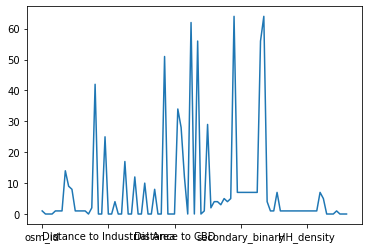

In [1394]:
df_dynamic1.isnull().sum().plot()


In [1395]:
# We do not have any null point. lets plot the map
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeplerGl()

In [1396]:
#cols = df_dynamic1.columns
#df_dynamic1[cols[1:]] = df_dynamic1[cols[1:]].astype(str).astype(float)
#df_dynamic1

In [1397]:
#from shapely import wkt
#df_dynamic1['str_geom'] = df_dynamic1.geometry.apply(lambda x: wkt.dumps(x))
#df_dynamic1=df_dynamic1.drop(['geometry'],axis=1)
#df_dynamic1
#df_dynamic1.rename(columns={'str_geom':'geometry'}, inplace=True)
#df_dynamic1

In [1398]:
#df_dynamic1.dtypes

In [1399]:
#df_dynamic2=df_dynamic1.drop(["geometry"],axis=1)
#df_dynamic3=df_dynamic1.copy()
#df_dynamic3['geometry'] = df_dynamic3['geometry'].apply(shapely.geometry.shape)
#df_dynamic3

In [1400]:
# Load a map with data and config and height
from keplergl import KeplerGl
data=pd.read_csv("F:/Bike Fusion/New Plan/Circular Automatic Collected data for modeling/Bend/Bend_portland/keplergl_eco_short_2019_Bend_circular_0.75_mile_buffer.csv")
data=data.fillna('0')
map_2 = KeplerGl(height=500, data={"data_1":data})
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':          osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  \
0    483812…

In [1401]:
data.head(5)

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osm_id  site_id sensor_type       AADBT    stv_adb  stv_c_adb  stl_raw  \
0  48381206.0  P001BEN   permanent   46.209524   6.561644   2.616438   3189.0   
1   5369877.0  P002BEN   permanent  220.426625   6.958904   3.068493   2617.0   
2  49105950.0  P003BEN   permanent  127.953968  13.726027   4.369863   3128.0   
3  46094523.0  P004BEN   permanent  109.378321   7.027397   2.178082   1998.0   
4  46094520.0  P005BEN   permanent   61.295238   5.260274   1.698630   1387.0   

   Bike Share Origin  Bike Share Destination  Bike Share Crossing  ...  \
0             2572.0                  2556.0               2668.0  ...   
1             1367.0                  1368.0               1606.0  ...   
2             1841.0                  1854.0               1921.0  ...   
3             1775.0                  1775.0               1872.0  ...   
4             1319.0                  1310.0               1557.0  ...   

   Number of jobs     slope  Bike Share route   Temp_avg   Hum_avg   \
0    12050.083273  2.056560            2840.0  48.478082  61.352877   
1    13090.511757  2.210142            1891.0  48.478082  61.352877   
2     9020.505971  2.538262            2209.0  48.478082  61.352877   
3     9982.982050  2.598307            1977.0  48.478082  61.352877   
4    10554.108302  0.000000            1649.0  48.478082  61.352877   

   Precipitation  osm_id_sensor         Lon        Lat  \
0       0.028959     48381206.0 -121.319863  44.050292   
1       0.028959      5369877.0 -121.308599  44.055983   
2       0.028959     49105950.0 -121.324270  44.056585   
3       0.028959     46094523.0 -121.314923  44.061464   
4       0.028959     46094520.0 -121.310496  44.064152   

                                            geometry  
0  POLYGON ((-121.3048024525371 44.0503970541484,...  
1  POLYGON ((-121.2935365138678 44.05608736276683...  
2  POLYGON ((-121.309207490851 44.05669080529237,...  
3  POLYGON ((-121.2998593578089 44.06156856267918...  
4  POLYGON ((-121.295432279708 44.06425599840077,...  

[5 rows x 93 columns]

In [1402]:
# save as htm file
map_2.save_to_html(file_name="Bend_Eco_short_2019_keplergl_circular_0.75_mile_buffer.html")

C:\Users\mxm5116\.conda\envs\geo_env\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Map saved to Bend_Eco_short_2019_keplergl_circular_0.75_mile_buffer.html!


In [1403]:
#conda list ipython

In [1404]:
end = time.time()
print("Total Run Time:", end - start)

Total Run Time: 1120.7009570598602


# Keplergl Dynamic map is done----END

# Run Random Forest to filter the variables

# Run Negative Binomial Model to predict the AADBT